# Kepler Framework Examples

In [1]:
from kepler.pandas.menu       import ElectronSequence as Chain
from kepler.pandas.readers    import load, load_in_loop
from kepler.pandas.decorators import create_ringer_v8_decorators, create_ringer_v9_decorators, RingerDecorator
from kepler.pandas.decorators import create_ringer_v8_new_decorators, create_ringer_v8_half_fast_decorators, create_ringer_v8_34_decorators, create_ringer_v8_half_decorators

import kepler
import tqdm
import rootplotlib as rpl
import mplhep as hep
import root_numpy
import ROOT
ROOT.gStyle.SetOptStat(0);
import array

import numpy as np
import pandas as pd
import collections
import os
from pprint import pprint
from copy import deepcopy
import gc


import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

import mplhep as hep

import warnings
warnings.filterwarnings('ignore')
plt.style.use(hep.style.ROOT)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.16/00
Using all sub packages with ROOT dependence


# Running for Zee samples

In [2]:
## codigo original
# dpath = '/home/jodafons/public/cern_data/new_files/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins'
# dpath+= '/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins_et{ET}_eta{ETA}.npz'
# paths = []
# for et in range(5):
#     for eta in range(5):
#         paths.append( dpath.format(ET=et,ETA=eta) )

real_run = False

## Load Data

Esses eventos foram utilizados para o desenvolvimento

`dpath = '/home/natmourajr/Workspace/CERN/Qualify/data/Zee/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins'`\
`dpath+= '/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins_et{ET}_eta{ETA}.npz' `
    
Usar os eventos de data18 (eventos de colisão) como teste e avaliação de resultados

`dpath = '/home/jodafons/public/cern_data/new_files/data18_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins'`\
`dpath+= '/data18_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins_et{ET}_eta{ETA}.npz'`
 

In [3]:
# codigo modificado
dpath = '/home/pedro.lima/data/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins'
dpath+= '/data17_13TeV.AllPeriods.sgn.probes_lhvloose_EGAM1.bkg.vprobes_vlhvloose_EGAM7.GRL_v97.25bins_et{ET}_eta{ETA}.npz'
#                                               \
#                                           very loose
paths = []

dev = False
#    False carrega todas as regioes

if dev:
    range_et = [4]   #leblon = 4
    range_eta = [0]  #leblon = 0
else:
    range_et = range(5)
    range_eta = range(5)

for et in range_et:
    for eta in range_eta:
        paths.append( dpath.format(ET=et,ETA=eta) )
# look here: https://github.com/ringer-softwares/kolmov/blob/master/kolmov/utils/constants.py

In [4]:
drop_columns = [
                    'RunNumber', 
                    #'avgmu',
                    #'trig_L2_cl_et',
                    #'trig_L2_cl_eta',
                    #'trig_L2_cl_phi',
                    #'trig_L2_cl_reta',
                    #'trig_L2_cl_ehad1', 
                    #'trig_L2_cl_eratio',
                    #'trig_L2_cl_f1', 
                    #'trig_L2_cl_f3', 
                    #'trig_L2_cl_weta2', 
                    #'trig_L2_cl_wstot', 
                    'trig_L2_cl_e2tsts1',
                    'trig_L2_el_hastrack',
                    #'trig_L2_el_pt',
                    'trig_L2_el_eta',
                    'trig_L2_el_phi',
                    'trig_L2_el_caloEta',
                    'trig_L2_el_trkClusDeta',
                    'trig_L2_el_trkClusDphi',
                    'trig_L2_el_etOverPt',
                    'trig_EF_cl_hascluster',
                    #'trig_EF_cl_et',
                    'trig_EF_cl_eta',
                    'trig_EF_cl_etaBE2',
                    'trig_EF_cl_phi',     
                    'trig_EF_el_hascand',
                    #'trig_EF_el_et',
                    'trig_EF_el_eta',
                    'trig_EF_el_etaBE2',
                    'trig_EF_el_phi',
                    'trig_EF_el_rhad1',
                    'trig_EF_el_rhad',
                    'trig_EF_el_f3',
                    'trig_EF_el_weta2',
                    'trig_EF_el_rphi',
                    'trig_EF_el_reta',
                    'trig_EF_el_wtots1',
                    'trig_EF_el_eratio',
                    'trig_EF_el_f1',
                    'trig_EF_el_hastrack',
                    'trig_EF_el_deltaEta1',
                    'trig_EF_el_deltaPhi2',
                    'trig_EF_el_deltaPhi2Rescaled',
                    #'trig_EF_el_lhtight',
                    #'trig_EF_el_lhmedium',
                    #'trig_EF_el_lhloose',
                    #'trig_EF_el_lhvloose', 
                    # Offline variables
                    #'el_et',
                    #'el_eta',
                    'el_etaBE2',
                    #'el_phi',
                    # offline shower shapers
                    #'el_rhad1',
                    #'el_rhad',
                    #'el_f3',
                    #'el_weta2',
                    #'el_rphi',
                    #'el_reta',
                    #'el_wtots1',
                    #'el_eratio',
                    #'el_f1',
                    # offline track
                    #'el_hastrack',
                    'el_numberOfBLayerHits',
                    'el_numberOfPixelHits',
                    'el_numberOfTRTHits',
                    #'el_d0',
                    #'el_d0significance',
                    #'el_eProbabilityHT',
                    'el_trans_TRT_PID',
                    #'el_deltaEta1',
                    'el_deltaPhi2',
                    #'el_deltaPhi2Rescaled',
                    #'el_deltaPOverP',
                    #'el_lhtight',
                    #'el_lhmedium',
                    #'el_lhloose',
                    #'el_lhvloose',
                    'el_TaP_Mass',
                    #'el_TaP_deltaR',
                ] 

# variaveis dos aneis...para plotar o perfil médio, preciso deixar
#drop_columns.extend( ['trig_L2_cl_ring_%d'%i for i in range(100)] )

In [5]:
os.environ['RINGER_TUNING_PATH']='/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings'

decorators = create_ringer_v8_new_decorators()
decorators += create_ringer_v8_half_fast_decorators()
#decorators+= create_ringer_v9_decorators()
decorators += create_ringer_v8_34_decorators()

2022-08-04 13:50:40,802 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerTightTriggerConfig.conf
2022-08-04 13:50:41,386 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerMediumTriggerConfig.conf
2022-08-04 13:50:41,800 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerLooseTriggerConfig.conf
2022-08-04 13:50:42,194 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerVeryLooseTriggerConfig.conf
2022-08-04 13:50:42,601 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20210907_v8-1/ElectronRin

2022-08-04 13:50:40.824762: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-08-04 13:50:40.824802: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: UNKNOWN ERROR (-1)
2022-08-04 13:50:40.824824: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (caloba52): /proc/driver/nvidia/version does not exist
2022-08-04 13:50:40.825033: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-04 13:50:40.856929: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2400000000 Hz
2022-08-04 13:50:40.865469: I tensorflow/compiler/xla/service/service.c

## Setup Chains

ivarloose - é o isolamento loose. Olhar https://twiki.cern.ch/twiki/bin/view/Atlas/TriggerNamingRun2    https://twiki.cern.ch/twiki/bin/view/Atlas/TriggerMenuConvention

ivarloose (Run2 que deve ser mantido para o Run3)- HLT isolation: ptvarcone20/ET<0.1

O pid_name da cadeia está marcado no `lh*` , onde * é o pid_name (ponto de operação da cadeia)

In [6]:
# create my chain
chains = [
            Chain( "HLT_e24_lhtight_nod0_noringer_ivarloose" , L1Seed = 'L1_EM22VHI'),
            Chain( "HLT_e24_lhtight_nod0_ringer_v8_new_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_new_tight' ),
            Chain( "HLT_e24_lhtight_nod0_ringer_v8_half_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_half_tight' ),
            Chain( "HLT_e24_lhtight_nod0_ringer_v8_34_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_34_tight' ),

            Chain( "HLT_e26_lhtight_nod0_noringer_ivarloose" , L1Seed = 'L1_EM22VHI'),
            Chain( "HLT_e26_lhtight_nod0_ringer_v8_new_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_new_tight' ),
            Chain( "HLT_e26_lhtight_nod0_ringer_v8_half_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_half_tight' ),
            Chain( "HLT_e26_lhtight_nod0_ringer_v8_34_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_34_tight' ),

            Chain( "HLT_e60_lhmedium_nod0_noringer_L1EM24VHI" , L1Seed = 'L1_EM24VHI'),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v8_new_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v8_new_medium'),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v8_half_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v8_half_medium'),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v8_34_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v8_34_medium'),

          
            Chain( "HLT_e140_lhloose_nod0_noringer"  , L1Seed = 'L1_EM24VHI'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v8_new" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v8_new_loose'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v8_half" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v8_half_loose'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v8_34" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v8_34_loose'),
]

OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'trig_L2_cl_lhtight_et22toInf')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'ringer_v8_new_tight')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'ringer_v8_half_tight')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'ringer_v8_34_tight')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
Ordered

## Read all bins

In [7]:
table = load_in_loop( paths, drop_columns=drop_columns, decorators=decorators, chains=chains )

Reading files...: 100%|██████████| 25/25 [1:01:31<00:00, 147.66s/it]


In [8]:
if True:
    print(table.columns.to_list())

['avgmu', 'trig_L2_cl_et', 'trig_L2_cl_eta', 'trig_L2_cl_phi', 'trig_L2_cl_reta', 'trig_L2_cl_ehad1', 'trig_L2_cl_eratio', 'trig_L2_cl_f1', 'trig_L2_cl_f3', 'trig_L2_cl_weta2', 'trig_L2_cl_wstot', 'trig_L2_cl_ring_0', 'trig_L2_cl_ring_1', 'trig_L2_cl_ring_2', 'trig_L2_cl_ring_3', 'trig_L2_cl_ring_4', 'trig_L2_cl_ring_5', 'trig_L2_cl_ring_6', 'trig_L2_cl_ring_7', 'trig_L2_cl_ring_8', 'trig_L2_cl_ring_9', 'trig_L2_cl_ring_10', 'trig_L2_cl_ring_11', 'trig_L2_cl_ring_12', 'trig_L2_cl_ring_13', 'trig_L2_cl_ring_14', 'trig_L2_cl_ring_15', 'trig_L2_cl_ring_16', 'trig_L2_cl_ring_17', 'trig_L2_cl_ring_18', 'trig_L2_cl_ring_19', 'trig_L2_cl_ring_20', 'trig_L2_cl_ring_21', 'trig_L2_cl_ring_22', 'trig_L2_cl_ring_23', 'trig_L2_cl_ring_24', 'trig_L2_cl_ring_25', 'trig_L2_cl_ring_26', 'trig_L2_cl_ring_27', 'trig_L2_cl_ring_28', 'trig_L2_cl_ring_29', 'trig_L2_cl_ring_30', 'trig_L2_cl_ring_31', 'trig_L2_cl_ring_32', 'trig_L2_cl_ring_33', 'trig_L2_cl_ring_34', 'trig_L2_cl_ring_35', 'trig_L2_cl_ring_36',

In [9]:
table.head()

,avgmu,trig_L2_cl_et,trig_L2_cl_eta,trig_L2_cl_phi,trig_L2_cl_reta,trig_L2_cl_ehad1,trig_L2_cl_eratio,trig_L2_cl_f1,trig_L2_cl_f3,trig_L2_cl_weta2,...,L1Calo_e140_lhloose_nod0_ringer_v8_half,L2Calo_e140_lhloose_nod0_ringer_v8_half,L2_e140_lhloose_nod0_ringer_v8_half,EFCalo_e140_lhloose_nod0_ringer_v8_half,HLT_e140_lhloose_nod0_ringer_v8_half,L1Calo_e140_lhloose_nod0_ringer_v8_34,L2Calo_e140_lhloose_nod0_ringer_v8_34,L2_e140_lhloose_nod0_ringer_v8_34,EFCalo_e140_lhloose_nod0_ringer_v8_34,HLT_e140_lhloose_nod0_ringer_v8_34
0,44.700001,19273.964844,0.099392,-2.523894,0.972962,-190.000000,0.948686,0.388993,0.008554,0.009378,...,False,False,False,False,False,False,False,False,False,False
1,44.700001,19330.248047,0.264886,-1.784419,0.953338,-39.500000,0.948622,0.321716,0.003106,0.009217,...,False,False,False,False,False,False,False,False,False,False
2,44.700001,15270.058594,-0.249952,-0.758099,1.013074,-249.500000,0.883187,0.487872,0.002307,0.008863,...,False,False,False,False,False,False,False,False,False,False
3,44.630001,17340.074219,0.582413,-1.097990,1.028176,148.000000,0.926765,0.426812,-0.000522,0.010547,...,False,False,False,False,False,False,False,False,False,False
4,44.580002,15489.009766,-0.697643,-2.718542,1.061034,711.230164,0.974475,0.404273,-0.000863,0.009515,...,False,False,False,False,False,False,False,False,False,False


## Analysis

In [ ]:
if real_run:
    #Plot a comparision between RingerV8 and RingerV8.1/2 for all events in all et & eta (no selection)
    figsize = (13,12)
    nrows = 1
    ncols = 1
    fig = plt.figure(figsize=figsize)

    # create grid for different subplots
    spec = gridspec.GridSpec(ncols=ncols, nrows=nrows,
                             width_ratios=[1],
                             height_ratios=[1],
                             wspace=0.0, hspace=0.1,)

    # ax0 will take 0th position in
    # geometry(Grid we created for subplots),
    # as we defined the position as "spec[0]"
    ax  = fig.add_subplot(spec[0])

    bins = np.linspace(-20,10,100)
    ax = table['ringer_v8_new_tight_output'].hist(bins=bins, color='red', label='V8', alpha=0.5)
    table['ringer_v8_half_tight_output'].hist(bins=bins, color='blue', label='V8.1/2', alpha=0.5, ax=ax)
    table['ringer_v8_34_tight_output'].hist(bins=bins, color='green', label='V8.3/4', alpha=0.5, ax=ax) # adicao do v8.3/4
    ax.legend(loc='best')
    ax.set_title('Neural Network Output Comparison')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count');
    plt.show(fig)
    fig.savefig('kepler_imgs/nn_output_tight.pdf',
                bbox_inches='tight',facecolor='white')
    fig.savefig('kepler_imgs/nn_output_tight.png',
                bbox_inches='tight',facecolor='white', dpi=150)

Seixas me pediu para marcar os pontos de operação neste gráfico. Como fazer?

### Chain Comparison

In [ ]:
if real_run:
    #Plot a comparision between RingerV8 and RingerV8.1/2 for all events in all et & eta (no selection)
    figsize = (10,10)
    nrows = 2
    ncols = 2
    fig = plt.figure(figsize=figsize)

    # create grid for different subplots
    spec = gridspec.GridSpec(ncols=ncols, nrows=nrows,
                             width_ratios=[1,1],
                             height_ratios=[1,1],
                             wspace=0.4, hspace=0.40,)

    fontsize = 10

    trig_operations = ['tight','medium', 'loose', 'vloose']
    for idx,i_operations in enumerate(trig_operations):
        ax  = fig.add_subplot(spec[idx])
        bins = np.linspace(-20,10,100)
        table['ringer_v8_new_%s_output'%(i_operations)].hist(bins=bins, color='red', label='V8', alpha=0.5,ax=ax)
        table['ringer_v8_half_%s_output'%(i_operations)].hist(bins=bins, color='blue', label='V8.1/2', alpha=0.5, ax=ax)
        table['ringer_v8_34_%s_output'%(i_operations)].hist(bins=bins, color='green', label='V8.3/4', alpha=0.5, ax=ax)
        ax.legend(loc='best', fontsize=10)
        ax.set_title('NN Output for %s'%(i_operations),fontsize=10)
        ax.set_xlabel('Value',fontsize=fontsize)
        ax.set_ylabel('Count',fontsize=fontsize)
        # We change the fontsize of minor ticks label 
        ax.tick_params(axis='both', which='major', labelsize=fontsize)
        ax.tick_params(axis='both', which='minor', labelsize=fontsize);


In [ ]:
# Get a turn on curve
    # get selection cuts based on trigger name
    # get denominator histogram
    # get numerator histogram
    # divide both of them

from Gaugi import GeV
from kepler.menu import get_chain_dict

def get_trg_eff (df, trigger, variable, bins, pidname=None):
    '''
        Get trigger efficiency in a variable
        df: database
        trigger: trigger string (where to be analysed)
        variable: variable string (where to be analysed) - el_et, el_eta, el_phi, avgmu
        pidname: pidname string (where to be analysed)
    '''    
    # check if trigger is a valid trigger
    # timing...to do
    
    # split out trigger string 
    # check on - https://github.com/ringer-softwares/jodafons/blob/f1858b0a6235f5eec44f8ff3218cd2581e767ca2/core/Efficiency.py#L142
    _trigger = trigger.replace('__','_').split('_')[2] if 'TDT' in trigger else trigger.split('_')[1]
    etthr = int(_trigger[1::])
    if pidname:
        df_temp = df.loc[ (df['target'] == True) & (df[pidname] == True) & (df['el_et'] >= (etthr - 5)*GeV) & (abs(df['el_eta']) <= 2.47) ]  
    else: # in case of non-electron samples, we should not applied any offline requirement
        print('Pra eficiencia tem que ter pidname!')
    
    # fill the histograms
    # denominator
    df_den = df_temp.loc[ (df['el_et'] > (etthr + 1)*GeV ) ]
    if variable == 'el_et': df_den['el_et'] = df_den['el_et']/GeV # normalize
    [den_hist,buff]= np.histogram(df_den[variable], bins=bins)
    
    # numerator
    df_num = df_den.loc[ df_den[trigger] == True]
    [num_hist,buff]= np.histogram(df_num[variable], bins=bins)
    return num_hist, den_hist, buff

def get_trg_hist (df, trigger, variable, bins, pidname=None):
    '''
        Get trigger approved histogram of a variable
        df: database
        trigger: trigger string (where to be analysed)
        variable: variable string (where to be analysed) - el_et, el_eta, el_phi, avgmu
        pidname: pidname string (where to be analysed)
    '''    
    # check if trigger is a valid trigger
    # timing...to do
    
    # split out trigger string
    _trigger = trigger.replace('__','_').split('_')[2] if 'TDT' in trigger else trigger.split('_')[1]
    etthr = int(_trigger[1::])
    if pidname:
        df_temp = df.loc[ (df[pidname] == True) & (df['el_et'] >= (etthr - 5)*GeV) & (abs(df['el_eta']) <= 2.47) ]  
    else: # in case of non-electron samples, we should not applied any offline requirement
        df_temp = df.loc[ (df['el_et'] >= (etthr - 5)*GeV) & (abs(df['el_eta']) <= 2.47) ]
    
    # fill the histograms
    df_den = df_temp.loc[ (df['el_et'] > (etthr + 1)*GeV ) ]
    # numerator
    df_num = df_den.loc[ df_den[trigger] == True]
    [num_hist,buff]= np.histogram(df_num[variable], bins=bins)
    return num_hist
def get_trg_fake_ratio_eff (df, trigger, variable, bins, pidname=None):
    '''
        Get fake ratio for a trigger in a variable
        df: database
        trigger: trigger string (where to be analysed)
        variable: variable string (where to be analysed) - el_et, el_eta, el_phi, avgmu
        pidname: pidname string (where to be analysed)
    '''    
    # check if trigger is a valid trigger
    # timing...to do
    
    # split out trigger string
    _trigger = trigger.replace('__','_').split('_')[2] if 'TDT' in trigger else trigger.split('_')[1]
    etthr = int(_trigger[1::])
    if pidname:
        print('Pra fake rate não pode ter pidname')
    else: # in case of non-electron samples, we should not applied any offline requirement
        df_temp = df.loc[ (df['el_et'] >= (etthr - 5)*GeV) & (abs(df['el_eta']) <= 2.47) ]
    
    # fill the histograms
    # denominator
    df_den = df_temp.loc[ (df['el_lhvloose'] == False) & (df['target'] == False) ]
    if variable == 'el_et': df_den['el_et'] = df_den['el_et']/GeV # normalize
    [den_hist,buff]= np.histogram(df_den[variable], bins=bins)
    
    # numerator
    df_num = df_den.loc[ df_den[trigger] == True]
    [num_hist,buff]= np.histogram(df_num[variable], bins=bins)
    return num_hist, den_hist, buff


In [ ]:
if real_run:
    avgmu_bins =  [10, 20, 30, 40, 50, 60, 70] #avgmu
    et_bins = [4.,7.,10.,15.,20.,25.,30.,35.,40.,45.,50.,60.,80.,150.,300.] # et_bins
    #et_bins_norm = np.asarray([element * 1000 for element in et_bins]) # why????
    eta_bins = [0,0.6,0.8,1.15,1.37,1.52,1.81,2.01,2.37,2.47] # eta_bins

    variable = 'el_et'
    bins = et_bins

    trigger_list = ['L1Calo_e24_lhtight_nod0_noringer_ivarloose',
                    'L2Calo_e24_lhtight_nod0_noringer_ivarloose',
                    'L2_e24_lhtight_nod0_noringer_ivarloose',
                    'EFCalo_e24_lhtight_nod0_noringer_ivarloose',
                    'HLT_e24_lhtight_nod0_noringer_ivarloose',]

    cmap = plt.cm.get_cmap('jet')
    colors = cmap(np.linspace(0,1,len(trigger_list)))

    #create a figure
    figsize = (13,12)
    nrows = 2
    ncols = 1
    fig = plt.figure(figsize=figsize)

    # create grid for different subplots
    spec = gridspec.GridSpec(ncols=1, nrows=3,
                             width_ratios=[1],
                             height_ratios=[2.5, 1, 1],
                             wspace=0.0, hspace=0.25,)

    ax  = fig.add_subplot(spec[0])
    ax1 = fig.add_subplot(spec[1])
    ax2 = fig.add_subplot(spec[2])
    ax1.sharex(ax)
    ax2.sharex(ax)
    
    ax.tick_params(axis="x", colors="None")
    ax1.tick_params(axis="x", colors="None")
    

    for itrigger, trigger in enumerate(trigger_list):

        pidname = 'el_'+trigger.split('_')[2]
        print('trigger: '+trigger+' - pidname: '+pidname)
        df_hist = table.loc[ table[trigger] == True].copy(deep=True)
        if variable == 'el_et': df_hist['el_et'] = df_hist['el_et']/GeV # normalize
        n, m_bins, patches = ax.hist(df_hist[variable], bins, density=False, 
                                     color=colors[itrigger], alpha=1.0, 
                                     label='%s'%(trigger.split('_')[0]), 
                                     histtype='step', lw=1.5)
        [num_hist, den_hist, bin_edges] = get_trg_eff(df=table,trigger=trigger,  
                                           variable=variable,bins=bins, 
                                           pidname=pidname,
                                          )
        
        ax1.plot(bin_edges[0:-1] + np.diff(bin_edges)/2, num_hist/den_hist, 'o', alpha=0.8, color=colors[itrigger],
                 label='%s Eff.'%(trigger.split('_')[0])
                )
        [num_hist, den_hist, bin_edges] = get_trg_fake_ratio_eff(df=table,trigger=trigger,  
                                                      variable=variable,bins=bins, 
                                                      pidname=None,
                                                     )
        ax2.plot(bin_edges[0:-1] + np.diff(bin_edges)/2, num_hist/den_hist, 'v', alpha=0.8, color=colors[itrigger],
                 label='%s F.A.'%(trigger.split('_')[0]),
                )
        

    ax.legend(loc="upper left",ncol=2)
    ax.set_title('%s Efficiency'%('_'.join(trigger.split('_')[1::])),fontsize=25)
    ax.set_ylabel('Counts');
    ax.grid()

    ax1.set_ylabel('Trigger Eff.');
    ax1.grid();
    ax1.legend(fontsize=15, bbox_to_anchor=(0,1.2,1,0.2),
               mode='expand', loc="upper left", ncol=5)
    ax2.set_ylabel('Fake Rate');
    ax2.grid();
    ax2.set_xlabel(variable)
    ax2.legend(fontsize=15, bbox_to_anchor=(0,1.2,1,0.2),
               mode='expand', loc="upper left", ncol=5)
    
    #ax.legend(bbox_to_anchor=(0,0.92,1,0.2), mode='expand', loc="upper left", ncol=5)


#### Different Processing Steps Comparison

In [ ]:
if real_run:
    
    marker_size = 6
    
    chain_list = ['e24_lhtight_nod0_noringer_ivarloose',
                  'e26_lhtight_nod0_noringer_ivarloose',
                  'e60_lhmedium_nod0_noringer_L1EM24VHI',
                  'e140_lhloose_nod0_noringer'
                 ]
    point_list = ['L2Calo', 'L2', 'EFCalo', 'HLT']
    def get_trigger_names(name='L2Calo'):
        if name == 'L2Calo':
            return 'FastCalo'
        elif name == "L2":
            return "FastElectron"
        elif name == "EFCalo":
            return "HLTCalo"
        elif name == "HLT":
            return "HLT"
        else:
            return "False"

    variable_list = ['el_et', 'el_eta', 'el_phi', 'avgmu']

    for ivariable, variable in enumerate(variable_list):
        if variable == 'el_et':
            bins = [4.,7.,10.,15.,20.,25.,30.,35.,40.,45.,50.,60.,80.,150.,300.] # et_bins
        elif variable == 'el_eta':
            bins = [0,0.6,0.8,1.15,1.37,1.52,1.81,2.01,2.37,2.47] # eta_bins
        elif variable == 'el_phi':
            bins = np.linspace(table['el_phi'].min(), table['el_phi'].max(),20)
        elif variable == 'avgmu':
            bins = [10, 20, 30, 40, 50, 60, 70] #avgmu
        else:
            bins = np.linspace(table[variable].min(), table[variable].max(),20) # for other possibilities

        for ichain, chain in enumerate(chain_list):
            trigger_list = [s +'_%s'%(chain) for s in point_list]
            cmap = plt.cm.get_cmap('jet')
            colors = cmap(np.linspace(0,1,len(trigger_list)))

            #create a figure
            figsize = (13,12)
            nrows = 3
            ncols = 1
            fig = plt.figure(figsize=figsize)

            # create grid for different subplots
            spec = gridspec.GridSpec(ncols=ncols, nrows=nrows,
                                     width_ratios=[1],
                                     height_ratios=[2.5, 1, 1],
                                     wspace=0.0, hspace=0.25,)

            ax  = fig.add_subplot(spec[0])
            ax1 = fig.add_subplot(spec[1])
            ax2 = fig.add_subplot(spec[2])
            ax1.sharex(ax)
            ax2.sharex(ax)
            ax.tick_params(axis="x", colors="None")
            ax1.tick_params(axis="x", colors="None")

            for itrigger, trigger in enumerate(trigger_list):
                
                pidname = 'el_'+trigger.split('_')[2]
                print('trigger: '+trigger+' - pidname: '+pidname)
                print(get_trigger_names(trigger.split('_')[0]))

                df_hist = table.loc[ table[trigger] == True].copy(deep=True)
                if variable == 'el_et': df_hist['el_et'] = df_hist['el_et']/GeV # normalize
                n, m_bins, patches = ax.hist(df_hist[variable], bins, density=False, 
                                             color=colors[itrigger], alpha=1.0, 
                                             label='%s'%(get_trigger_names(trigger.split('_')[0])), 
                                             histtype='step', lw=1.5)
                [num_hist, den_hist, bin_edges] = get_trg_eff(df=table,trigger=trigger,  
                                           variable=variable,bins=bins, 
                                           pidname=pidname,
                                          )
                ax1.plot(bin_edges[0:-1] + np.diff(bin_edges)/2, num_hist/den_hist, 'D', alpha=0.8, color=colors[itrigger],
                         label='%s Eff.'%(get_trigger_names(trigger.split('_')[0])),markersize=marker_size)
                [num_hist, den_hist, bin_edges] = get_trg_fake_ratio_eff(df=table,trigger=trigger,  
                                                              variable=variable,bins=bins,
                                                             )
                ax2.plot(bin_edges[0:-1] + np.diff(bin_edges)/2, num_hist/den_hist, 's', alpha=0.8, color=colors[itrigger],
                         label='%s F.A.'%(get_trigger_names(trigger.split('_')[0])), markersize=marker_size,
                        )
                #ax1.plot(bins[1::], num_hist/den_hist, 'o', alpha=0.5, color=colors[itrigger])

            ax.legend(loc="upper left",ncol=2)
            ax.set_title('%s Efficiency'%('_'.join(trigger.split('_')[1::])),fontsize=25)
            ax.set_ylabel('Counts');
            ax.grid()

            
            ax1.set_ylabel('Trigger Eff.');
            ax1.grid();
            ax1.legend(fontsize=15, bbox_to_anchor=(0,1.2,1,0.2),
                       mode='expand', loc="upper left", ncol=5)
            
            ax2.set_ylabel('Fake Rate');
            ax2.set_xlabel(variable)
            ax2.grid();
            ax2.legend(fontsize=15, bbox_to_anchor=(0,1.2,1,0.2),
                       mode='expand', loc="upper left", ncol=5)
            
            #plt.show(fig)
            #fig.savefig('kepler_imgs/efficiency_for_%s_%s.pdf'%(variable,'_'.join(trigger.split('_')[1::])),
            #            bbox_inches='tight',facecolor='white')
            #fig.savefig('kepler_imgs/efficiency_for_%s_%s.png'%(variable,'_'.join(trigger.split('_')[1::])),
            #            bbox_inches='tight',facecolor='white', dpi=150)
            

In [ ]:
dict_trigger = {}

### Different NeuralRinger Versions Comparison

In [ ]:
if real_run:

    # Compare two version of ringer and noringer plot

    avgmu_bins =  [10, 20, 30, 40, 50, 60, 70] #avgmu
    et_bins = [4.,7.,10.,15.,20.,25.,30.,35.,40.,45.,50.,60.,80.,150.,300.] # et_bins
    eta_bins = [0,0.6,0.8,1.15,1.37,1.52,1.81,2.01,2.37,2.47] # eta_bins

    variable = 'el_et'
    bins = et_bins

    trigger_list = ['L2Calo_e26_lhtight_nod0_noringer_ivarloose',
                    'L2Calo_e26_lhtight_nod0_ringer_v8_new_ivarloose',
                    'L2Calo_e26_lhtight_nod0_ringer_v8_half_ivarloose',
                    'L2Calo_e26_lhtight_nod0_ringer_v8_34_ivarloose',
                   ]
    label_list = ['NoRinger', 
                  'Ringer V8', 
                  'Ringer V8.1/2',
                  'Ringer V8.3/4'
                 ]

    colors = ['black','red', 'blue', 'green']

    #create a figure
    figsize = (13,18)
    nrows = 2
    ncols = 1
    fig = plt.figure(figsize=figsize)
    
    marker_size = 6

    # create grid for different subplots
    spec = gridspec.GridSpec(ncols=1, nrows=4,
                             width_ratios=[1],
                             height_ratios=[2.5, 1, 1, 1],
                             wspace=0.0, hspace=0.2,)

    ax  = fig.add_subplot(spec[0])
    ax1 = fig.add_subplot(spec[1])
    ax2 = fig.add_subplot(spec[2])
    ax3 = fig.add_subplot(spec[3])
    
    ax1.sharex(ax)
    ax2.sharex(ax)
    ax3.sharex(ax)
    
    ax.tick_params(axis="x", colors="None")
    ax1.tick_params(axis="x", colors="None")
    ax2.tick_params(axis="x", colors="None")
    
    ref = []

    for itrigger, trigger in enumerate(trigger_list):
        
        pidname = 'el_'+trigger.split('_')[2]
        print('trigger: '+trigger+' - pidname: '+pidname)

        df_hist = table.loc[ table[trigger] == True].copy(deep=True)
        if variable == 'el_et': df_hist['el_et'] = df_hist['el_et']/GeV # normalize
        n, m_bins, patches = ax.hist(df_hist[variable], bins, density=False, 
                                     color=colors[itrigger], alpha=1.0, 
                                     label='%s'%(label_list[itrigger]), 
                                     histtype='step', lw=1.5)
        [num_hist, den_hist, bin_edges] = get_trg_eff(df=table,trigger=trigger,  
                                           variable=variable,bins=bins, 
                                           pidname=pidname,
                                          )
        ax1.plot(bin_edges[0:-1] + np.diff(bin_edges)/2, num_hist/den_hist, 'D', alpha=0.8, color=colors[itrigger],
                 label='%s Eff.'%(label_list[itrigger]),markersize=marker_size)
        
        if itrigger == 0 :
            ref = num_hist
            ax3.axhline(y = 1, color = 'k', linestyle = '--', linewidth=1.5)
        else:
            
            ax3.plot(bin_edges[0:-1] + np.diff(bin_edges)/2, num_hist/ref, 
                     'o', alpha=0.8, color=colors[itrigger],
                     label='%s to NoRinger'%(label_list[itrigger]),markersize=marker_size)
        
        [num_hist, den_hist, bin_edges] = get_trg_fake_ratio_eff(df=table,trigger=trigger,  
                                                      variable=variable,bins=bins, 
                                                      pidname=None,
                                                     )
        ax2.plot(bin_edges[0:-1] + np.diff(bin_edges)/2, num_hist/den_hist, 's', alpha=0.8, color=colors[itrigger],
                 label='%s F.A.'%(label_list[itrigger]), markersize=marker_size,
                )

    ax.legend(loc="upper right",ncol=1)
    ax.set_title('%s Efficiency'%(trigger.split('_nod0')[0]+'_nod0'),fontsize=25)
    ax.set_ylabel('Counts');
    ax.grid()

    ax1.set_ylabel('Trigger Eff.');
    ax1.grid();
    ax1.legend(fontsize=15, bbox_to_anchor=(0,1.1,1,0.2),
               mode='expand', loc="upper left", ncol=5)
    
    #ax2.set_xlabel(variable)
    ax2.set_ylabel('Fake Rate');
    ax2.grid();
    ax2.legend(fontsize=15, bbox_to_anchor=(0,1.1,1,0.2),
               mode='expand', loc="upper left", ncol=5)
    
    ax3.legend(fontsize=15, bbox_to_anchor=(0,1.1,1,0.2),
               mode='expand', loc="upper left", ncol=5)
    ax3.set_xlabel(variable)
    ax3.set_ylabel('NoRinger Rel. Diff', fontsize=20);
    
    ax3.grid();
    

#### Diff Operation Points 

In [ ]:
if real_run:
    # Compare two version of ringer and noringer plot for a contact point

    avgmu_bins =  [10, 20, 30, 40, 50, 60, 70] #avgmu
    et_bins = [4.,7.,10.,15.,20.,25.,30.,35.,40.,45.,50.,60.,80.,150.,300.] # et_bins
    eta_bins = [0,0.6,0.8,1.15,1.37,1.52,1.81,2.01,2.37,2.47] # eta_bins
   
    variable = 'el_et'
    bins = et_bins

    marker_size = 6
    
    point_list = ['L2Calo', 'L2', 'EFCalo', 'HLT']
    def get_trigger_names(name='L2Calo'):
        if name == 'L2Calo':
            return 'FastCalo'
        elif name == "L2":
            return "FastElectron"
        elif name == "EFCalo":
            return "HLTCalo"
        elif name == "HLT":
            return "HLT"
        else:
            return "False"

    
    # chain_list = ['e24_lhtight_nod0_noringer_ivarloose',
    #               'e24_lhtight_nod0_ringer_v8_new_ivarloose',
    #               'e24_lhtight_nod0_ringer_v8_half_ivarloose',
    #              ]
    
    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]
    
    ringer_list = ['noringer', 
                   'ringer_v8_new', 
                   'ringer_v8_half',
                   'ringer_v8_34']
    
    label_list = ['NoRinger', 
                  'Ringer V8', 
                  'Ringer V8.1/2',
                  'Ringer V8.3/4'
                 ]


    
    for ipoint, point in enumerate(point_list):
        for ichain, chain in enumerate(chain_list):
            #create a figure
            figsize = (13,20)
            nrows = 2
            ncols = 1
            fig = plt.figure(figsize=figsize)

            # create grid for different subplots
            spec = gridspec.GridSpec(ncols=1, nrows=4,
                                 width_ratios=[1],
                                 height_ratios=[2.5, 1, 1, 1],
                                 wspace=0.0, hspace=0.2,)

            ax  = fig.add_subplot(spec[0])
            ax1 = fig.add_subplot(spec[1])
            ax3 = fig.add_subplot(spec[2])
            ax2 = fig.add_subplot(spec[3])
            
            ax1.sharex(ax)
            ax2.sharex(ax)
            ax3.sharex(ax)

            ax.tick_params(axis="x", colors="None")
            ax1.tick_params(axis="x", colors="None")
            ax3.tick_params(axis="x", colors="None")
            
            ref = []
            
            colors = cmap(np.linspace(0,1,len(ringer_list)))
            
            for iringer, ringer in enumerate(ringer_list):
                
                trigger = point+'_'+chain.format(RINGER=ringer)
                pidname = 'el_'+trigger.split('_')[2]
                print('procesing trigger: '+trigger+' - pidname: '+pidname)

                df_hist = table.loc[ table[trigger] == True].copy(deep=True)
                if variable == 'el_et': df_hist['el_et'] = df_hist['el_et']/GeV # normalize
        
                n, m_bins, patches = ax.hist(df_hist[variable], bins, density=False, 
                                             color=colors[iringer], alpha=0.5, 
                                             label='%s'%(label_list[iringer]), 
                                             histtype='step', lw=1.5)
                [num_hist, den_hist,bin_edges] = get_trg_eff(df=table,trigger=trigger,  
                                           variable=variable,bins=bins, 
                                           pidname=pidname,
                                          )
                ax1.plot(bin_edges[0:-1] + np.diff(bin_edges)/2, num_hist/den_hist, 'D', alpha=0.8, color=colors[iringer],
                         label='%s Eff.'%(label_list[iringer]),markersize=marker_size)
                [num_hist, den_hist, bin_edges] = get_trg_fake_ratio_eff(df=table,trigger=trigger,  
                                                              variable=variable,bins=bins, 
                                                              pidname=None,
                                                             )
                if iringer == 0 :
                    ref = num_hist/den_hist
                    ax3.axhline(y = 0.0, color = 'k', linestyle = '--', linewidth=1.5)
                else: 
                    ax3.plot(bin_edges[0:-1] + np.diff(bin_edges)/2, ((num_hist/den_hist)-ref), 
                             'o', alpha=0.8, color=colors[iringer],
                             label='%s to NoRinger'%(label_list[iringer]),markersize=marker_size)

                ax2.plot(bin_edges[0:-1] + np.diff(bin_edges)/2, num_hist/den_hist, 's', alpha=0.8, color=colors[iringer],
                         label='%s F.A.'%(label_list[iringer]), markersize=marker_size,
                        )
            if variable == 'el_et':
                ax.legend(loc="upper left",ncol=1)
            else:
                ax.legend(loc='best',ncol=1)
            
            ax.set_title('%s Efficiency'%(get_trigger_names(point)+'_'+chain.format(RINGER=ringer)),fontsize=20)
            ax.set_ylabel('Counts');
            ax.grid()

            ax1.set_ylabel('Trigger Eff.');
            ax1.grid();
            ax1.legend(fontsize=15, bbox_to_anchor=(0,1.1,1,0.2),
                       mode='expand', loc="upper left", ncol=5)

            ax2.set_xlabel(variable)
            ax2.set_ylabel('Fake Rate');
            ax2.grid();
            ax2.legend(fontsize=15, bbox_to_anchor=(0,1.1,1,0.2),
                       mode='expand', loc="upper left", ncol=5)

            ax3.legend(fontsize=15, bbox_to_anchor=(0,1.1,1,0.2),
                       mode='expand', loc="upper left", ncol=5)
            #ax3.set_xlabel(variable)
            ax3.set_ylabel('NoRinger Rel. Diff', fontsize=20);

            ax3.grid();        

            plt.show(fig)
            fig.savefig('kepler_imgs/comparison_for_%s_%s.pdf'%(variable,trigger.split('_nod0')[0]+'_nod0'),
                        bbox_inches='tight',facecolor='white')
            fig.savefig('kepler_imgs/comparison_for_%s_%s.png'%(variable,trigger.split('_nod0')[0]+'_nod0'),
                        bbox_inches='tight',facecolor='white', dpi=150)


## Efficiency plots

##### kWhite  = 0,   kBlack  = 1,   kGray    = 920,  kRed    = 632,  kGreen  = 416,
##### kBlue   = 600, kYellow = 400, kMagenta = 616,  kCyan   = 432,  kOrange = 800,
##### kSpring = 820, kTeal   = 840, kAzure   =  860, kViolet = 880,  kPink   = 900

https://root.cern.ch/doc/master/classTColor.html

In [10]:
#if False:
def hist1d( name, values, bins, density=False ):
    counts, dummy = np.histogram(values, bins=bins, density=density )
    hist = ROOT.TH1F( name, '', len(bins)-1, array.array('d',bins))
    root_numpy.array2hist(counts, hist)
    return hist

colors  = [ROOT.kBlack, ROOT.kBlue+1, ROOT.kGreen+1, ROOT.kRed+1] # Primarias
#colors  = [ROOT.kBlue-4, ROOT.kBlack, ROOT.kGreen-4, ROOT.kGray] # cores do Mica
#markers = [22, 26, 23, 32]
markers = [33, 22, 23, 30]

def add_legend(x, y, legends):
    rpl.add_legend( legends, x, y, x+0.98, y+0.20, textsize=12, option='p' )

### Efficiency with respect to $E_T$

In [11]:
def make_et_plot(dataframe, chain, chain_step, l2suffix, fake=False):
    var = 'trig_L2_cl_et'
    from Gaugi.constants import GeV
    # plot in eta need sum 1 in chain threshold 

    m_bins = [4,7,10,15,20,25,30,35,40,45,50,60,80,150,300] # et_bins
    #m_bins = [15, 20, 30, 40, 50, 1000000]
    #m_bins = np.arange(3, 16, step=.5).tolist()
    et_cut  = int(chain.split('_')[1][1:])
    offline = chain.split('_')[2]
    if fake:
        #aux_df = dataframe.loc[(dataframe.target != 1) & (dataframe.el_lhvloose != 1) &\
        aux_df = dataframe.loc[(dataframe.target != 1) & (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                                                *GeV
    else:
        aux_df = dataframe.loc[(dataframe.target == 1) & (dataframe['el_%s' %(offline)] == 1) & (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                                                                                       *GeV
    
    #step_decision = chain_step + '_' + '_'.join(chain.split('_')[1:])
    step_decision = chain
    #'L2Calo_e26_lhtight_nod0_ringer_v8_34_ivarloose'
    # cuts for all
    total   = aux_df
    passed  = aux_df.loc[(aux_df[step_decision] == 1)]
    
    h_num = hist1d('et_num', passed[var]/GeV, m_bins )
    #                                       /GeV
    h_den = hist1d('et_den', total[var]/GeV, m_bins )
    #                                      /GeV
    h_eff = rpl.hist1d.divide(h_num,h_den) 
    
    return h_eff, len(passed)/len(total)

Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/et/effs/eff_et_HLT_e24_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/et/effs/eff_et_HLT_e26_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/et/effs/eff_et_HLT_e60_lhmedium_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/et/effs/eff_et_HLT_e140_lhloose_root
ERROR in TPDF::Open: Cannot open file:/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/et/eff_et_HLT_e24_lhtight_root.pdf
ERROR in TPDF::Open: Cannot open file:/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/et/eff_et_HLT_e26_lhtight_root.pdf
ERROR in TPDF::Open: Cannot open file:/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/et/eff_et_HLT_e60_lhmedium_root.pdf
ERROR in TPDF::Open: Cannot open file:/

python ERROR: cannot open image file "/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/et/eff_et_HLT_e24_lhtight_root.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/et/eff_et_HLT_e24_lhtight_root.png
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
python ERROR: cannot open image file "/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/et/eff_et_HLT_e26_lhtight_root.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/et/eff_et_HLT_e26_lhtight_root.png
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
python ERROR: cannot open image file "/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/et/eff_et

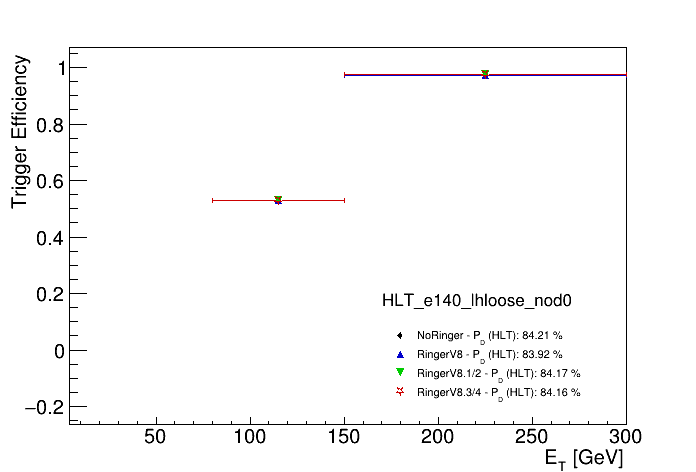

In [12]:
for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/et'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    for chain in chain_list:

        ringer_list = ['noringer', 
                       'ringer_v8_new', 
                       'ringer_v8_half',
                       'ringer_v8_34']

        label_list = ['NoRinger', 
                      'Ringer V8', 
                      'Ringer V8.1/2',
                      'Ringer V8.3/4'
                     ]


        #chain = 'e26_lh{OP}_nod0_{RINGER}_ivarloose'
        #e26_lh{OP}_nod0_{RINGER}_ivarloose


        trigger = step+'_'+chain

        m_info = np.array([
            # ringer 2017
            make_et_plot(table, 
                         trigger.format(RINGER='noringer'), chain_step=step, l2suffix='noringer', 
                        ),
            # no ringer 2017
            make_et_plot(table, 
                         trigger.format(RINGER='ringer_v8_new'), chain_step=step, l2suffix='ringer_v8_new', 
                        ),
            # no ringer 2017
            make_et_plot(table, 
                         trigger.format(RINGER='ringer_v8_half'), chain_step=step, l2suffix='ringer_v8_half', 
                        ),
            # no ringer 2017
            make_et_plot(table, 
                         trigger.format(RINGER='ringer_v8_34'), chain_step=step, l2suffix='ringer_v8_34', 
                        )
        ])

        # make the plot
        fig = rpl.create_canvas('my_canvas', canw=1400, canh=1000)
        fig = rpl.plot_profiles( m_info[:,0], 'E_{T} [GeV]', colors, markers)
        #rpl.set_atlas_label(0.15,0.85,'Internal, pp data #sqrt{s}= 13TeV')
        rpl.format_canvas_axes(YTitleOffset = 0.95)
        labels = []
        for idx, ilabel in enumerate(['NoRinger', 'RingerV8', 'RingerV8.1/2', 'RingerV8.3/4']):
            labels.append('%s - P_{D} (%s): %1.2f %%' %(ilabel, step, m_info[idx, 1]*100))
        add_legend( 0.55,0.15, labels)
        rpl.add_text( 0.55, 0.35, '%s_%s_%s_nod0' %(step, chain.split('_')[0], chain.split('_')[1]), textsize=0.04)
        rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , yminf=-0.5, ymaxf=1.1) 
        fig.show()
        print('Saving '+ plot_path+'/effs/eff_et_%s_%s_%s_root' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_et_%s_%s_%s_root.pdf' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_et_%s_%s_%s_root.png' %(step, chain.split('_')[0], chain.split('_')[1]))

Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/et/effs/fr_et_HLT_e24_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/et/effs/fr_et_HLT_e26_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/et/effs/fr_et_HLT_e60_lhmedium_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/et/effs/fr_et_HLT_e140_lhloose_root
ERROR in TPDF::Open: Cannot open file:/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/et/fr_et_HLT_e24_lhtight_root.pdf
ERROR in TPDF::Open: Cannot open file:/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/et/fr_et_HLT_e26_lhtight_root.pdf
ERROR in TPDF::Open: Cannot open file:/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/et/fr_et_HLT_e60_lhmedium_root.pdf
ERROR in TPDF::Open: Cannot open file:/home/pedro.lim

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
python ERROR: cannot open image file "/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/et/fr_et_HLT_e24_lhtight_root.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/et/fr_et_HLT_e24_lhtight_root.png
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
python ERROR: cannot open image file "/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/et/fr_et_HLT_e26_lhtight_root.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/et/fr_et_HLT_e26_lhtight_root.png
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
python ERROR: cannot open image file "/home/pedro.lima/workspa

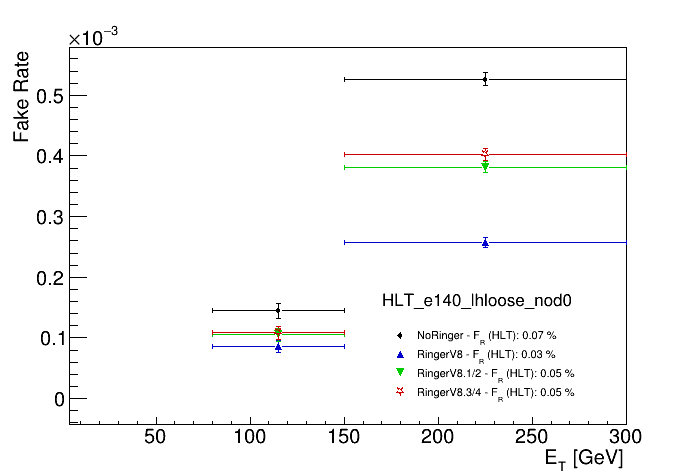

In [13]:
for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/et'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    for chain in chain_list:

        ringer_list = ['noringer', 
                       'ringer_v8_new', 
                       'ringer_v8_half',
                       'ringer_v8_34']

        label_list = ['NoRinger', 
                      'Ringer V8', 
                      'Ringer V8.1/2',
                      'Ringer V8.3/4'
                     ]


        #chain = 'e26_lh{OP}_nod0_{RINGER}_ivarloose'
        #e26_lh{OP}_nod0_{RINGER}_ivarloose


        trigger = step+'_'+chain

        m_info = np.array([
            # ringer 2017
            make_et_plot(table, 
                         trigger.format(RINGER='noringer'), chain_step=step, l2suffix='noringer', fake = True
                        ),
            # no ringer 2017
            make_et_plot(table, 
                         trigger.format(RINGER='ringer_v8_new'), chain_step=step, l2suffix='ringer_v8_new', fake = True
                        ),
            # no ringer 2017
            make_et_plot(table, 
                         trigger.format(RINGER='ringer_v8_half'), chain_step=step, l2suffix='ringer_v8_half', fake = True
                        ),
            # no ringer 2017
            make_et_plot(table, 
                         trigger.format(RINGER='ringer_v8_34'), chain_step=step, l2suffix='ringer_v8_34', fake = True
                        )
        ])

        # make the plot
        fig = rpl.create_canvas('my_canvas', canw=1400, canh=1000)
        fig = rpl.plot_profiles( m_info[:,0], 'E_{T} [GeV]', colors, markers, ylabel='Fake Rate')
        #rpl.set_atlas_label(0.15,0.85,'Internal, pp data #sqrt{s}= 13TeV')
        rpl.format_canvas_axes(YTitleOffset = 0.95)
        labels = []
        for idx, ilabel in enumerate(['NoRinger', 'RingerV8', 'RingerV8.1/2', 'RingerV8.3/4']):
            labels.append('%s - F_{R} (%s): %1.2f %%' %(ilabel, step, m_info[idx, 1]*100))
        add_legend( 0.55,0.15, labels)
        rpl.add_text( 0.55, 0.35, '%s_%s_%s_nod0' %(step, chain.split('_')[0], chain.split('_')[1]), textsize=0.04)
        rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , yminf=-0.5, ymaxf=1.1) 
        fig.show()
        print('Saving '+ plot_path+'/effs/fr_et_%s_%s_%s_root' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/fr_et_%s_%s_%s_root.pdf' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/fr_et_%s_%s_%s_root.png' %(step, chain.split('_')[0], chain.split('_')[1]))

### Efficiency with respect to $\eta$

In [14]:
def make_eta_plot(dataframe, chain, chain_step, l2suffix, fake=False):
    var = 'trig_L2_cl_eta'
    from Gaugi.constants import GeV
    # plot in eta need sum 1 in chain threshold 

    m_bins = [-2.47,-2.37,-2.01,-1.81,-1.52,-1.37,-1.15,-0.80,-0.60,-0.10,0.00,
              0.10, 0.60, 0.80, 1.15, 1.37, 1.52, 1.81, 2.01, 2.37, 2.47]
    
    et_cut  = int(chain.split('_')[1][1:])
    offline = chain.split('_')[2]
    if fake:
        #aux_df = dataframe.loc[(dataframe.target != 1) & (dataframe.el_lhvloose != 1) &\
        aux_df = dataframe.loc[(dataframe.target != 1) & (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                                                *GeV
    else:
        aux_df = dataframe.loc[(dataframe.target == 1) & (dataframe['el_%s' %(offline)] == 1) & (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                                                                                       *GeV
    
    #step_decision = chain_step + '_' + '_'.join(chain.split('_')[1:])
    step_decision = chain
    #'L2Calo_e26_lhtight_nod0_ringer_v8_34_ivarloose'
    # cuts for all
    total   = aux_df
    passed  = aux_df.loc[(aux_df[step_decision] == 1)]
    
    h_num = hist1d('eta_num', passed[var], m_bins )
    h_den = hist1d('eta_den', total[var], m_bins )
    h_eff = rpl.hist1d.divide(h_num,h_den) 
    
    return h_eff, len(passed)/len(total)

Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eta/effs/eff_eta_HLT_e24_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eta/effs/eff_eta_HLT_e26_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eta/effs/eff_eta_HLT_e60_lhmedium_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eta/effs/eff_eta_HLT_e140_lhloose_root
ERROR in TPDF::Open: Cannot open file:/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eta/eff_eta_HLT_e24_lhtight_root.pdf
ERROR in TPDF::Open: Cannot open file:/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eta/eff_eta_HLT_e26_lhtight_root.pdf
ERROR in TPDF::Open: Cannot open file:/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eta/eff_eta_HLT_e60_lhmedium_root.pdf
ERROR in TPDF::Open: Cann

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
python ERROR: cannot open image file "/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eta/eff_eta_HLT_e24_lhtight_root.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eta/eff_eta_HLT_e24_lhtight_root.png
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
python ERROR: cannot open image file "/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eta/eff_eta_HLT_e26_lhtight_root.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eta/eff_eta_HLT_e26_lhtight_root.png
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
python ERROR: cannot open image file "/home/pe

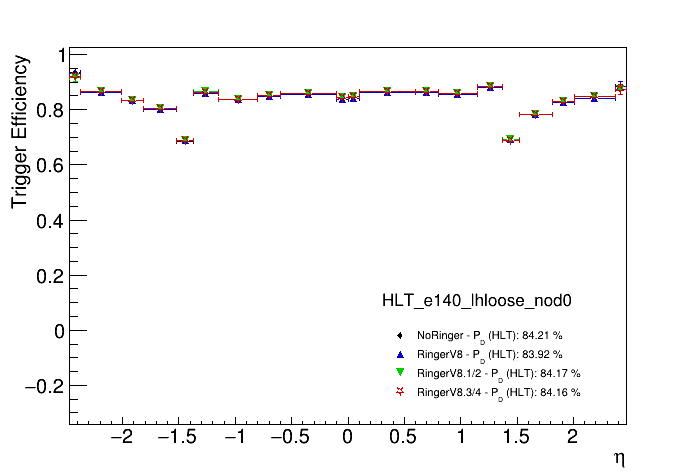

In [15]:
for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eta'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    for chain in chain_list:

        ringer_list = ['noringer', 
                       'ringer_v8_new', 
                       'ringer_v8_half',
                       'ringer_v8_34']

        label_list = ['NoRinger', 
                      'Ringer V8', 
                      'Ringer V8.1/2',
                      'Ringer V8.3/4'
                     ]


        #chain = 'e26_lh{OP}_nod0_{RINGER}_ivarloose'
        #e26_lh{OP}_nod0_{RINGER}_ivarloose


        trigger = step+'_'+chain

        m_info = np.array([
            # ringer 2017
            make_eta_plot(table, 
                         trigger.format(RINGER='noringer'), chain_step=step, l2suffix='noringer', 
                        ),
            # no ringer 2017
            make_eta_plot(table, 
                         trigger.format(RINGER='ringer_v8_new'), chain_step=step, l2suffix='ringer_v8_new', 
                        ),
            # no ringer 2017
            make_eta_plot(table, 
                         trigger.format(RINGER='ringer_v8_half'), chain_step=step, l2suffix='ringer_v8_half', 
                        ),
            # no ringer 2017
            make_eta_plot(table, 
                         trigger.format(RINGER='ringer_v8_34'), chain_step=step, l2suffix='ringer_v8_34', 
                        )
        ])

        # make the plot
        fig = rpl.create_canvas('my_canvas', canw=1400, canh=1000)
        fig = rpl.plot_profiles( m_info[:,0], '#eta', colors, markers)
        #rpl.set_atlas_label(0.15,0.85,'Internal, pp data #sqrt{s}= 13TeV')
        rpl.format_canvas_axes(YTitleOffset = 0.95)
        labels = []
        for idx, ilabel in enumerate(['NoRinger', 'RingerV8', 'RingerV8.1/2', 'RingerV8.3/4']):
            labels.append('%s - P_{D} (%s): %1.2f %%' %(ilabel, step, m_info[idx, 1]*100))
        add_legend( 0.55,0.15, labels)
        rpl.add_text( 0.55, 0.35, '%s_%s_%s_nod0' %(step, chain.split('_')[0], chain.split('_')[1]), textsize=0.04)
        rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , yminf=-0.5, ymaxf=1.1)
        fig.show()
        print('Saving '+ plot_path+'/effs/eff_eta_%s_%s_%s_root' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_eta_%s_%s_%s_root.pdf' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_eta_%s_%s_%s_root.png' %(step, chain.split('_')[0], chain.split('_')[1]))

Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/eta/effs/fr_eta_HLT_e24_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/eta/effs/fr_eta_HLT_e26_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/eta/effs/fr_eta_HLT_e60_lhmedium_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/eta/effs/fr_eta_HLT_e140_lhloose_root
ERROR in TPDF::Open: Cannot open file:/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/eta/fr_eta_HLT_e24_lhtight_root.pdf
ERROR in TPDF::Open: Cannot open file:/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/eta/fr_eta_HLT_e26_lhtight_root.pdf
ERROR in TPDF::Open: Cannot open file:/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/eta/fr_eta_HLT_e60_lhmedium_root.pdf
ERROR in TPDF::Open: Cannot open file:/

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
python ERROR: cannot open image file "/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/eta/fr_eta_HLT_e24_lhtight_root.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/eta/fr_eta_HLT_e24_lhtight_root.png
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
python ERROR: cannot open image file "/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/eta/fr_eta_HLT_e26_lhtight_root.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/eta/fr_eta_HLT_e26_lhtight_root.png
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
python ERROR: cannot open image file "/home/pedro.lima

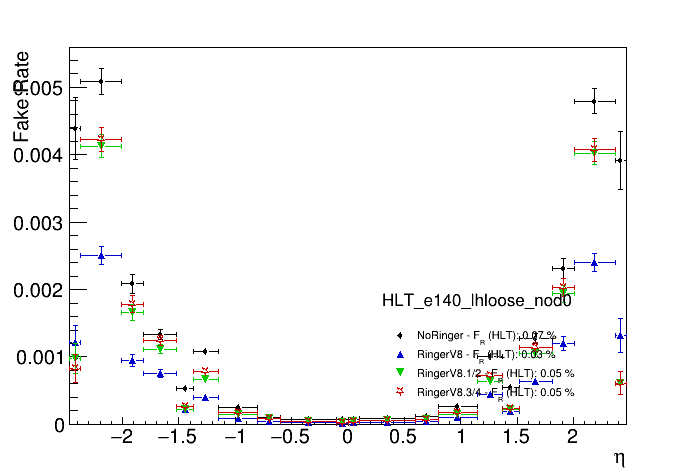

In [16]:
for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/eta'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    for chain in chain_list:

        ringer_list = ['noringer', 
                       'ringer_v8_new', 
                       'ringer_v8_half',
                       'ringer_v8_34']

        label_list = ['NoRinger', 
                      'Ringer V8', 
                      'Ringer V8.1/2',
                      'Ringer V8.3/4'
                     ]


        #chain = 'e26_lh{OP}_nod0_{RINGER}_ivarloose'
        #e26_lh{OP}_nod0_{RINGER}_ivarloose


        trigger = step+'_'+chain

        m_info = np.array([
            # ringer 2017
            make_eta_plot(table, 
                         trigger.format(RINGER='noringer'), chain_step=step, l2suffix='noringer', fake = True
                        ),
            # no ringer 2017
            make_eta_plot(table, 
                         trigger.format(RINGER='ringer_v8_new'), chain_step=step, l2suffix='ringer_v8_new', fake = True
                        ),
            # no ringer 2017
            make_eta_plot(table, 
                         trigger.format(RINGER='ringer_v8_half'), chain_step=step, l2suffix='ringer_v8_half', fake = True
                        ),
            # no ringer 2017
            make_eta_plot(table, 
                         trigger.format(RINGER='ringer_v8_34'), chain_step=step, l2suffix='ringer_v8_34', fake = True
                        )
        ])

        # make the plot
        fig = rpl.create_canvas('my_canvas', canw=1400, canh=1000)
        fig = rpl.plot_profiles( m_info[:,0], '#eta', colors, markers, ylabel='Fake Rate')
        #rpl.set_atlas_label(0.15,0.85,'Internal, pp data #sqrt{s}= 13TeV')
        rpl.format_canvas_axes(YTitleOffset = 0.95)
        labels = []
        for idx, ilabel in enumerate(['NoRinger', 'RingerV8', 'RingerV8.1/2', 'RingerV8.3/4']):
            labels.append('%s - F_{R} (%s): %1.2f %%' %(ilabel, step, m_info[idx, 1]*100))
        add_legend( 0.55,0.15, labels)
        rpl.add_text( 0.55, 0.35, '%s_%s_%s_nod0' %(step, chain.split('_')[0], chain.split('_')[1]), textsize=0.04)
        rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , yminf=-0.5, ymaxf=1.1)
        fig.show()
        print('Saving '+ plot_path+'/effs/fr_eta_%s_%s_%s_root' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/fr_eta_%s_%s_%s_root.pdf' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/fr_eta_%s_%s_%s_root.png' %(step, chain.split('_')[0], chain.split('_')[1]))

### Efficiency with respect to $pT$

In [17]:
def make_pt_plot(dataframe, chain, chain_step, l2suffix, fake=False):
    var = 'trig_L2_cl_pt'
    from Gaugi.constants import GeV, MeV
    # plot in eta need sum 1 in chain threshold 

    #m_bins = [4,7,10,15,20,25,30,35,40,45,50,60,80,150,300] # et_bins
    #m_bins = [15, 20, 30, 40, 50, 1000000]
    m_bins = np.arange(0, 2000*10**3//2, step=50*10**3).tolist()
    et_cut  = int(chain.split('_')[1][1:])
    if fake:
        #aux_df = dataframe.loc[(dataframe.target != 1) & (dataframe.el_lhvloose != 1) &\
        aux_df = dataframe.loc[(dataframe.target != 1) &\
                               (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                      *GeV
    else:
        offline = chain.split('_')[2]
        aux_df = dataframe.loc[(dataframe.target == 1) & (dataframe['el_%s' %(offline)] == 1) & (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                                                                                       *GeV
    
    #step_decision = chain_step + '_' + '_'.join(chain.split('_')[1:])
    step_decision = chain
    #'L2Calo_e26_lhtight_nod0_ringer_v8_34_ivarloose'
    # cuts for all
    total   = aux_df
    passed  = aux_df.loc[(aux_df[step_decision] == 1)]
    
    h_num = hist1d('pt_num', passed[var]/MeV, m_bins )
    #                                               /GeV
    h_den = hist1d('pt_den', total[var]/MeV, m_bins )
    #                                              /GeV
    h_eff = rpl.hist1d.divide(h_num,h_den) 
    
    return h_eff, len(passed)/len(total)

In [ ]:
for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
#step = 'L2'
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/pt'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    for chain in chain_list:

        ringer_list = ['noringer', 
                       'ringer_v8_new', 
                       'ringer_v8_half',
                       'ringer_v8_34']

        label_list = ['NoRinger', 
                      'Ringer V8', 
                      'Ringer V8.1/2',
                      'Ringer V8.3/4'
                     ]


        #chain = 'e26_lh{OP}_nod0_{RINGER}_ivarloose'
        #e26_lh{OP}_nod0_{RINGER}_ivarloose


        trigger = step+'_'+chain

        m_info = np.array([
            # ringer 2017
            make_pt_plot(table, 
                         trigger.format(RINGER='noringer'), chain_step=step, l2suffix='noringer', 
                        ),
            # no ringer 2017
            make_pt_plot(table, 
                         trigger.format(RINGER='ringer_v8_new'), chain_step=step, l2suffix='ringer_v8_new', 
                        ),
            # no ringer 2017
            make_pt_plot(table, 
                         trigger.format(RINGER='ringer_v8_half'), chain_step=step, l2suffix='ringer_v8_half', 
                        ),
            # no ringer 2017
            make_pt_plot(table, 
                         trigger.format(RINGER='ringer_v8_34'), chain_step=step, l2suffix='ringer_v8_34', 
                        )
        ])

        # make the plot
        fig = rpl.create_canvas('my_canvas', canw=1400, canh=1000)
        fig = rpl.plot_profiles( m_info[:,0], 'pT [MeV]', colors, markers)
        #rpl.set_atlas_label(0.15,0.85,'Internal, pp data #sqrt{s}= 13TeV')
        rpl.format_canvas_axes(YTitleOffset = 0.95)
        labels = []
        for idx, ilabel in enumerate(['NoRinger', 'RingerV8', 'RingerV8.1/2', 'RingerV8.3/4']):
            labels.append('%s - P_{D} (%s): %1.2f %%' %(ilabel, step, m_info[idx, 1]*100))
        add_legend( 0.15,0.15, labels)
        rpl.add_text( 0.15, 0.35, '%s_%s_%s_nod0' %(step, chain.split('_')[0], chain.split('_')[1]), textsize=0.04)
        rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , yminf=0, ymaxf=1.1) 
        fig.show()
        print('Saving '+ plot_path+'/effs/eff_pt_%s_%s_%s_root' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_pt_%s_%s_%s_root.pdf' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_pt_%s_%s_%s_root.png' %(step, chain.split('_')[0], chain.split('_')[1]))

In [ ]:
for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    #step = 'L2'
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/pt'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    for chain in chain_list:

        ringer_list = ['noringer', 
                       'ringer_v8_new', 
                       'ringer_v8_half',
                       'ringer_v8_34']

        label_list = ['NoRinger', 
                      'Ringer V8', 
                      'Ringer V8.1/2',
                      'Ringer V8.3/4'
                     ]


        #chain = 'e26_lh{OP}_nod0_{RINGER}_ivarloose'
        #e26_lh{OP}_nod0_{RINGER}_ivarloose


        trigger = step+'_'+chain

        m_info = np.array([
            # ringer 2017
            make_pt_plot(table, 
                         trigger.format(RINGER='noringer'), chain_step=step, l2suffix='noringer', fake=True
                        ),
            # no ringer 2017
            make_pt_plot(table, 
                         trigger.format(RINGER='ringer_v8_new'), chain_step=step, l2suffix='ringer_v8_new', fake=True
                        ),
            # no ringer 2017
            make_pt_plot(table, 
                         trigger.format(RINGER='ringer_v8_half'), chain_step=step, l2suffix='ringer_v8_half', fake=True
                        ),
            # no ringer 2017
            make_pt_plot(table, 
                         trigger.format(RINGER='ringer_v8_34'), chain_step=step, l2suffix='ringer_v8_34', fake=True
                        )
        ])

        # make the plot
        fig = rpl.create_canvas('my_canvas', canw=1400, canh=1000)
        fig = rpl.plot_profiles( m_info[:,0], 'pT [MeV]', colors, markers, ylabel = 'Fake Rate')
        #rpl.set_atlas_label(0.15,0.85,'Internal, pp data #sqrt{s}= 13TeV')
        rpl.format_canvas_axes(YTitleOffset = 0.95)
        labels = []
        for idx, ilabel in enumerate(['NoRinger', 'RingerV8', 'RingerV8.1/2', 'RingerV8.3/4']):
            labels.append('%s - F_{R} (%s): %1.2f %%' %(ilabel, step, m_info[idx, 1]*100))
        add_legend( 0.15,0.6, labels)
        rpl.add_text( 0.15, 0.8, '%s_%s_%s_nod0' %(step, chain.split('_')[0], chain.split('_')[1]), textsize=0.04)
        rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , yminf=0, ymaxf=1.1) 
        fig.show()
        print('Saving '+ plot_path+'/effs/fr_pt_%s_%s_%s_root' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/fr_pt_%s_%s_%s_root.pdf' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/fr_pt_%s_%s_%s_root.png' %(step, chain.split('_')[0], chain.split('_')[1]))

### Efficiency with respect to $< \mu >$

In [ ]:
def make_mu_plot(dataframe, chain, chain_step, l2suffix, fake=False):
    var = 'avgmu'
    from Gaugi.constants import GeV, MeV
    # plot in eta need sum 1 in chain threshold 

    m_bins = [10, 20, 30, 40, 50, 60, 70] # et_bins
    #m_bins = [15, 20, 30, 40, 50, 1000000]
    #m_bins = np.arange(0, 2000*10**3, step=50*10**3).tolist()
    et_cut  = int(chain.split('_')[1][1:])
    if fake:
        #aux_df = dataframe.loc[(dataframe.target != 1) & (dataframe.el_lhvloose != 1) &\
        aux_df = dataframe.loc[(dataframe.target != 1) &\
                               (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                      *GeV
    else:
        offline = chain.split('_')[2]
        aux_df = dataframe.loc[(dataframe.target == 1) & (dataframe['el_%s' %(offline)] == 1) & (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                                                                                       *GeV
    
    #step_decision = chain_step + '_' + '_'.join(chain.split('_')[1:])
    step_decision = chain
    #'L2Calo_e26_lhtight_nod0_ringer_v8_34_ivarloose'
    # cuts for all
    total   = aux_df
    passed  = aux_df.loc[(aux_df[step_decision] == 1)]
    
    h_num = hist1d('mu_num', passed[var]/MeV, m_bins )
    #                                               /GeV
    h_den = hist1d('mu_den', total[var]/MeV, m_bins )
    #                                              /GeV
    h_eff = rpl.hist1d.divide(h_num,h_den) 
    
    return h_eff, len(passed)/len(total)

In [ ]:
for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
#step = 'L2'
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/mu'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    for chain in chain_list:

        ringer_list = ['noringer', 
                       'ringer_v8_new', 
                       'ringer_v8_half',
                       'ringer_v8_34']

        label_list = ['NoRinger', 
                      'Ringer V8', 
                      'Ringer V8.1/2',
                      'Ringer V8.3/4'
                     ]


        #chain = 'e26_lh{OP}_nod0_{RINGER}_ivarloose'
        #e26_lh{OP}_nod0_{RINGER}_ivarloose


        trigger = step+'_'+chain

        m_info = np.array([
            # ringer 2017
            make_mu_plot(table, 
                         trigger.format(RINGER='noringer'), chain_step=step, l2suffix='noringer', 
                        ),
            # Ringer V8
            make_mu_plot(table, 
                         trigger.format(RINGER='ringer_v8_new'), chain_step=step, l2suffix='ringer_v8_new', 
                        ),
            # Ringer V8.1/2
            make_mu_plot(table, 
                         trigger.format(RINGER='ringer_v8_half'), chain_step=step, l2suffix='ringer_v8_half', 
                        ),
            # Ringer V8.3/4
            make_mu_plot(table, 
                         trigger.format(RINGER='ringer_v8_34'), chain_step=step, l2suffix='ringer_v8_34', 
                        )
        ])

        # make the plot
        fig = rpl.create_canvas('my_canvas', canw=1400, canh=1000)
        fig = rpl.plot_profiles( m_info[:,0], '< #mu >', colors, markers)
        #rpl.set_atlas_label(0.15,0.85,'Internal, pp data #sqrt{s}= 13TeV')
        rpl.format_canvas_axes(YTitleOffset = 0.95)
        labels = []
        for idx, ilabel in enumerate(['NoRinger', 'RingerV8', 'RingerV8.1/2', 'RingerV8.3/4']):
            labels.append('%s - P_{D} (%s): %1.2f %%' %(ilabel, step, m_info[idx, 1]*100))
        add_legend( 0.55,0.15, labels)
        rpl.add_text( 0.55, 0.35, '%s_%s_%s_nod0' %(step, chain.split('_')[0], chain.split('_')[1]), textsize=0.04)
        rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , yminf=-0.5, ymaxf=1.1) 
        fig.show()
        print('Saving '+ plot_path+'/effs/eff_mu_%s_%s_%s_root' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_mu_%s_%s_%s_root.pdf' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_mu_%s_%s_%s_root.png' %(step, chain.split('_')[0], chain.split('_')[1]))

In [ ]:
for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
#step = 'L2'
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/frs/mu'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    for chain in chain_list:

        ringer_list = ['noringer', 
                       'ringer_v8_new', 
                       'ringer_v8_half',
                       'ringer_v8_34']

        label_list = ['NoRinger', 
                      'Ringer V8', 
                      'Ringer V8.1/2',
                      'Ringer V8.3/4'
                     ]


        #chain = 'e26_lh{OP}_nod0_{RINGER}_ivarloose'
        #e26_lh{OP}_nod0_{RINGER}_ivarloose


        trigger = step+'_'+chain

        m_info = np.array([
            # ringer 2017
            make_mu_plot(table, 
                         trigger.format(RINGER='noringer'), chain_step=step, l2suffix='noringer', fake = True
                        ),
            # Ringer V8
            make_mu_plot(table, 
                         trigger.format(RINGER='ringer_v8_new'), chain_step=step, l2suffix='ringer_v8_new', fake = True
                        ),
            # Ringer V8.1/2
            make_mu_plot(table, 
                         trigger.format(RINGER='ringer_v8_half'), chain_step=step, l2suffix='ringer_v8_half', fake = True
                        ),
            # Ringer V8.3/4
            make_mu_plot(table, 
                         trigger.format(RINGER='ringer_v8_34'), chain_step=step, l2suffix='ringer_v8_34', fake = True
                        )
        ])

        # make the plot
        fig = rpl.create_canvas('my_canvas', canw=1400, canh=1000)
        fig = rpl.plot_profiles( m_info[:,0], '< #mu >', colors, markers, ylabel = 'Fake Rate')
        #rpl.set_atlas_label(0.15,0.85,'Internal, pp data #sqrt{s}= 13TeV')
        rpl.format_canvas_axes(YTitleOffset = 0.95)
        labels = []
        for idx, ilabel in enumerate(['NoRinger', 'RingerV8', 'RingerV8.1/2', 'RingerV8.3/4']):
            labels.append('%s - F_{R} (%s): %1.2f %%' %(ilabel, step, m_info[idx, 1]*100))
        add_legend( 0.55,0.15, labels)
        rpl.add_text( 0.55, 0.35, '%s_%s_%s_nod0' %(step, chain.split('_')[0], chain.split('_')[1]), textsize=0.04)
        rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , yminf=-0.5, ymaxf=1.1) 
        fig.show()
        print('Saving '+ plot_path+'/effs/fr_mu_%s_%s_%s_root' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/fr_mu_%s_%s_%s_root.pdf' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/fr_mu_%s_%s_%s_root.png' %(step, chain.split('_')[0], chain.split('_')[1]))

## Energy profiles

In [ ]:
if False:
    normalizar = True
    
    rings=table.columns.values[11:111]
    n_rings = np.linspace(0, 99, 100)
    ee_value = []
    jet_value = []
    layers = [8-1, 8+64-1, 8+64+8-1, 8+64+8+8-1, 8+64+8+8+4-1, 8+64+8+8+4+4-1]
    
    ees = table.loc[(table.target==1)]
    jets = table.loc[(table.target==0)]
    
    for ring in rings:
        ee_value.append(ees[ring].mean())
        jet_value.append(jets[ring].mean())
    
    if normalizar:
        ee_value = [i/sum(ee_value) for i in ee_value]
        jet_value = [i/sum(jet_value) for i in jet_value]
        
    plt.figure(figsize=(25,10))
    plt.plot(n_rings, ee_value, label = 'Electrons')
    plt.plot(n_rings, jet_value, label = 'Jets')
    plt.vlines(x=layers, ymin=0, ymax=0.5, colors = 'black', ls = '--')
    plt.legend(loc = 9)
    plt.grid()
    plt.show()

In [ ]:
if False:  
    def norm1( data ):
        norms = np.abs( data.sum(axis=1) )
        norms[norms==0] = 1
        return data/norms[:,None]
    
    normalizar = True
    
    rings=table.columns.values[11:111]
    n_rings = np.linspace(0, 99, 100)
    ee_value = []
    layers = [8-1, 8+64-1, 8+64+8-1, 8+64+8+8-1, 8+64+8+8+4-1, 8+64+8+8+4+4-1]
    
    ees = table.loc[(table.target==1)]
    ees = ees[rings]
    #jets = table.loc[(table.target==0)]
    
    if normalizar:
        ees = norm1(ees)
        
    plt.figure(figsize=(25,10))
    for irow in range(20000):
        #               |
        #    numero de linhas a processar
        #    todas = len(ees)
        row = ees.iloc[irow]
        plt.plot(n_rings, row, color = 'black', linewidth=0.2)
    plt.vlines(x=layers, ymin=-1, ymax=1, colors = 'black', ls = '--')
    plt.title('Electrons')
    plt.xlabel('Rings', loc='center')
    plt.ylabel('Normalized Energy', loc='center')
    #plt.legend(loc = 9)
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.text(2-0.5, 0.7, 'PS', fontsize = 15)
    ax.text(8-0.5, 0.7, 'EM1', fontsize = 15)
    ax.text(8+64-0.5, 0.7, 'EM2', fontsize = 15)
    ax.text(8+64+8-0.5, 0.7, 'EM3', fontsize = 15)
    ax.text(8+64+8+8-0.5, 0.7, 'HAD1', fontsize = 15)
    ax.text(8+64+8+8+4-0.5, 0.7, 'HAD2', fontsize = 15)
    ax.text(8+64+8+8+4+4-0.5, 0.7, 'HAD3', fontsize = 15)
    plt.ylim(-0.07, 0.75)
    plt.xlim(0,99)
    plt.grid()
    plt.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/Electrons_energy_profile_et%d_eta%d.png'%(range_et[0], range_eta[0]))
    plt.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/Electrons_energy_profile_et%d_eta%d.pdf'%(range_et[0], range_eta[0]))
    plt.show()

In [ ]:
if False:  
    def norm1( data ):
        norms = np.abs( data.sum(axis=1) )
        norms[norms==0] = 1
        return data/norms[:,None]
    
    normalizar = True
    
    rings=table.columns.values[11:111]
    n_rings = np.linspace(0, 99, 100)
    jet_value = []
    layers = [8-1, 8+64-1, 8+64+8-1, 8+64+8+8-1, 8+64+8+8+4-1, 8+64+8+8+4+4-1]
    
    jets = table.loc[(table.target==0)]
    jets = jets[rings]
    
    if normalizar:
        jets = norm1(jets)
        
    plt.figure(figsize=(25,10))
    for irow in range(20000):
        #               |
        #    numero de linhas a processar
        #    todas = len(jets)
        row = jets.iloc[irow]
        plt.plot(n_rings, row, color = 'black', linewidth=0.2)
    plt.vlines(x=layers, ymin=-1, ymax=1, colors = 'black', ls = '--')
    plt.title('Jets')
    plt.xlabel('Rings', loc='center')
    plt.ylabel('Normalized Energy', loc='center')
    #plt.legend(loc = 9)
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.text(2-0.5, 0.7, 'PS', fontsize = 15)
    ax.text(8-0.5, 0.7, 'EM1', fontsize = 15)
    ax.text(8+64-0.5, 0.7, 'EM2', fontsize = 15)
    ax.text(8+64+8-0.5, 0.7, 'EM3', fontsize = 15)
    ax.text(8+64+8+8-0.5, 0.7, 'HAD1', fontsize = 15)
    ax.text(8+64+8+8+4-0.5, 0.7, 'HAD2', fontsize = 15)
    ax.text(8+64+8+8+4+4-0.5, 0.7, 'HAD3', fontsize = 15)
    plt.ylim(-0.07, 0.75)
    plt.xlim(0,99)
    plt.grid()
    plt.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/Jets_energy_profile_et%d_eta%d.png'%(range_et[0], range_eta[0]))
    plt.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/Jets_energy_profile_et%d_eta%d.pdf'%(range_et[0], range_eta[0]))
    plt.show()

In [ ]:
if False:  
    def norm1( data ):
        norms = np.abs( data.sum(axis=1) )
        norms[norms==0] = 1
        return data/norms[:,None]
    
    normalizar = True
    
    for iet in range(5):
        for ieta in range(5):
            print('Processing ET: %d ETA: %d' % (iet, ieta))
            
            paths = []
            paths.append( dpath.format(ET=iet,ETA=ieta))
            table = []
            table = load_in_loop( paths, drop_columns=drop_columns, decorators=decorators, chains=chains )
            
            rings=table.columns.values[11:111]
            n_rings = np.linspace(0, 99, 100)
            ee_value = []
            layers = [8-1, 8+64-1, 8+64+8-1, 8+64+8+8-1, 8+64+8+8+4-1, 8+64+8+8+4+4-1]

            ees = table.loc[(table.target==1)]
            ees = ees[rings]
            #jets = table.loc[(table.target==0)]

            if normalizar:
                ees = norm1(ees)

            plt.figure(figsize=(25,10))
            for irow in range(20000):
                #               |
                #    numero de linhas a processar
                #    todas = len(ees)
                row = ees.iloc[irow]
                plt.plot(n_rings, row, color = 'black', linewidth=0.2)
            plt.vlines(x=layers, ymin=-1, ymax=1, colors = 'black', ls = '--')
            plt.title('Electrons')
            plt.xlabel('Rings', loc='center')
            plt.ylabel('Normalized Energy', loc='center')
            #plt.legend(loc = 9)
            ax = plt.gca()
            ax.axes.xaxis.set_ticklabels([])
            ax.text(2-0.5, 0.7, 'PS', fontsize = 15)
            ax.text(8-0.5, 0.7, 'EM1', fontsize = 15)
            ax.text(8+64-0.5, 0.7, 'EM2', fontsize = 15)
            ax.text(8+64+8-0.5, 0.7, 'EM3', fontsize = 15)
            ax.text(8+64+8+8-0.5, 0.7, 'HAD1', fontsize = 15)
            ax.text(8+64+8+8+4-0.5, 0.7, 'HAD2', fontsize = 15)
            ax.text(8+64+8+8+4+4-0.5, 0.7, 'HAD3', fontsize = 15)
            plt.ylim(-0.07, 0.75)
            plt.xlim(0,99)
            plt.grid()
            plt.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/Electrons_energy_profile_et%d_eta%d.png'%(iet, ieta))
            plt.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/Electrons_energy_profile_et%d_eta%d.pdf'%(iet, ieta))
            #plt.show()

In [ ]:
if False:  
    def norm1( data ):
        norms = np.abs( data.sum(axis=1) )
        norms[norms==0] = 1
        return data/norms[:,None]
    
    normalizar = True
    
    for iet in range(5):
        for ieta in range(5):
            print('Processing ET: %d ETA: %d' % (iet, ieta))
            
            paths = []
            paths.append( dpath.format(ET=iet,ETA=ieta))
            table = []
            table = load_in_loop( paths, drop_columns=drop_columns, decorators=decorators, chains=chains )
            
            rings=table.columns.values[11:111]
            n_rings = np.linspace(0, 99, 100)
            ee_value = []
            layers = [8-1, 8+64-1, 8+64+8-1, 8+64+8+8-1, 8+64+8+8+4-1, 8+64+8+8+4+4-1]

            jets = table.loc[(table.target==0)]
            jets = jets[rings]

            if normalizar:
                jets = norm1(jets)

            plt.figure(figsize=(25,10))
            
            if len(jets) < 20000:
                size = len(jets)
            else:
                size = 20000
                
            for irow in range(size):
                #               |
                #    numero de linhas a processar
                #    todas = len(jets)
                row = jets.iloc[irow]
                plt.plot(n_rings, row, color = 'black', linewidth=0.2)
            plt.vlines(x=layers, ymin=-1, ymax=1, colors = 'black', ls = '--')
            plt.title('Jets')
            plt.xlabel('Rings', loc='center')
            plt.ylabel('Normalized Energy', loc='center')
            #plt.legend(loc = 9)
            ax = plt.gca()
            ax.axes.xaxis.set_ticklabels([])
            ax.text(2-0.5, 0.7, 'PS', fontsize = 15)
            ax.text(8-0.5, 0.7, 'EM1', fontsize = 15)
            ax.text(8+64-0.5, 0.7, 'EM2', fontsize = 15)
            ax.text(8+64+8-0.5, 0.7, 'EM3', fontsize = 15)
            ax.text(8+64+8+8-0.5, 0.7, 'HAD1', fontsize = 15)
            ax.text(8+64+8+8+4-0.5, 0.7, 'HAD2', fontsize = 15)
            ax.text(8+64+8+8+4+4-0.5, 0.7, 'HAD3', fontsize = 15)
            plt.ylim(-0.07, 0.75)
            plt.xlim(0,99)
            plt.grid()
            plt.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/Jets_energy_profile_et%d_eta%d.png'%(iet, ieta))
            plt.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/Jets_energy_profile_et%d_eta%d.pdf'%(iet, ieta))
            #plt.show()

## Quadrant plots

### Quads for $E_T$

In [ ]:
for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    # bins = [4,7,10,15,20,25,30,35,40,45,50,60,80,150,300] # et bins
    bins = np.linspace(4,300,100).tolist()
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')]==1) & (table[chain.format(RINGER = 'ringer_v8_half')]==1)]['el_et']/1000
        #second_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1)]['el_et']/1000
        #third_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_et']/1000
        #fourth_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_et']/1000
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome] = plt.hist(table['el_et']/1000, bins=bins)
        [count_first, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')]==1) & (table[chain.format(RINGER = 'ringer_v8_half')]==1)]['el_et']/1000, bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1)]['el_et']/1000, bins=bins)
        [count_third, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_et']/1000, bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_et']/1000, bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label='First reject')
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label='Second reject')
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = 'First reject')
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = 'Second reject')
        ax1.text(175, count_second[-1]/count_total[-1]*100, '%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2]))
        ax1.set(ylabel='Disagreement [%]', xlabel='$E_T$ [GeV]')

        # save fig
        print('Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_et_v8xv12_%s_%s ...'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_et_v8xv12_%s_%s.png'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_et_v8xv12_%s_%s.pdf'%(chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $\eta$

In [ ]:
for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = [-2.47,-2.37,-2.01,-1.81,-1.52,-1.37,-1.15,-0.80,-0.60,-0.10,0.00,0.10, 0.60, 0.80, 1.15, 1.37, 1.52, 1.81, 2.01, 2.37, 2.47] # eta bins
    #bins = np.linspace(4,300,100).tolist()
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')]==1) & (table[chain.format(RINGER = 'ringer_v8_half')]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome] = plt.hist(table['el_eta'], bins=bins)
        [count_first, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')]==1) & (table[chain.format(RINGER = 'ringer_v8_half')]==1)]['el_eta'], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1)]['el_eta'], bins=bins)
        [count_third, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta'], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta'], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label='First reject')
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label='Second reject')
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = 'First reject')
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = 'Second reject')
        ax1.text(0, count_second[-1]/count_total[-1]*100, '%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2]))
        ax1.set(ylabel='Disagreement [%]', xlabel='$\eta$')

        # save fig
        print('Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_eta_v8xv12_%s_%s ...'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_eta_v8xv12_%s_%s.png'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_eta_v8xv12_%s_%s.pdf'%(chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $pT$

In [ ]:
for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = np.arange(0, 2000*10**3//2, step=50*10**3).tolist() # pt bins
    #bins = np.linspace(4,300,100).tolist()
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')]==1) & (table[chain.format(RINGER = 'ringer_v8_half')]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome] = plt.hist(table['trig_L2_el_pt'], bins=bins)
        [count_first, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')]==1) & (table[chain.format(RINGER = 'ringer_v8_half')]==1)]['trig_L2_el_pt'], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1)]['trig_L2_el_pt'], bins=bins)
        [count_third, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['trig_L2_el_pt'], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['trig_L2_el_pt'], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label='First reject')
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label='Second reject')
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = 'First reject')
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = 'Second reject')
        ax1.text(100*10**3, count_second[-1]/count_total[-1]*100, '%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2]))
        ax1.set(ylabel='Disagreement [%]', xlabel='$pT$')

        # save fig
        print('Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_pt_v8xv12_%s_%s ...'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_pt_v8xv12_%s_%s.png'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_pt_v8xv12_%s_%s.pdf'%(chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $<\mu>$

In [ ]:
for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = [10, 20, 30, 40, 50, 60, 70] # mu bins
    #bins = np.linspace(4,300,100).tolist()
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')]==1) & (table[chain.format(RINGER = 'ringer_v8_half')]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome] = plt.hist(table['avgmu'], bins=bins)
        [count_first, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')]==1) & (table[chain.format(RINGER = 'ringer_v8_half')]==1)]['avgmu'], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1)]['avgmu'], bins=bins)
        [count_third, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['avgmu'], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['avgmu'], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label='First reject')
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label='Second reject')
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = 'First reject')
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = 'Second reject')
        ax1.text(bins[len(bins)//4], count_second[-1]/count_total[-1]*100, '%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2]))
        ax1.set(ylabel='Disagreement [%]', xlabel='$<\mu>$')

        # save fig
        print('Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_mu_v8xv12_%s_%s ...'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_mu_v8xv12_%s_%s.png'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_mu_v8xv12_%s_%s.pdf'%(chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $R_{\eta}$

Processing HLT_e24_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_reta_v8xv12_HLT_e24 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e26_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_reta_v8xv12_HLT_e26 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e60_lhmedium_nod0_{RINGER}_L1EM24VHI ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_reta_v8xv12_HLT_e60 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e140_lhloose_nod0_{RINGER} ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_reta_v8xv12_HLT_e140 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

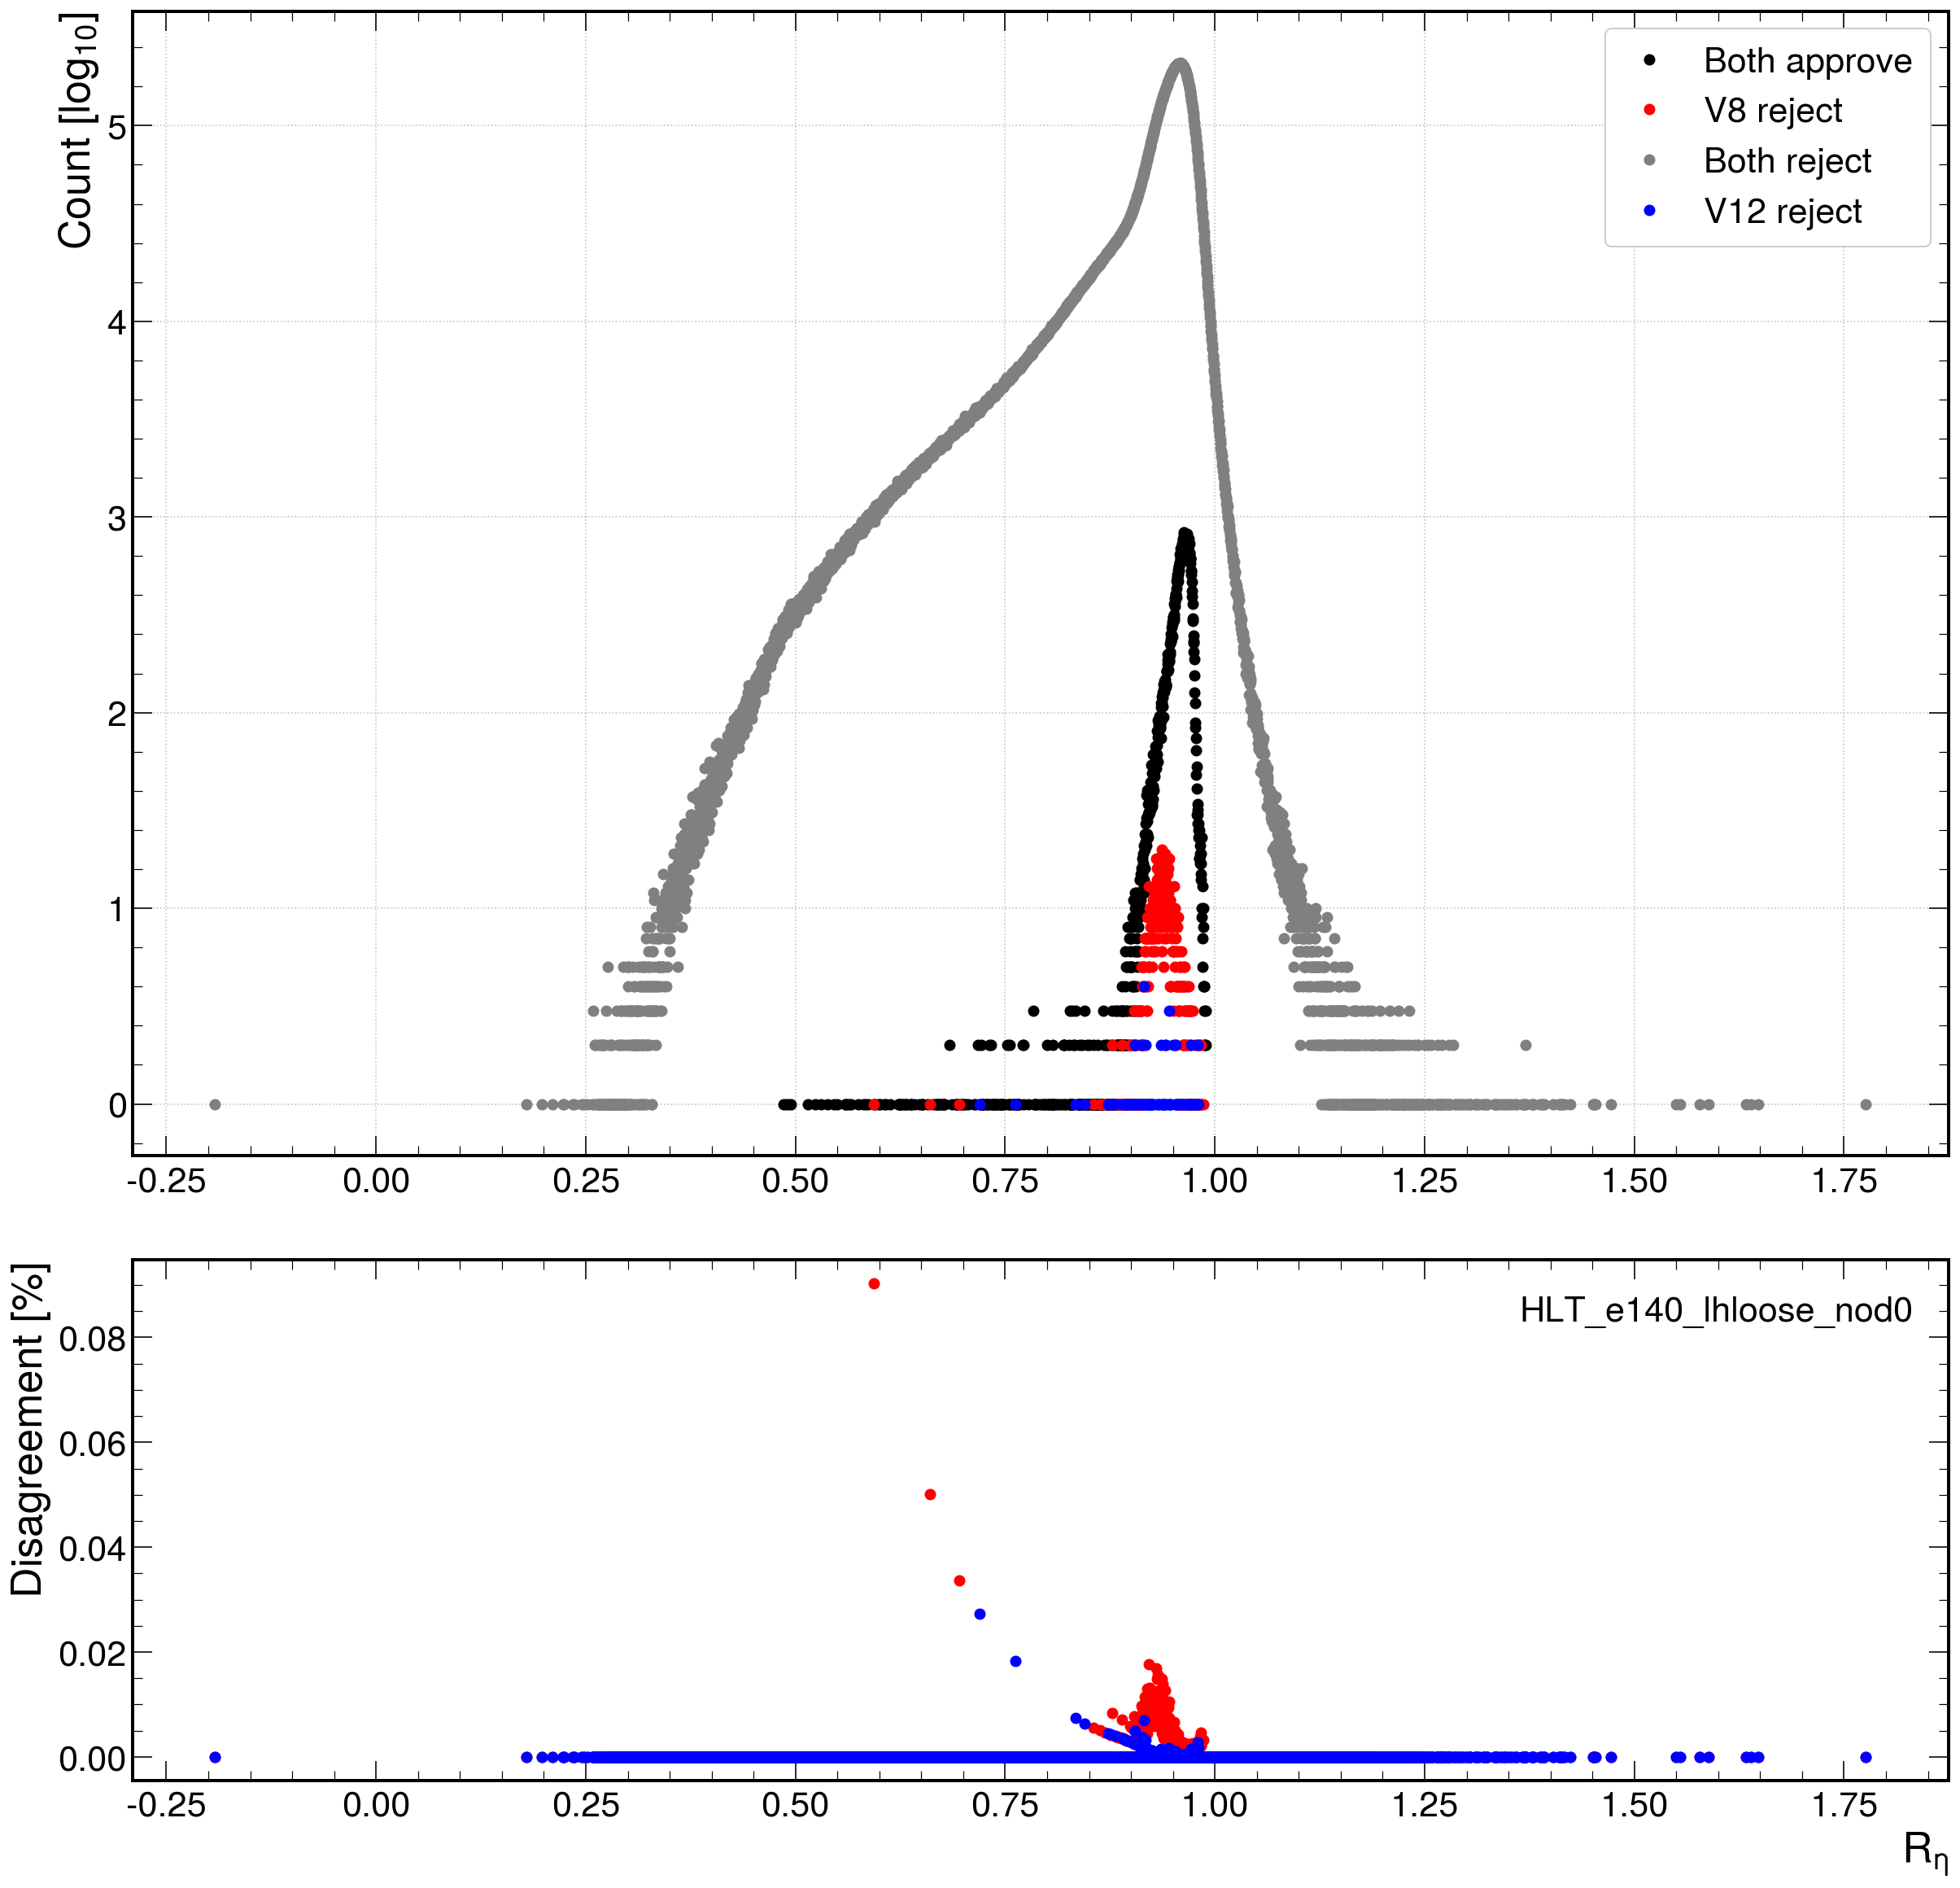

In [20]:
var = 'trig_L2_cl_reta'

for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = int(np.sqrt(table.shape[0]))
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')]==1) & (table[chain.format(RINGER = 'ringer_v8_half')]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome]  = plt.hist(table.loc[table[var]<2][var], bins=bins)
        [count_first, bins, nome]  = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1) & (table[var]<2)][var], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1) & (table[var]<2)][var], bins=bins)
        [count_third, bins, nome]  = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1) & (table[var]<2)][var], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1) & (table[var]<2)][var], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label='V8 reject')
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label='V12 reject')
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[1], count_second[1]/count_total[1]*100, 'o', color = (0,0,0,0))
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = 'V8 reject')
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = 'V12 reject')
        ax1.legend(['%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2])], loc='best')
        ax1.set(ylabel='Disagreement [%]', xlabel='$R_{\eta}$')

        # save fig
        print('Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_reta_v8xv12_%s_%s ...'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_reta_v8xv12_%s_%s.png'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_reta_v8xv12_%s_%s.pdf'%(chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $E_{ratio}$

Processing HLT_e24_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_eratio_v8xv12_HLT_e24 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e26_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_eratio_v8xv12_HLT_e26 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e60_lhmedium_nod0_{RINGER}_L1EM24VHI ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_eratio_v8xv12_HLT_e60 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e140_lhloose_nod0_{RINGER} ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_eratio_v8xv12_HLT_e140 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

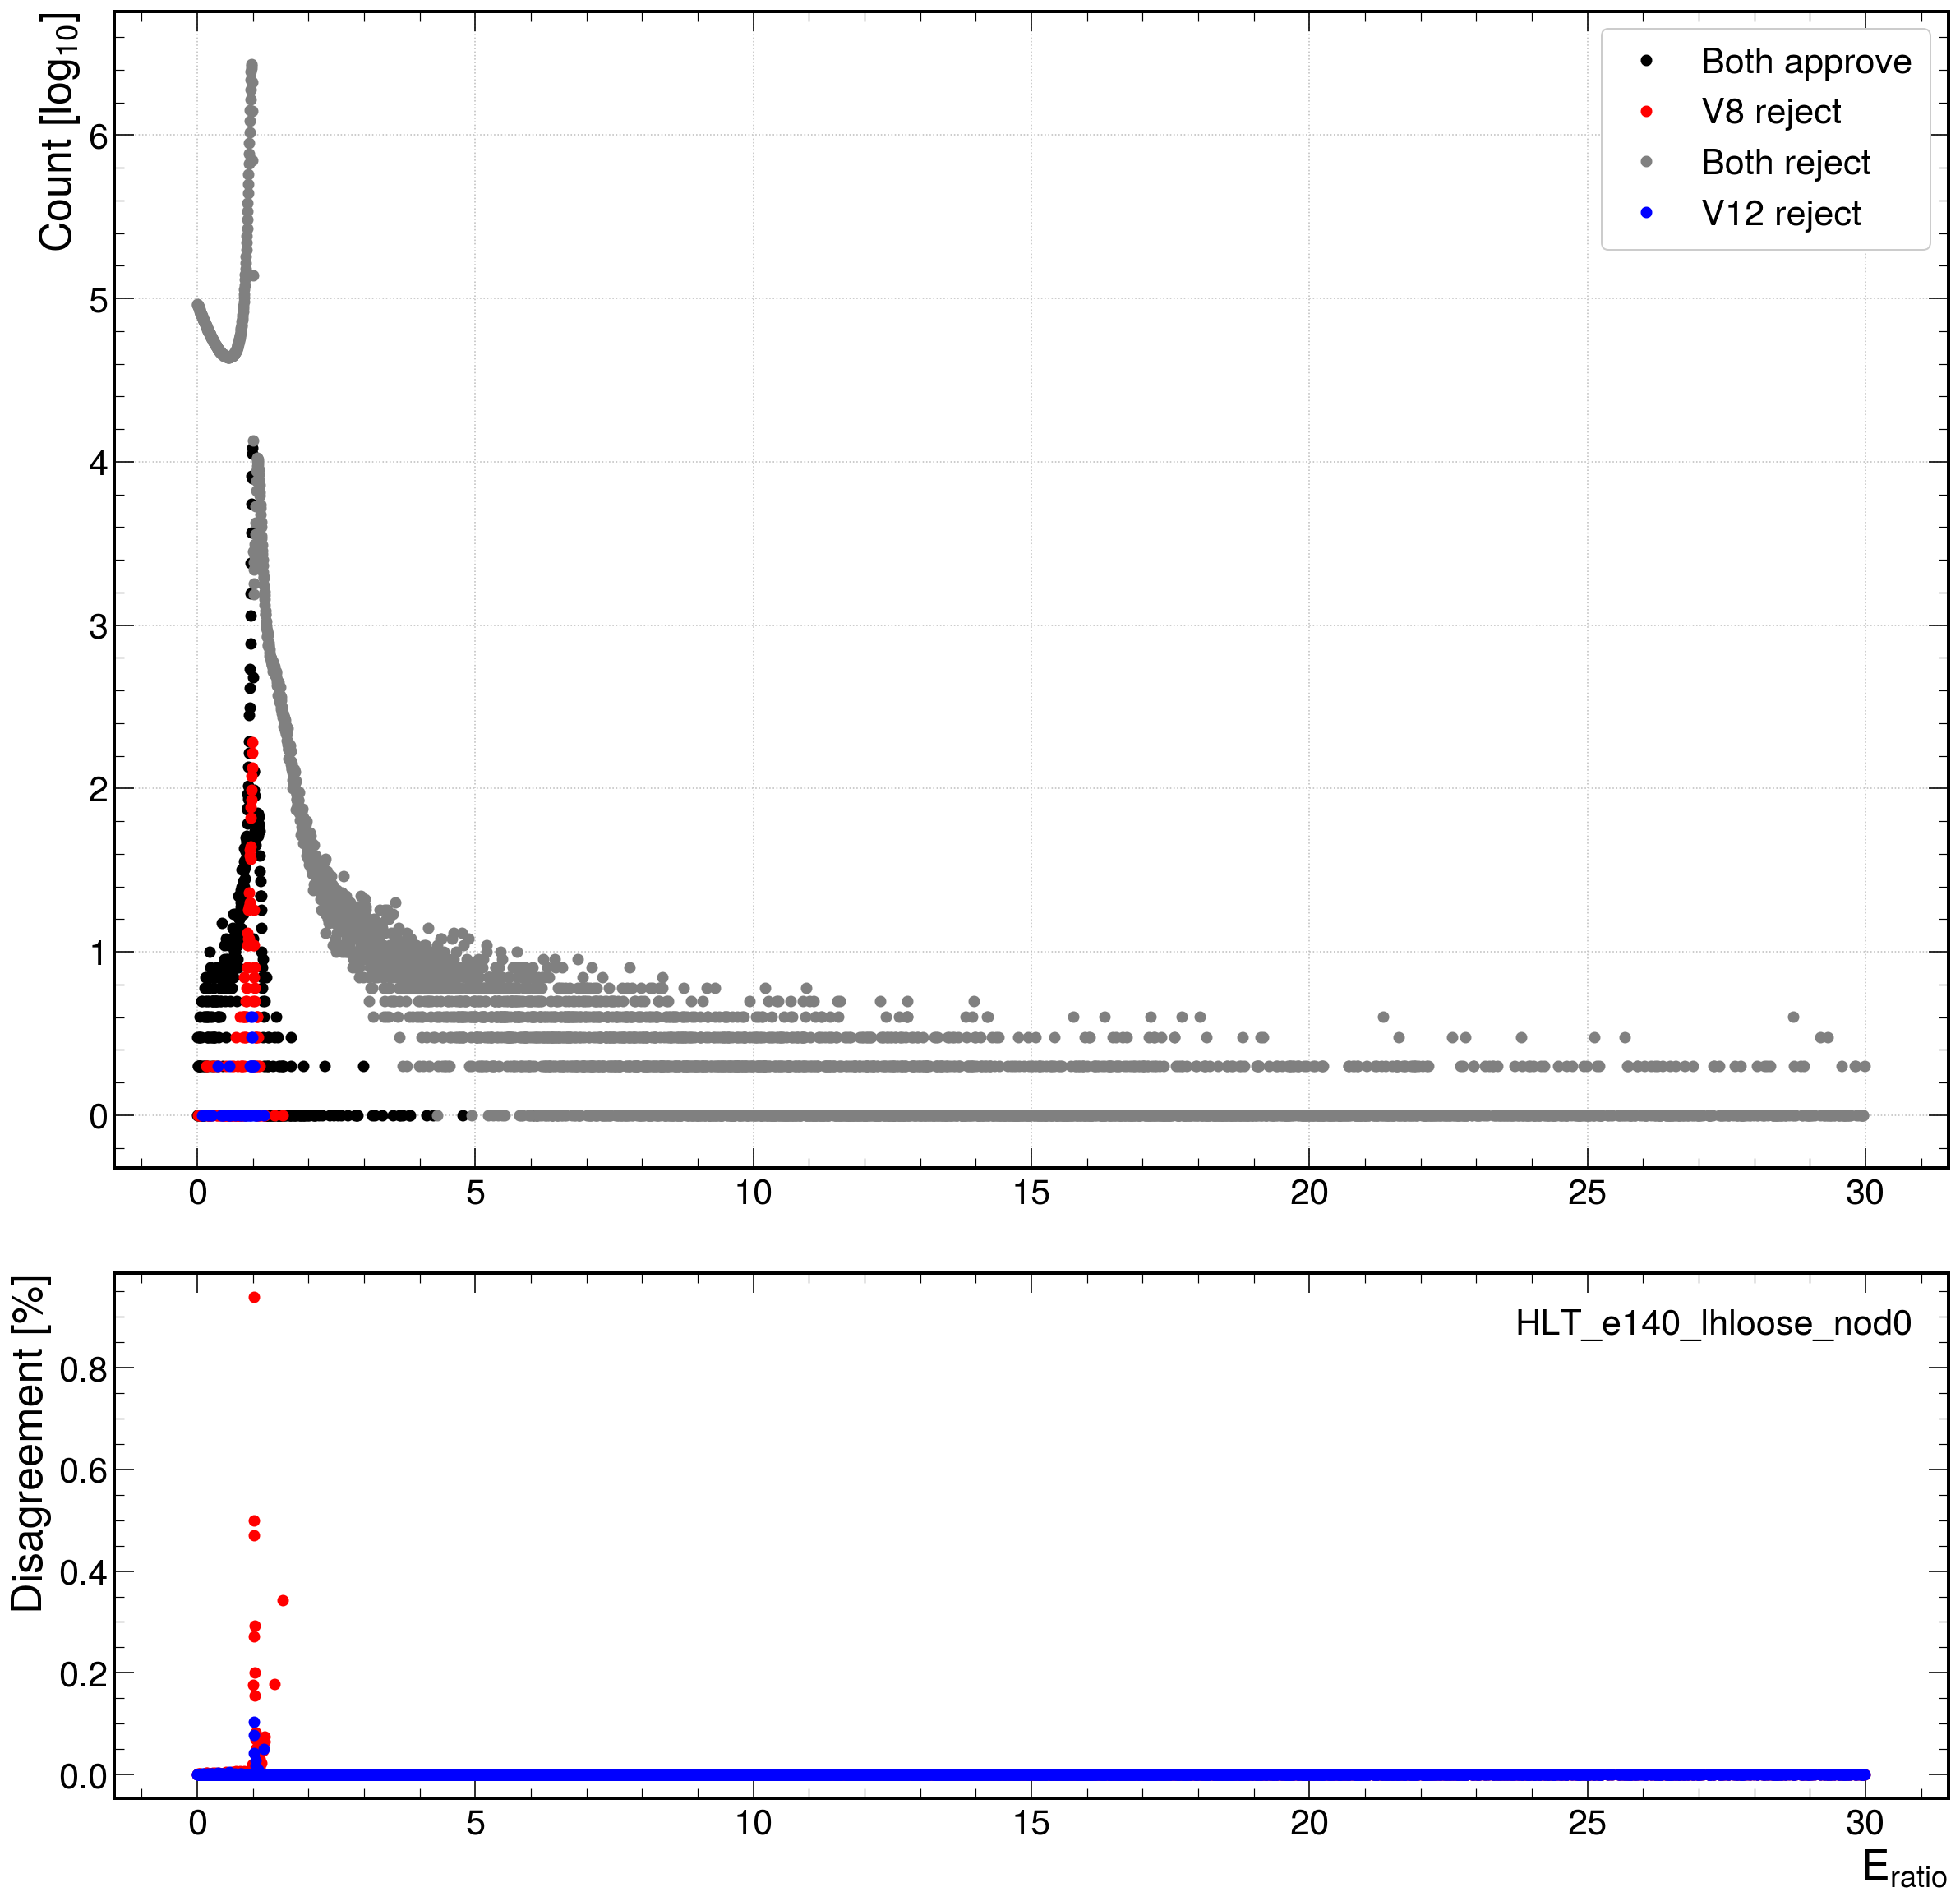

In [23]:
var = 'trig_L2_cl_eratio'

for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = int(np.sqrt(table.shape[0]))
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')]==1) & (table[chain.format(RINGER = 'ringer_v8_half')]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome]  = plt.hist(table.loc[table[var]<30][var], bins=bins)
        [count_first, bins, nome]  = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1) & (table[var]<30)][var], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1) & (table[var]<30)][var], bins=bins)
        [count_third, bins, nome]  = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1) & (table[var]<30)][var], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1) & (table[var]<30)][var], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label='V8 reject')
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label='V12 reject')
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[1], count_second[1]/count_total[1]*100, 'o', color = (0,0,0,0))
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = 'V8 reject')
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = 'V12 reject')
        ax1.legend(['%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2])], loc='best')
        ax1.set(ylabel='Disagreement [%]', xlabel='$E_{ratio}$')

        # save fig
        print('Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_eratio_v8xv12_%s_%s ...'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_eratio_v8xv12_%s_%s.png'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_eratio_v8xv12_%s_%s.pdf'%(chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $f_{1}$

Processing HLT_e24_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_f1_v8xv12_HLT_e24 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e26_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_f1_v8xv12_HLT_e26 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e60_lhmedium_nod0_{RINGER}_L1EM24VHI ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_f1_v8xv12_HLT_e60 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e140_lhloose_nod0_{RINGER} ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_f1_v8xv12_HLT_e140 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

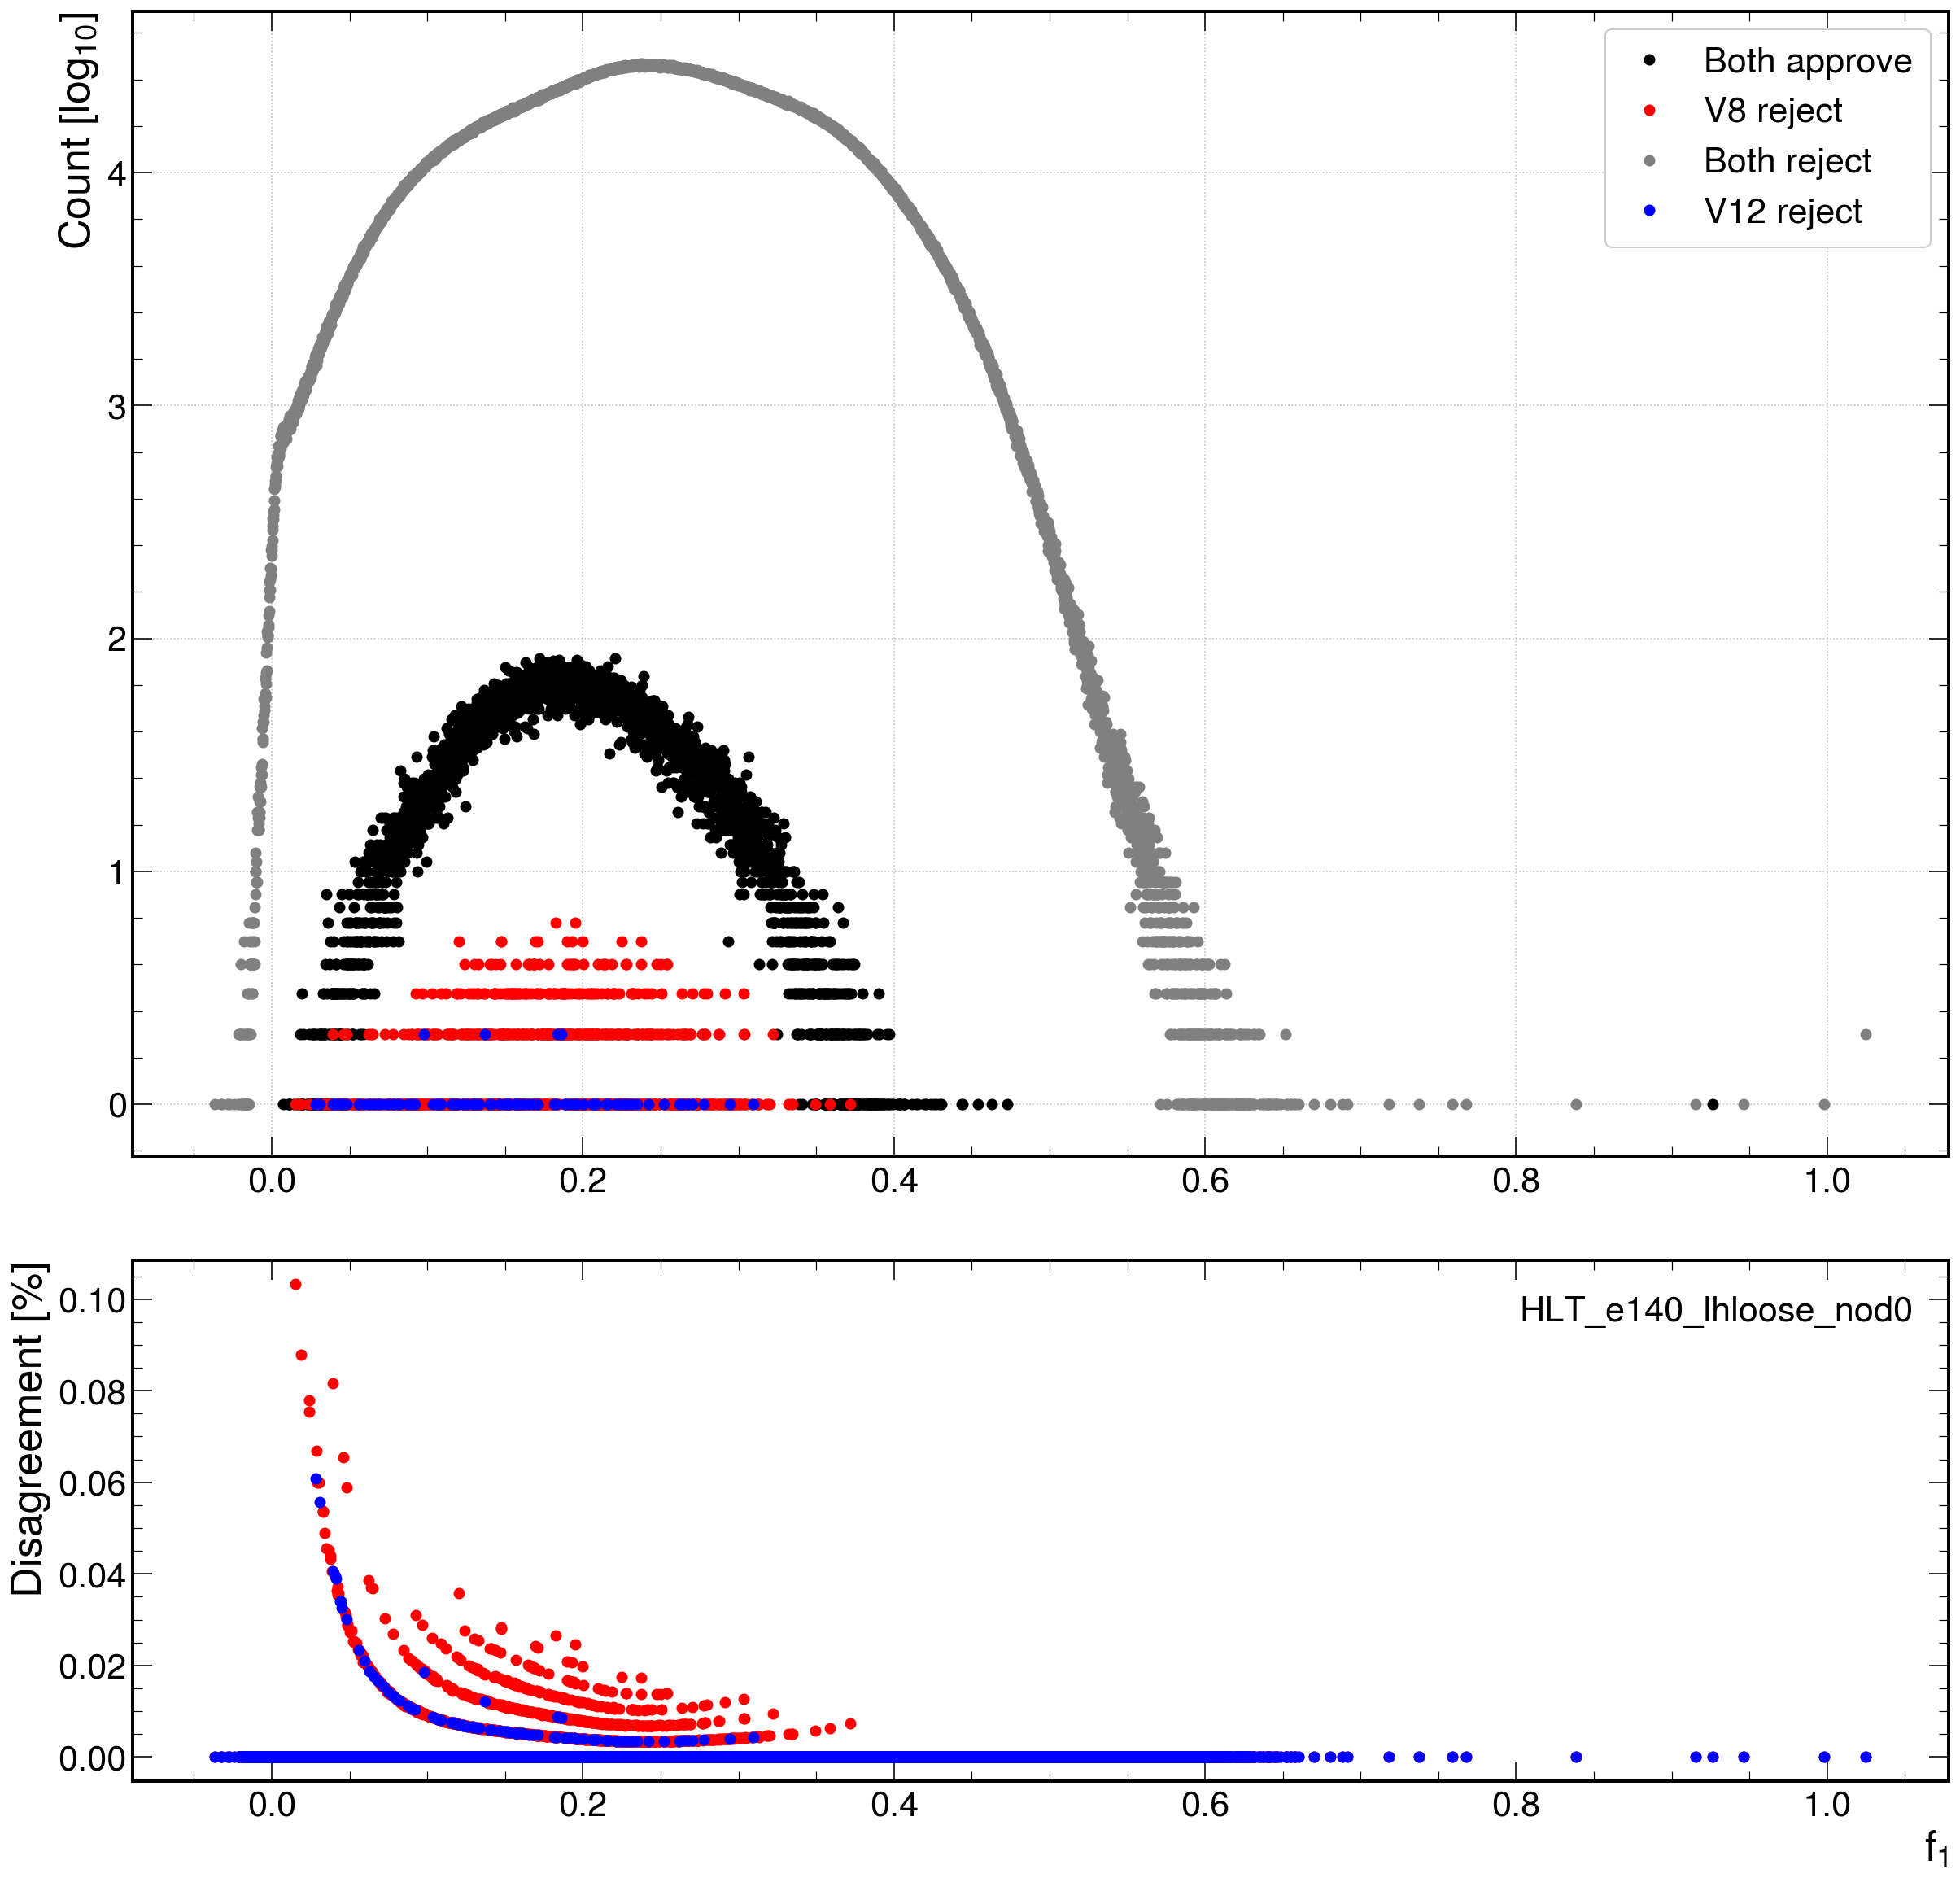

In [13]:
var = 'trig_L2_cl_f1'

for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = int(np.sqrt(table.shape[0]))
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')]==1) & (table[chain.format(RINGER = 'ringer_v8_half')]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome] = plt.hist(table[var], bins=bins)
        [count_first, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')]==1) & (table[chain.format(RINGER = 'ringer_v8_half')]==1)][var], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1)][var], bins=bins)
        [count_third, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)][var], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)][var], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label='V8 reject')
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label='V12 reject')
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[1], count_second[1]/count_total[1]*100, 'o', color = (0,0,0,0))
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = 'V8 reject')
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = 'V12 reject')
        ax1.legend(['%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2])], loc='best')
        ax1.set(ylabel='Disagreement [%]', xlabel='$f_{1}$')

        # save fig
        print('Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_f1_v8xv12_%s_%s ...'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_f1_v8xv12_%s_%s.png'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_f1_v8xv12_%s_%s.pdf'%(chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $f_{3}$

Processing HLT_e24_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_f3_v8xv12_HLT_e24 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e26_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_f3_v8xv12_HLT_e26 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e60_lhmedium_nod0_{RINGER}_L1EM24VHI ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_f3_v8xv12_HLT_e60 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e140_lhloose_nod0_{RINGER} ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_f3_v8xv12_HLT_e140 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

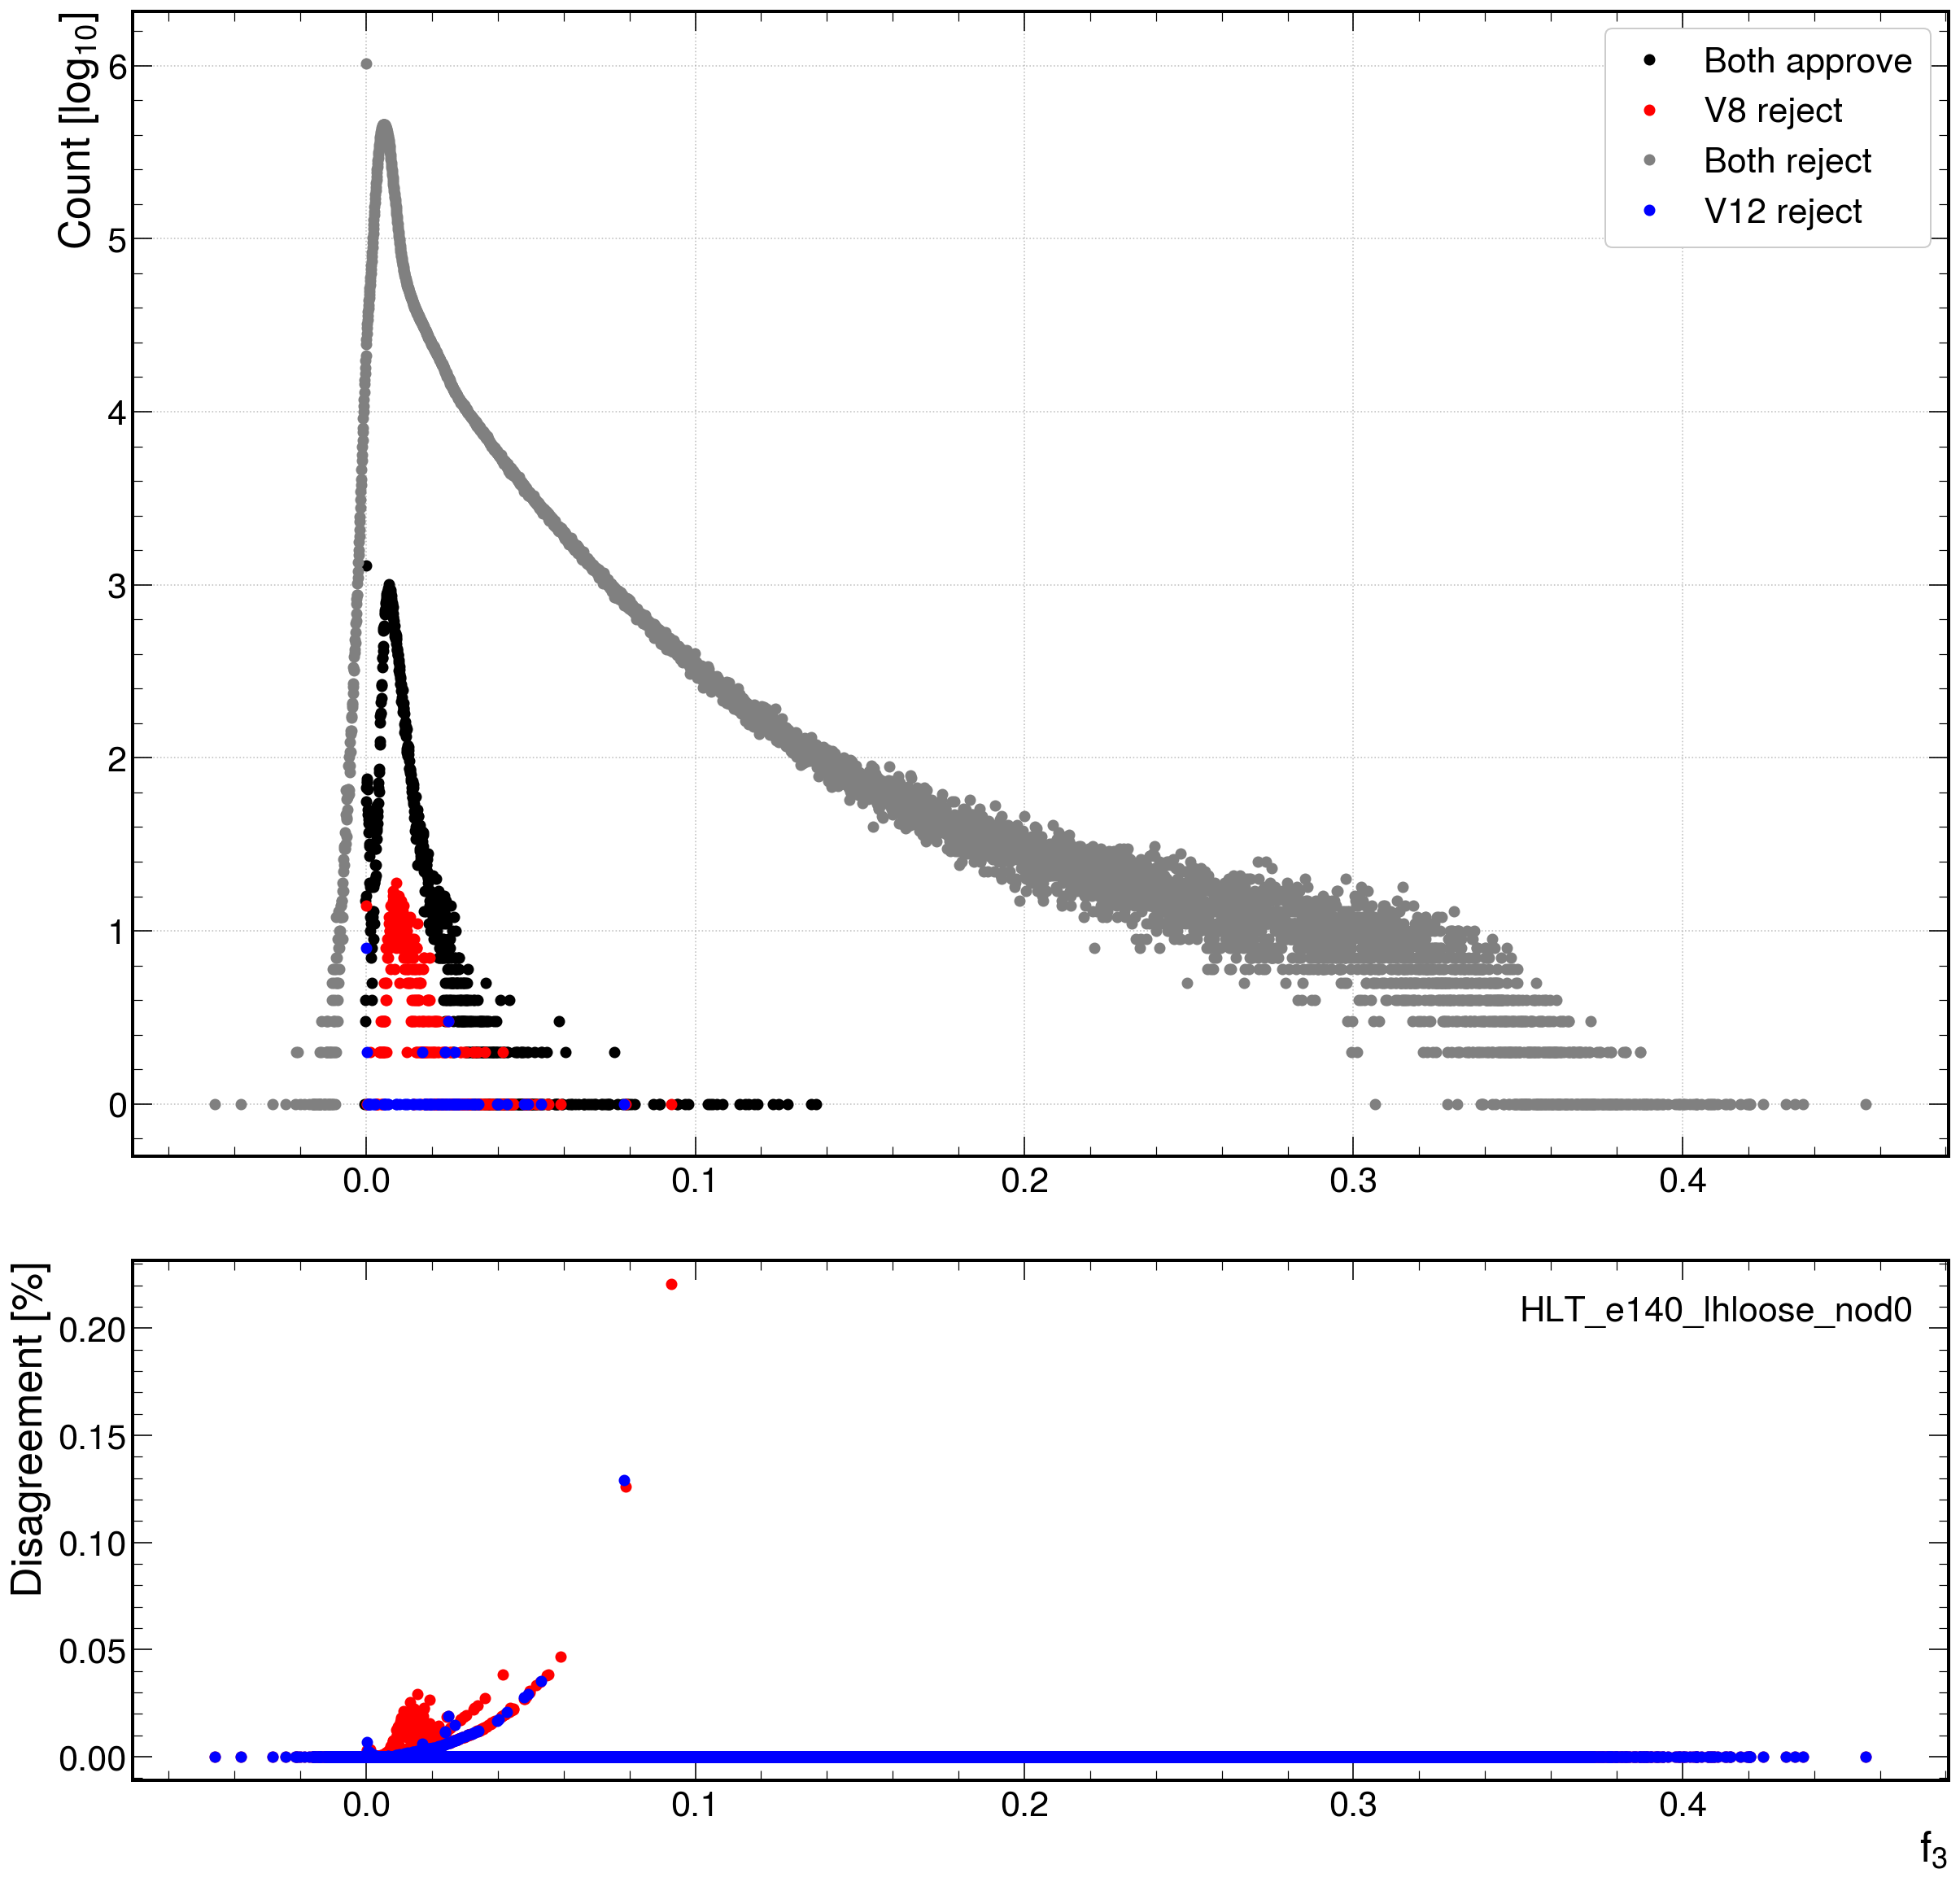

In [14]:
var = 'trig_L2_cl_f3'

for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = int(np.sqrt(table.shape[0]))
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')]==1) & (table[chain.format(RINGER = 'ringer_v8_half')]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome] = plt.hist(table[var], bins=bins)
        [count_first, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')]==1) & (table[chain.format(RINGER = 'ringer_v8_half')]==1)][var], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1)][var], bins=bins)
        [count_third, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)][var], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)][var], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label='V8 reject')
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label='V12 reject')
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[1], count_second[1]/count_total[1]*100, 'o', color = (0,0,0,0))
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = 'V8 reject')
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = 'V12 reject')
        ax1.legend(['%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2])], loc='best')
        ax1.set(ylabel='Disagreement [%]', xlabel='$f_{3}$')

        # save fig
        print('Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_f3_v8xv12_%s_%s ...'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_f3_v8xv12_%s_%s.png'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_f3_v8xv12_%s_%s.pdf'%(chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $w_{\eta}$

Processing HLT_e24_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_weta_v8xv12_HLT_e24 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e26_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_weta_v8xv12_HLT_e26 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e60_lhmedium_nod0_{RINGER}_L1EM24VHI ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_weta_v8xv12_HLT_e60 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e140_lhloose_nod0_{RINGER} ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_weta_v8xv12_HLT_e140 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

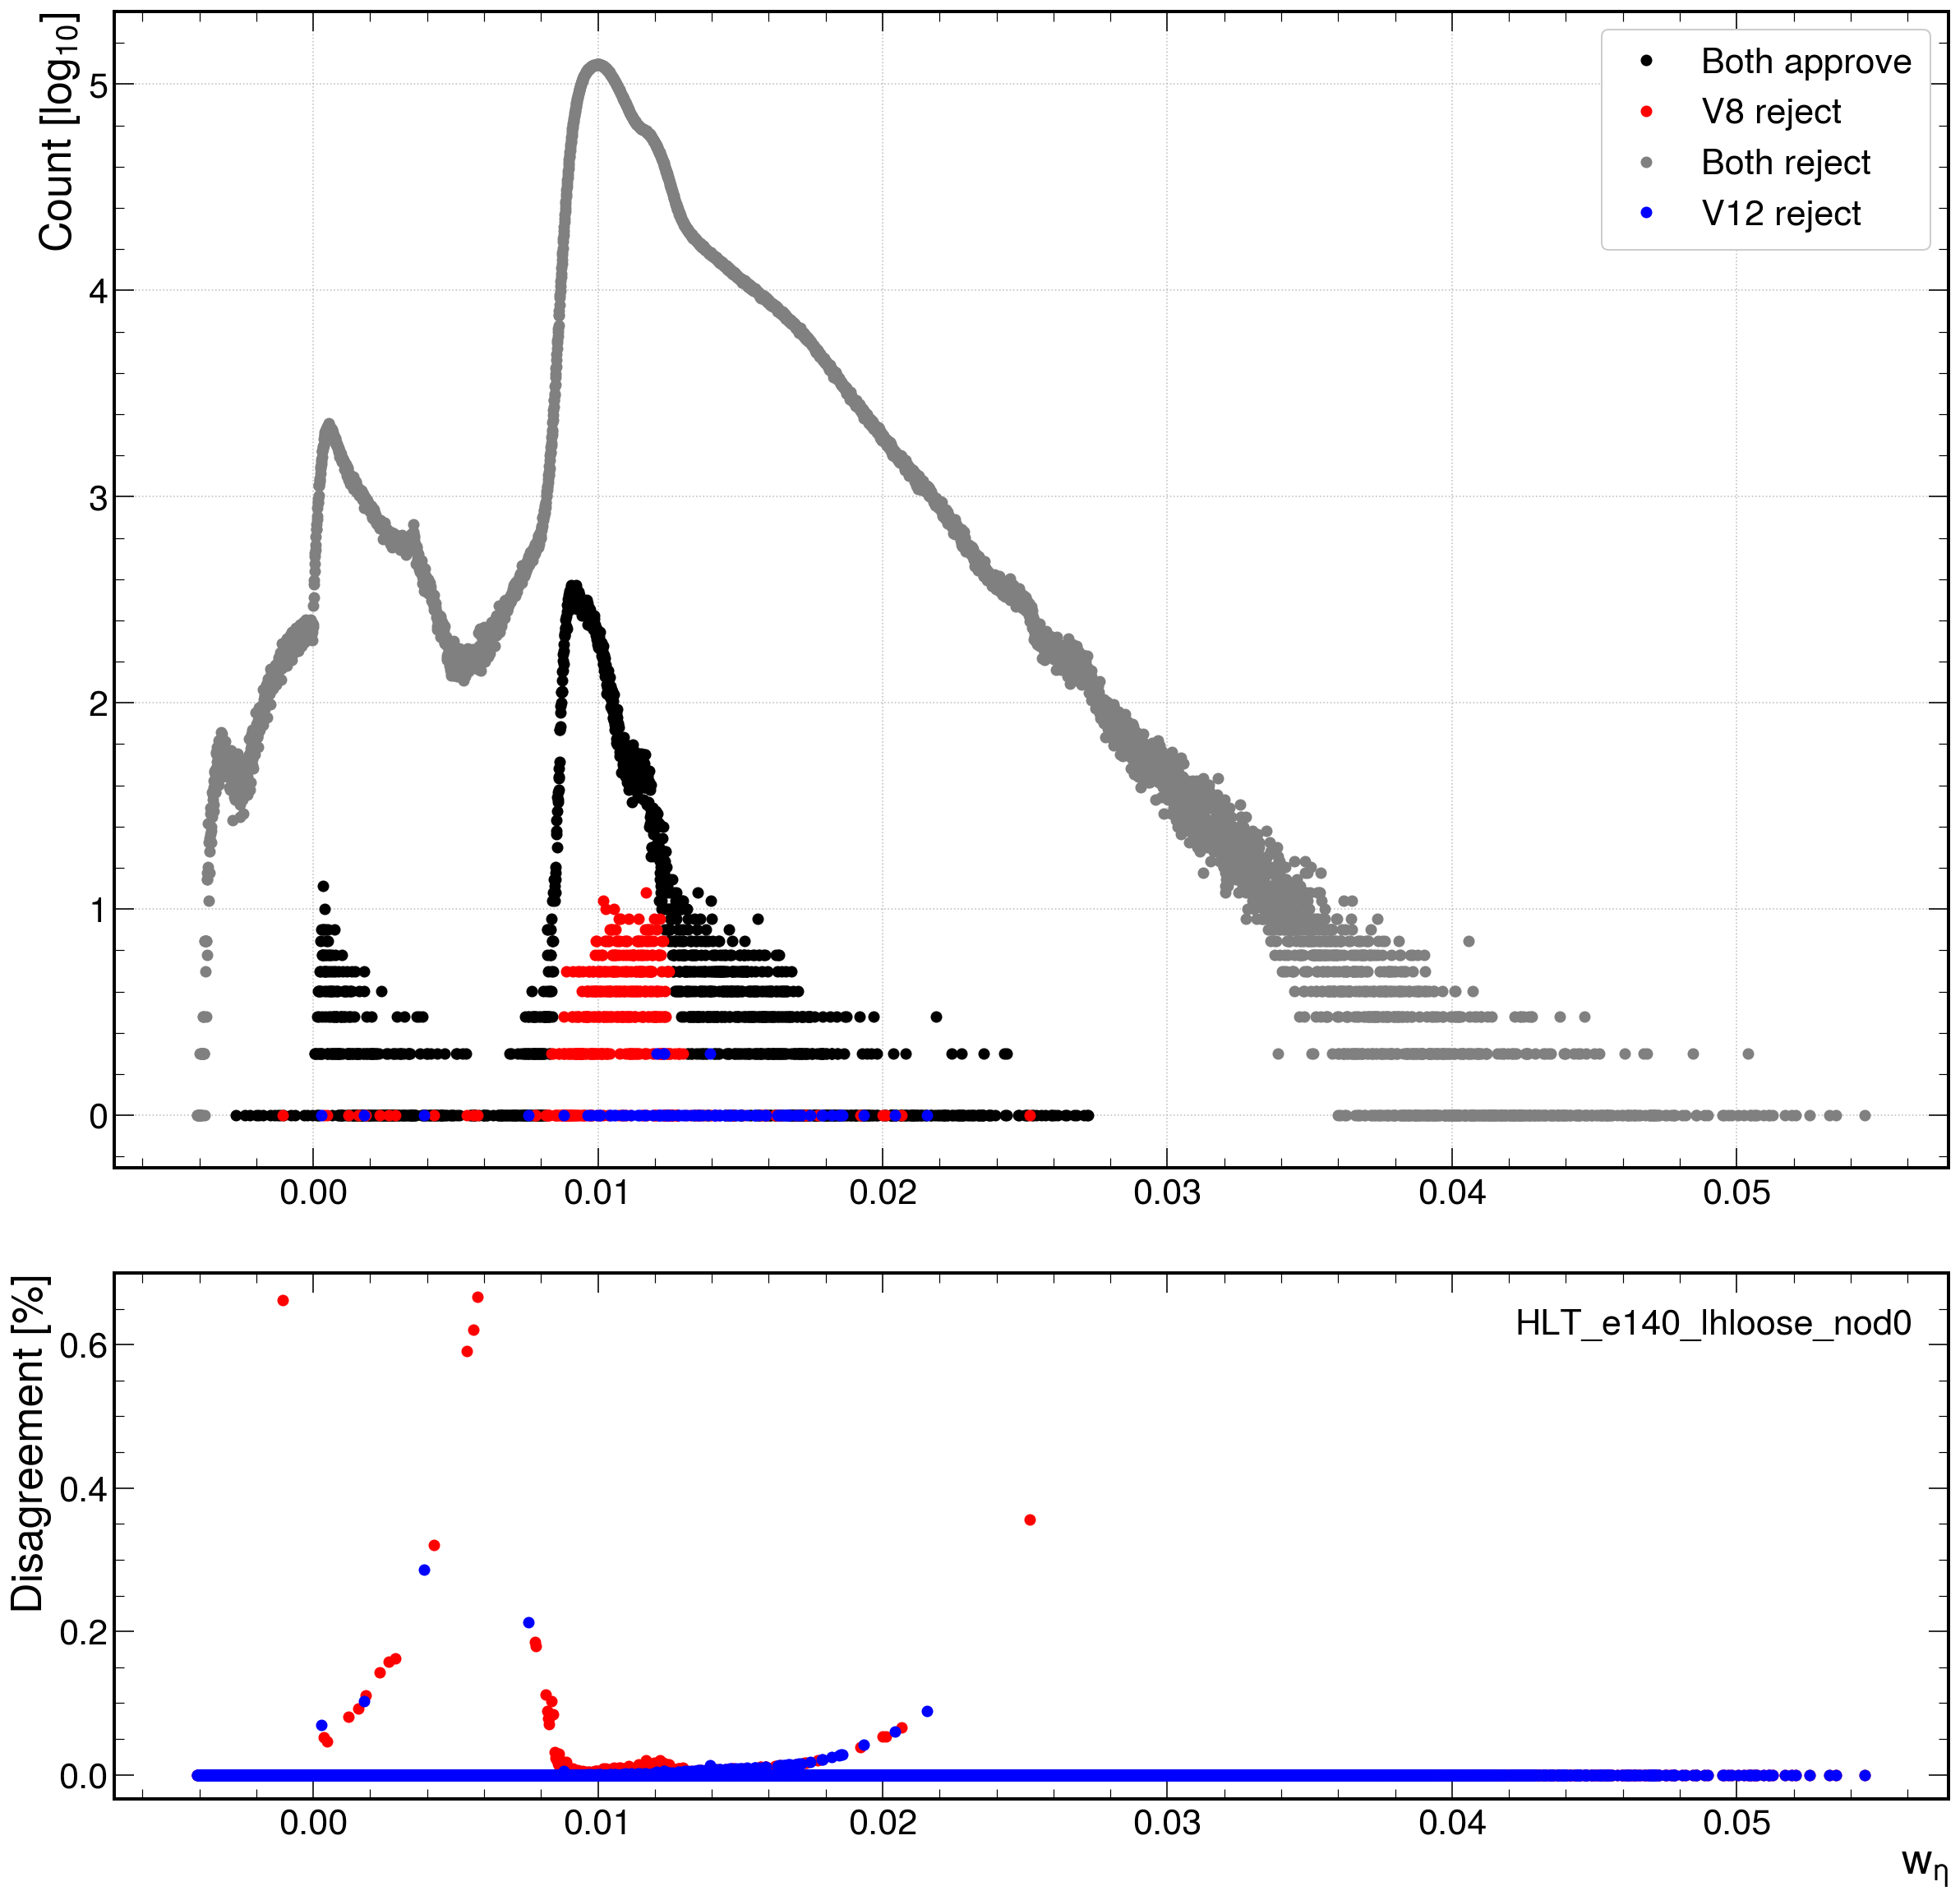

In [19]:
var = 'trig_L2_cl_weta2'

for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = int(np.sqrt(table.shape[0]))
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')]==1) & (table[chain.format(RINGER = 'ringer_v8_half')]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome] = plt.hist(table.loc[(table['trig_L2_cl_weta2']<10)][var], bins=bins)
        [count_first, bins, nome]  = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1) & (table[var]<10)][var], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1) & (table[var]<10)][var], bins=bins)
        [count_third, bins, nome]  = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1) & (table[var]<10)][var], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1) & (table[var]<10)][var], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label='V8 reject')
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label='V12 reject')
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[1], count_second[1]/count_total[1]*100, 'o', color = (0,0,0,0))
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = 'V8 reject')
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = 'V12 reject')
        ax1.legend(['%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2])], loc='best')
        ax1.set(ylabel='Disagreement [%]', xlabel='$w_{\eta}$')

        # save fig
        print('Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_weta_v8xv12_%s_%s ...'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_weta_v8xv12_%s_%s.png'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_weta_v8xv12_%s_%s.pdf'%(chain.split('_')[0], chain.split('_')[1]))
        fig.show()

### Quads for $w_{stot}$

Processing HLT_e24_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_wstot_v8xv12_HLT_e24 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e26_lhtight_nod0_{RINGER}_ivarloose ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_wstot_v8xv12_HLT_e26 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e60_lhmedium_nod0_{RINGER}_L1EM24VHI ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_wstot_v8xv12_HLT_e60 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


Processing HLT_e140_lhloose_nod0_{RINGER} ...
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_wstot_v8xv12_HLT_e140 ...


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


<Figure size 720x720 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

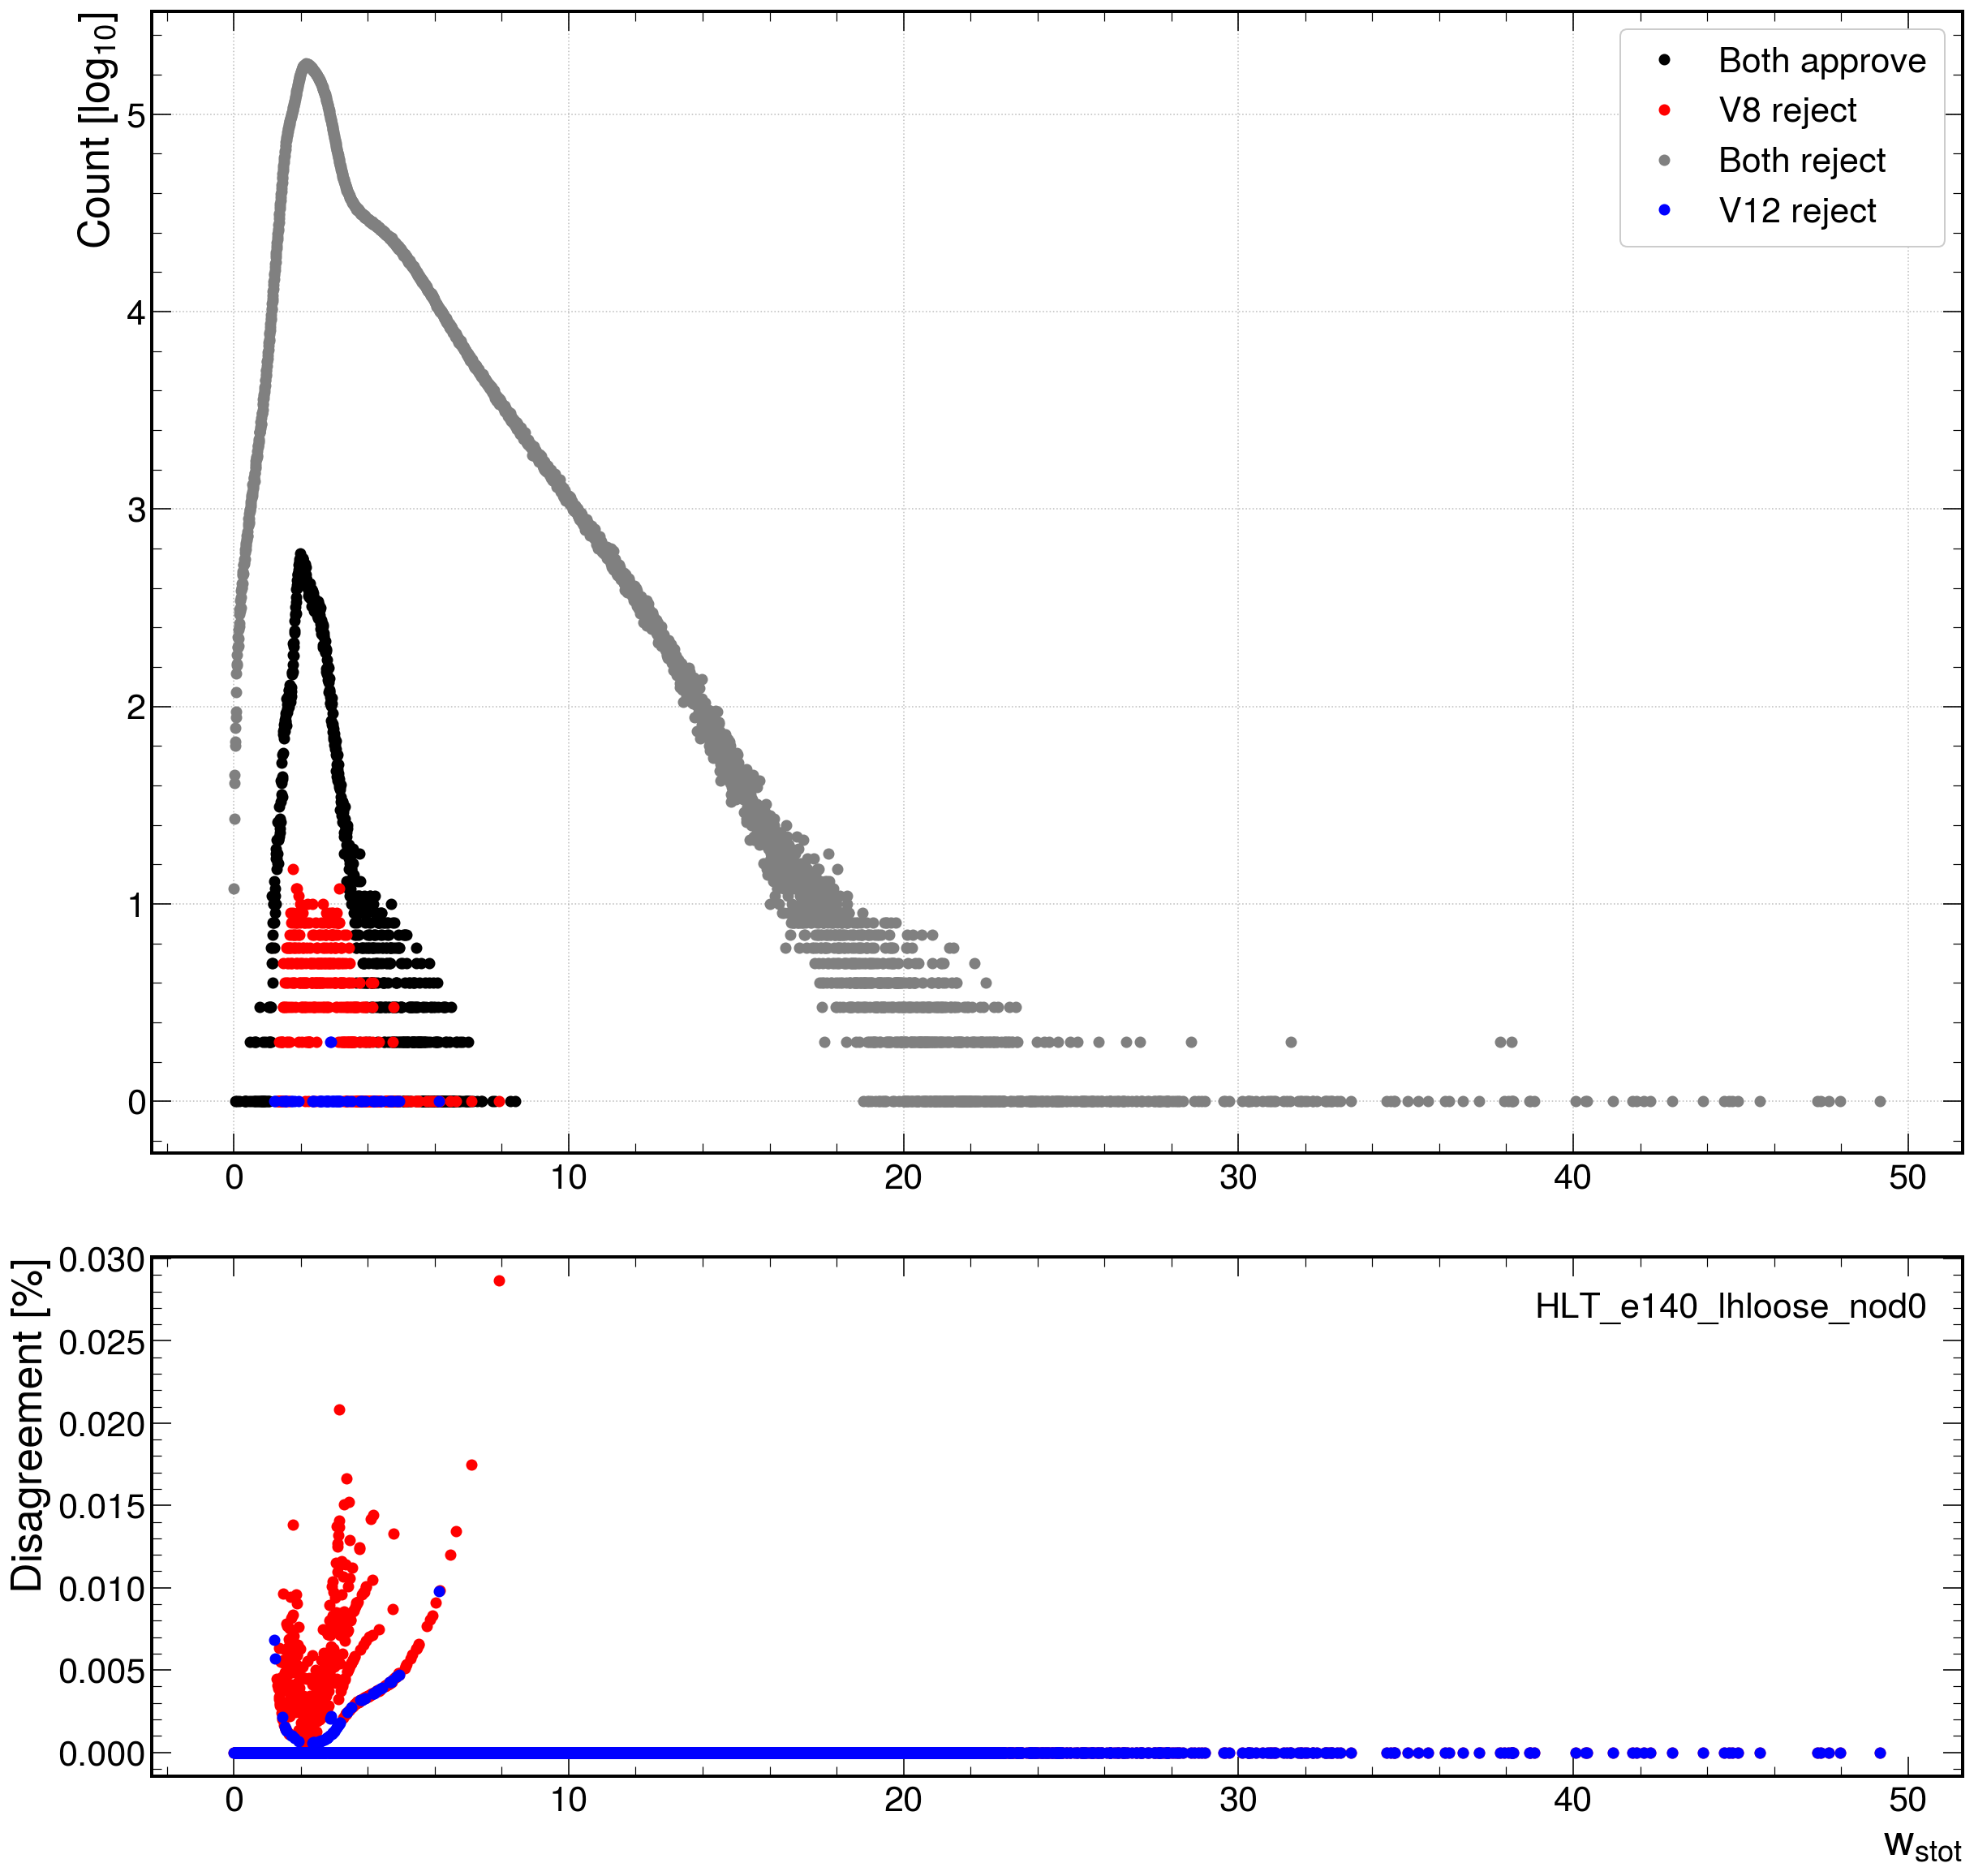

In [22]:
var = 'trig_L2_cl_wstot'

for step in [['L2Calo', 'L2', 'EFCalo', 'HLT'][3]]:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    bins = int(np.sqrt(table.shape[0]))
    
    for chain in chain_list:
        chain = step + '_' + chain
        print('Processing %s ...' %(chain))
        
        # create quadrant tables
        #first_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')]==1) & (table[chain.format(RINGER = 'ringer_v8_half')]==1)]['el_eta']
        #second_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1)]['el_eta']
        #third_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        #fourth_quad = table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1)]['el_eta']
        
        # calculate counts for each quad
        ## constructing the tables here helps in saving memory
        [count_total, bins, nome]  = plt.hist(table.loc[(table[var]!= -9999.0) & (table[var]<50)][var], bins=bins)
        [count_first, bins, nome]  = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1) & (table[var]!=-9999.0) & (table[var]<50)][var], bins=bins)
        [count_second, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] ==1) & (table[var]!=-9999.0) & (table[var]<50)][var], bins=bins)
        [count_third, bins, nome]  = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] !=1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1) & (table[var]!=-9999.0) & (table[var]<50)][var], bins=bins)
        [count_fourth, bins, nome] = plt.hist(table.loc[(table[chain.format(RINGER = 'ringer_v8_new')] ==1) & (table[chain.format(RINGER = 'ringer_v8_half')] !=1) & (table[var]!=-9999.0) & (table[var]<50)][var], bins=bins)
        plt.clf()

        # create fig
        fig = plt.figure(figsize = (20,20), constrained_layout=False)
        gs = fig.add_gridspec(nrows=3, ncols=1)
        ax0 = fig.add_subplot(gs[:-1])
        ax1 = fig.add_subplot(gs[-1])
        
        # plot each quad
        ax0.plot(bins[:-1], np.log10(count_first), 'o', color = 'black', label='Both approve')
        ax0.plot(bins[:-1], np.log10(count_second), 'o', color = 'red', label='V8 reject')
        ax0.plot(bins[:-1], np.log10(count_third), 'o', color = 'grey', label='Both reject')
        ax0.plot(bins[:-1], np.log10(count_fourth), 'o', color = 'blue', label='V12 reject')
        ax0.set(ylabel='Count [$log_{10}$]')
        ax0.legend(frameon=True, framealpha=True)
        ax0.grid()
        
        # plot disagreement
        ax1.plot(bins[1], count_second[1]/count_total[1]*100, 'o', color = (0,0,0,0))
        ax1.plot(bins[:-1], count_second/count_total*100, 'o', color = 'red', label = 'V8 reject')
        ax1.plot(bins[:-1], count_fourth/count_total*100, 'o', color = 'blue', label = 'V12 reject')
        ax1.legend(['%s_%s_%s_nod0' %(step, chain.split('_')[1], chain.split('_')[2])], loc='best')
        ax1.set(ylabel='Disagreement [%]', xlabel='$w_{stot}$')

        # save fig
        print('Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_wstot_v8xv12_%s_%s ...'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_wstot_v8xv12_%s_%s.png'%(chain.split('_')[0], chain.split('_')[1]))
        fig.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/quad_wstot_v8xv12_%s_%s.pdf'%(chain.split('_')[0], chain.split('_')[1]))
        fig.show()

# Running for Boosted

## Load Data

In [6]:
# codigo modificado
boosted_dpath = '/home/pedro.lima/data/mc16_13TeV.302236_309995_341330.sgn.boosted_probes.WZ_llqq_plus_radion_ZZ_llqq_plus_ggH3000.merge.25bins.v2'
boosted_dpath+= '/mc16_13TeV.302236_309995_341330.sgn.boosted_probes.WZ_llqq_plus_radion_ZZ_llqq_plus_ggH3000.merge.25bins.v2_et{ET}_eta{ETA}.npz'
boosted_paths = []
#for et in [4]:
#    for eta in [0]:
#        boosted_paths.append( boosted_dpath.format(ET=et,ETA=eta) )
for et in range(5):
    for eta in range(5):
        boosted_paths.append( boosted_dpath.format(ET=et,ETA=eta) )

In [7]:
drop_columns = [
                    'RunNumber', 
                    #'avgmu',
                    #'trig_L2_cl_et',
                    #'trig_L2_cl_eta',
                    #'trig_L2_cl_phi',
                    #'trig_L2_cl_reta',
                    #'trig_L2_cl_ehad1', 
                    #'trig_L2_cl_eratio',
                    #'trig_L2_cl_f1', 
                    #'trig_L2_cl_f3', 
                    #'trig_L2_cl_weta2', 
                    #'trig_L2_cl_wstot', 
                    'trig_L2_cl_e2tsts1',
                    'trig_L2_el_hastrack',
                    #'trig_L2_el_pt',
                    'trig_L2_el_eta',
                    'trig_L2_el_phi',
                    'trig_L2_el_caloEta',
                    'trig_L2_el_trkClusDeta',
                    'trig_L2_el_trkClusDphi',
                    'trig_L2_el_etOverPt',
                    'trig_EF_cl_hascluster',
                    #'trig_EF_cl_et',
                    'trig_EF_cl_eta',
                    'trig_EF_cl_etaBE2',
                    'trig_EF_cl_phi',     
                    'trig_EF_el_hascand',
                    #'trig_EF_el_et',
                    'trig_EF_el_eta',
                    'trig_EF_el_etaBE2',
                    'trig_EF_el_phi',
                    'trig_EF_el_rhad1',
                    'trig_EF_el_rhad',
                    'trig_EF_el_f3',
                    'trig_EF_el_weta2',
                    'trig_EF_el_rphi',
                    'trig_EF_el_reta',
                    'trig_EF_el_wtots1',
                    'trig_EF_el_eratio',
                    'trig_EF_el_f1',
                    'trig_EF_el_hastrack',
                    'trig_EF_el_deltaEta1',
                    'trig_EF_el_deltaPhi2',
                    'trig_EF_el_deltaPhi2Rescaled',
                    #'trig_EF_el_lhtight',
                    #'trig_EF_el_lhmedium',
                    #'trig_EF_el_lhloose',
                    #'trig_EF_el_lhvloose', 
                    # Offline variables
                    #'el_et',
                    #'el_eta',
                    'el_etaBE2',
                    #'el_phi',
                    # offline shower shapers
                    #'el_rhad1',
                    #'el_rhad',
                    #'el_f3',
                    #'el_weta2',
                    #'el_rphi',
                    #'el_reta',
                    #'el_wtots1',
                    #'el_eratio',
                    #'el_f1',
                    # offline track
                    #'el_hastrack',
                    'el_numberOfBLayerHits',
                    'el_numberOfPixelHits',
                    'el_numberOfTRTHits',
                    #'el_d0',
                    #'el_d0significance',
                    #'el_eProbabilityHT',
                    'el_trans_TRT_PID',
                    #'el_deltaEta1',
                    'el_deltaPhi2',
                    #'el_deltaPhi2Rescaled',
                    #'el_deltaPOverP',
                    #'el_lhtight',
                    #'el_lhmedium',
                    #'el_lhloose',
                    #'el_lhvloose',
                    'el_TaP_Mass',
                    #'el_TaP_deltaR',
                ]

#drop_columns.extend( ['trig_L2_cl_ring_%d'%i for i in range(100)] )

In [8]:
os.environ['RINGER_TUNING_PATH']='/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings'

decorators = create_ringer_v8_new_decorators()
decorators += create_ringer_v8_half_fast_decorators()
#decorators+= create_ringer_v9_decorators()
decorators += create_ringer_v8_34_decorators()

2022-06-08 19:54:45,273 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerTightTriggerConfig.conf
2022-06-08 19:54:47,068 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerMediumTriggerConfig.conf
2022-06-08 19:54:47,702 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerLooseTriggerConfig.conf
2022-06-08 19:54:48,241 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20180125_v8/ElectronRingerVeryLooseTriggerConfig.conf
2022-06-08 19:54:48,961 | Py.RingerDecorator                      INFO Reading... /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/tunings/TrigL2_20210907_v8-1/ElectronRin

2022-06-08 19:54:45.496816: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-06-08 19:54:45.498753: E tensorflow/stream_executor/cuda/cuda_driver.cc:314] failed call to cuInit: UNKNOWN ERROR (-1)
2022-06-08 19:54:45.498809: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (caloba53): /proc/driver/nvidia/version does not exist
2022-06-08 19:54:45.500946: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-08 19:54:45.707943: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2400000000 Hz
2022-06-08 19:54:45.735546: I tensorflow/compiler/xla/service/service.c

## Setup Chains

In [9]:
# create my chain
chains = [
            Chain( "HLT_e24_lhtight_nod0_noringer_ivarloose" , L1Seed = 'L1_EM22VHI'),
            Chain( "HLT_e24_lhtight_nod0_ringer_v8_new_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_new_tight' ),
            Chain( "HLT_e24_lhtight_nod0_ringer_v8_half_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_half_tight' ),
            Chain( "HLT_e24_lhtight_nod0_ringer_v8_34_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_34_tight' ),

            Chain( "HLT_e26_lhtight_nod0_noringer_ivarloose" , L1Seed = 'L1_EM22VHI'),
            Chain( "HLT_e26_lhtight_nod0_ringer_v8_new_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_new_tight' ),
            Chain( "HLT_e26_lhtight_nod0_ringer_v8_half_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_half_tight' ),
            Chain( "HLT_e26_lhtight_nod0_ringer_v8_34_ivarloose", L1Seed = 'L1_EM22VHI' , l2calo_column = 'ringer_v8_34_tight' ),


            Chain( "HLT_e60_lhmedium_nod0_noringer_L1EM24VHI" , L1Seed = 'L1_EM24VHI'),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v8_new_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v8_new_medium'),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v8_half_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v8_half_medium'),
            Chain( "HLT_e60_lhmedium_nod0_ringer_v8_34_L1EM24VHI", L1Seed = 'L1_EM24VHI' , l2calo_column = 'ringer_v8_34_medium'),

          
            Chain( "HLT_e140_lhloose_nod0_noringer"  , L1Seed = 'L1_EM24VHI'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v8_new" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v8_new_loose'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v8_half" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v8_half_loose'),
            Chain( "HLT_e140_lhloose_nod0_ringer_v8_34" , L1Seed = 'L1_EM24VHI', l2calo_column = 'ringer_v8_34_loose'),

]

OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'trig_L2_cl_lhtight_et22toInf')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'ringer_v8_new_tight')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'ringer_v8_half_tight')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
OrderedDict([('L1Seed', 'L1_EM22VHI'),
             ('L2Calo', (21000.0, 'ringer_v8_34_tight')),
             ('L2', 'trig_L2_el_cut_pt20to50'),
             ('EFCalo', 24000.0),
             ('HLT', (24000.0, 'trig_EF_el_lhtight_ivarloose'))])
Ordered

## Read all bins

In [10]:
boosted_table = load_in_loop( boosted_paths, drop_columns=drop_columns, decorators=decorators, chains=chains )

Reading files...:   0%|          | 0/25 [00:00<?, ?it/s]

Reading files...:   4%|▍         | 1/25 [00:01<00:36,  1.52s/it]

Reading files...:   8%|▊         | 2/25 [00:02<00:28,  1.23s/it]

Reading files...:  12%|█▏        | 3/25 [00:03<00:24,  1.11s/it]

Reading files...:  16%|█▌        | 4/25 [00:04<00:22,  1.08s/it]

Reading files...:  20%|██        | 5/25 [00:05<00:20,  1.03s/it]

Reading files...:  24%|██▍       | 6/25 [00:06<00:19,  1.03s/it]

Reading files...:  28%|██▊       | 7/25 [00:07<00:18,  1.00s/it]

Reading files...:  32%|███▏      | 8/25 [00:08<00:16,  1.00it/s]

Reading files...:  36%|███▌      | 9/25 [00:09<00:16,  1.01s/it]

Reading files...:  40%|████      | 10/25 [00:10<00:14,  1.00it/s]

Reading files...:  44%|████▍     | 11/25 [00:11<00:14,  1.00s/it]

Reading files...:  48%|████▊     | 12/25 [00:12<00:13,  1.03s/it]

Reading files...:  52%|█████▏    | 13/25 [00:13<00:12,  1.04s/it]

Reading files...:  56%|█████▌    | 14/25 [00:14<00:11,  1.03s/it]

Reading files...:  60%|██████    | 15/25 [00:15<00:10,  1.02s/it]

Reading files...:  64%|██████▍   | 16/25 [00:16<00:09,  1.03s/it]

Reading files...:  68%|██████▊   | 17/25 [00:17<00:08,  1.02s/it]

Reading files...:  72%|███████▏  | 18/25 [00:18<00:07,  1.02s/it]

Reading files...:  76%|███████▌  | 19/25 [00:19<00:06,  1.02s/it]

Reading files...:  80%|████████  | 20/25 [00:20<00:05,  1.02s/it]

Reading files...:  96%|█████████▌| 24/25 [00:32<00:02,  2.11s/it]

Reading files...: 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]


In [11]:
if True:
    print(boosted_table.columns.to_list())

['avgmu', 'trig_L2_cl_et', 'trig_L2_cl_eta', 'trig_L2_cl_phi', 'trig_L2_cl_reta', 'trig_L2_cl_ehad1', 'trig_L2_cl_eratio', 'trig_L2_cl_f1', 'trig_L2_cl_f3', 'trig_L2_cl_weta2', 'trig_L2_cl_wstot', 'trig_L2_cl_ring_0', 'trig_L2_cl_ring_1', 'trig_L2_cl_ring_2', 'trig_L2_cl_ring_3', 'trig_L2_cl_ring_4', 'trig_L2_cl_ring_5', 'trig_L2_cl_ring_6', 'trig_L2_cl_ring_7', 'trig_L2_cl_ring_8', 'trig_L2_cl_ring_9', 'trig_L2_cl_ring_10', 'trig_L2_cl_ring_11', 'trig_L2_cl_ring_12', 'trig_L2_cl_ring_13', 'trig_L2_cl_ring_14', 'trig_L2_cl_ring_15', 'trig_L2_cl_ring_16', 'trig_L2_cl_ring_17', 'trig_L2_cl_ring_18', 'trig_L2_cl_ring_19', 'trig_L2_cl_ring_20', 'trig_L2_cl_ring_21', 'trig_L2_cl_ring_22', 'trig_L2_cl_ring_23', 'trig_L2_cl_ring_24', 'trig_L2_cl_ring_25', 'trig_L2_cl_ring_26', 'trig_L2_cl_ring_27', 'trig_L2_cl_ring_28', 'trig_L2_cl_ring_29', 'trig_L2_cl_ring_30', 'trig_L2_cl_ring_31', 'trig_L2_cl_ring_32', 'trig_L2_cl_ring_33', 'trig_L2_cl_ring_34', 'trig_L2_cl_ring_35', 'trig_L2_cl_ring_36',

## Analysis

### Neural Network Output Analysis

In [ ]:
if real_run:
    #Plot a comparision between RingerV8 and RingerV8.1/2 for all events in all et & eta (no selection)
    figsize = (13,12)
    nrows = 1
    ncols = 1
    fig = plt.figure(figsize=figsize)

    # create grid for different subplots
    spec = gridspec.GridSpec(ncols=ncols, nrows=nrows,
                             width_ratios=[1],
                             height_ratios=[1],
                             wspace=0.0, hspace=0.1,)

    # ax0 will take 0th position in
    # geometry(Grid we created for subplots),
    # as we defined the position as "spec[0]"
    ax  = fig.add_subplot(spec[0])

    bins = np.linspace(-20,10,100)
    boosted_table['ringer_v8_new_tight_output'].hist(bins=bins, color='red', label='V8', alpha=0.5, ax=ax)
    boosted_table['ringer_v8_half_tight_output'].hist(bins=bins, color='blue', label='V8.1/2', alpha=0.5, ax=ax)
    boosted_table['ringer_v8_34_tight_output'].hist(bins=bins, color='green', label='V8.3/4', alpha=0.5, ax=ax)
    ax.legend(loc='best')
    ax.set_title('Neural Network Output Comparison')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count');
    plt.show(fig)
    fig.savefig('kepler_imgs/boosted_nn_output_tight.pdf',
                bbox_inches='tight',facecolor='white')
    fig.savefig('kepler_imgs/boosted_nn_output_tight.png',
                bbox_inches='tight',facecolor='white', dpi=150)

In [ ]:
if real_run:
    et_bins = [4.,7.,10.,15.,20.,25.,30.,35.,40.,45.,50.,60.,80.,150.,300.] # et_bins
    chain_list = ['e24_lhtight_nod0_noringer_ivarloose',
                  'e26_lhtight_nod0_noringer_ivarloose',
                  'e60_lhmedium_nod0_noringer_L1EM24VHI',
                  'e140_lhloose_nod0_noringer'
                 ]
    point_list = ['L1Calo', 'L2Calo', 'L2', 'EFCalo', 'HLT']

    variable_list = ['el_et', 'el_eta', 'el_phi', 'avgmu']

    for ivariable, variable in enumerate(variable_list):
        if variable == 'el_et':
            bins = et_bins
        elif variable == 'el_eta':
            bins = [0,0.6,0.8,1.15,1.37,1.52,1.81,2.01,2.37,2.47] # eta_bins
        elif variable == 'el_phi':
            bins = np.linspace(boosted_table['el_phi'].min(), boosted_table['el_phi'].max(),20)
        elif variable == 'avgmu':
            bins = [10, 20, 30, 40, 50, 60, 70] #avgmu
        else:
            bins = np.linspace(boosted_table[variable].min(), boosted_table[variable].max(),20) # for other possibilities

        for ichain, chain in enumerate(chain_list):
            trigger_list = [s +'_%s'%(chain) for s in point_list]
            cmap = plt.cm.get_cmap('jet')
            colors = cmap(np.linspace(0,1,len(trigger_list)))

            #create a figure
            figsize = (13,12)
            nrows = 2
            ncols = 1
            fig = plt.figure(figsize=figsize)

            # create grid for different subplots
            spec = gridspec.GridSpec(ncols=1, nrows=2,
                                     width_ratios=[1],
                                     height_ratios=[2.5, 1],
                                     wspace=0.0, hspace=0.1,)

            ax  = fig.add_subplot(spec[0])
            ax1 = fig.add_subplot(spec[1])
            ax1.sharex(ax)
            ax.tick_params(axis="x", colors="None")

            for itrigger, trigger in enumerate(trigger_list):

                df_hist = table.loc[ table[trigger] == True].copy(deep=True)
                if variable == 'el_et': df_hist['el_et'] = df_hist['el_et']/GeV # normalize
                n, m_bins, patches = ax.hist(df_hist[variable], bins, density=False, 
                                             color=colors[itrigger], alpha=1.0, 
                                             label='%s'%(trigger.split('_')[0]), 
                                             histtype='step', lw=1.5)
                [num_hist, den_hist, bin_edges] = get_trg_eff(df=boosted_table,trigger=trigger,  
                                                   variable=variable,bins=bins, 
                                                   pidname='el_lhmedium',)
                ax1.plot(bin_edges[0:-1] + np.diff(bin_edges)/2, 
                         num_hist/den_hist, 'o', alpha=0.5, 
                         color=colors[itrigger])

            ax.legend(loc="upper left",ncol=2)
            ax.set_title('%s Efficiency'%('_'.join(trigger.split('_')[1::])),fontsize=25)
            ax.set_ylabel('Counts');
            ax.grid()

            ax1.set_xlabel(variable)
            ax1.set_ylabel('Trigger Eff.');
            ax1.grid();
            plt.show(fig)
            fig.savefig('kepler_imgs/boosted_efficiency_for_%s_%s.pdf'%(variable,'_'.join(trigger.split('_')[1::])),
                        bbox_inches='tight',facecolor='white')
            fig.savefig('kepler_imgs/boosted_efficiency_for_%s_%s.png'%(variable,'_'.join(trigger.split('_')[1::])),
                        bbox_inches='tight',facecolor='white', dpi=150)

### DeltaR Turn-on Curve

In [ ]:
if real_run:
    et_bins = [4.,7.,10.,15.,20.,25.,30.,35.,40.,45.,50.,60.,80.,150.,300.] # et_bins
    chain_list = ['e24_lhtight_nod0_noringer_ivarloose',
                  'e26_lhtight_nod0_noringer_ivarloose',
                  'e60_lhmedium_nod0_noringer_L1EM24VHI',
                  'e140_lhloose_nod0_noringer'
                 ]
    point_list = ['L1Calo', 'L2Calo', 'L2', 'EFCalo', 'HLT']

    variable_list = ['el_et', 'el_eta', 'el_phi', 'avgmu']

    for ivariable, variable in enumerate(variable_list):
        if variable == 'el_et':
            bins = et_bins
        elif variable == 'el_eta':
            bins = [0,0.6,0.8,1.15,1.37,1.52,1.81,2.01,2.37,2.47] # eta_bins
        elif variable == 'el_phi':
            bins = np.linspace(boosted_table['el_phi'].min(), boosted_table['el_phi'].max(),20)
        elif variable == 'avgmu':
            bins = [10, 20, 30, 40, 50, 60, 70] #avgmu
        else:
            bins = np.linspace(boosted_table[variable].min(), boosted_table[variable].max(),20) # for other possibilities

        for ichain, chain in enumerate(chain_list):
            trigger_list = [s +'_%s'%(chain) for s in point_list]
            cmap = plt.cm.get_cmap('jet')
            colors = cmap(np.linspace(0,1,len(trigger_list)))

            #create a figure
            figsize = (13,12)
            nrows = 2
            ncols = 1
            fig = plt.figure(figsize=figsize)

            # create grid for different subplots
            spec = gridspec.GridSpec(ncols=1, nrows=2,
                                     width_ratios=[1],
                                     height_ratios=[2.5, 1],
                                     wspace=0.0, hspace=0.1,)

            ax  = fig.add_subplot(spec[0])
            ax1 = fig.add_subplot(spec[1])
            ax1.sharex(ax)
            ax.tick_params(axis="x", colors="None")

            for itrigger, trigger in enumerate(trigger_list):

                df_hist = table.loc[ table[trigger] == True].copy(deep=True)
                if variable == 'el_et': df_hist['el_et'] = df_hist['el_et']/GeV # normalize
                n, m_bins, patches = ax.hist(df_hist[variable], bins, density=False, 
                                             color=colors[itrigger], alpha=1.0, 
                                             label='%s'%(trigger.split('_')[0]), 
                                             histtype='step', lw=1.5)
                [num_hist, den_hist, bin_edges] = get_trg_eff(df=boosted_table,trigger=trigger,  
                                                   variable=variable,bins=bins, 
                                                   pidname='el_lhmedium',)
                ax1.plot(bin_edges[0:-1] + np.diff(bin_edges)/2, 
                         num_hist/den_hist, 'o', alpha=0.5, 
                         color=colors[itrigger])

            ax.legend(loc="upper left",ncol=2)
            ax.set_title('%s Efficiency'%('_'.join(trigger.split('_')[1::])),fontsize=25)
            ax.set_ylabel('Counts');
            ax.grid()

            ax1.set_xlabel(variable)
            ax1.set_ylabel('Trigger Eff.');
            ax1.grid();
            plt.show(fig)
            fig.savefig('kepler_imgs/boosted_efficiency_for_%s_%s.pdf'%(variable,'_'.join(trigger.split('_')[1::])),
                        bbox_inches='tight',facecolor='white')
            fig.savefig('kepler_imgs/boosted_efficiency_for_%s_%s.png'%(variable,'_'.join(trigger.split('_')[1::])),
                        bbox_inches='tight',facecolor='white', dpi=150)

In [ ]:
d = dict(np.load(boosted_paths[0], allow_pickle=True)) 

### Different Processing Steps Comparison

### Different NeuralRinger Version Comparison

#### Diff Operation Points

In [ ]:
if real_run:
    # Compare two version of ringer and noringer plot for a contact point

    avgmu_bins =  [10, 20, 30, 40, 50, 60, 70] #avgmu
    et_bins = [4.,7.,10.,15.,20.,25.,30.,35.,40.,45.,50.,60.,80.,150.,300.] # et_bins
    eta_bins = [0,0.6,0.8,1.15,1.37,1.52,1.81,2.01,2.37,2.47] # eta_bins
   
    variable = 'el_et'
    bins = et_bins

    point_list = ['L1Calo', 'L2Calo', 'L2', 'EFCalo', 'HLT']
    
    # chain_list = ['e24_lhtight_nod0_noringer_ivarloose',
    #               'e24_lhtight_nod0_ringer_v8_new_ivarloose',
    #               'e24_lhtight_nod0_ringer_v8_half_ivarloose',
    #              ]
    
    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                  
                 ]
    
    ringer_list = ['noringer', 
                   'ringer_v8_new', 
                   'ringer_v8_half',
                   'ringer_v8_34'
                  ]
    
    label_list = ['NoRinger', 
                  'Ringer V8', 
                  'Ringer V8.1/2',
                  'Ringer V8.3/4'
                 ]

    colors = ['black', 'red', 'blue', 'green']

    
    for ipoint, point in enumerate(point_list):
        for ichain, chain in enumerate(chain_list):
            #create a figure
            figsize = (13,12)
            nrows = 2
            ncols = 1
            fig = plt.figure(figsize=figsize)

            # create grid for different subplots
            spec = gridspec.GridSpec(ncols=1, nrows=2,
                                     width_ratios=[1],
                                     height_ratios=[2.5, 1],
                                     wspace=0.0, hspace=0.1,)

            ax  = fig.add_subplot(spec[0])
            ax1 = fig.add_subplot(spec[1])
            ax1.sharex(ax)
            ax.tick_params(axis="x", colors="None")
            for iringer, ringer in enumerate(ringer_list):
                trigger = point+'_'+chain.format(RINGER=ringer)
                print('Processing: '+trigger)
                
                df_hist = table.loc[ table[trigger] == True].copy(deep=True)
                if variable == 'el_et': df_hist['el_et'] = df_hist['el_et']/GeV # normalize
                n, m_bins, patches = ax.hist(df_hist[variable], bins, density=False, 
                                             color=colors[iringer], alpha=1.0, 
                                             label='%s'%(label_list[iringer]), 
                                             histtype='step', lw=1.5)
                [num_hist, den_hist, bin_edges] = get_trg_eff(df=boosted_table,trigger=trigger,  
                                           variable=variable,bins=bins, 
                                           pidname='el_lhmedium',)
                ax1.plot(bin_edges[0:-1] + np.diff(bin_edges)/2,
                         num_hist/den_hist, 'o', alpha=0.5, color=colors[iringer])

            if variable == 'el_et':
                ax.legend(loc="upper left",ncol=1)
            else:
                ax.legend(loc='best',ncol=1)
            ax.set_title('%s Efficiency'%(trigger.split('_nod0')[0]+'_nod0'),fontsize=25)
            ax.set_ylabel('Counts');
            ax.grid()

            ax1.set_xlabel(variable)
            ax1.set_ylabel('Trigger Eff.');
            ax1.grid();

            fig.savefig('kepler_imgs/boosted_comparison_for_%s_%s.pdf'%(variable,trigger.split('_nod0')[0]+'_nod0'),
                        bbox_inches='tight',facecolor='white')
            fig.savefig('kepler_imgs/boosted_comparison_for_%s_%s.png'%(variable,trigger.split('_nod0')[0]+'_nod0'),
                        bbox_inches='tight',facecolor='white', dpi=150)


## Efficiency with respect to $E_T$

In [13]:
def make_et_plot(dataframe, chain, chain_step, l2suffix, fake=False):
    var = 'trig_L2_cl_et'
    from Gaugi.constants import GeV
    # plot in eta need sum 1 in chain threshold 

    m_bins = [4,7,10,15,20,25,30,35,40,45,50,60,80,150,300] # et_bins
    #m_bins = [15, 20, 30, 40, 50, 1000000]
    #m_bins = np.arange(3, 16, step=.5).tolist()
    et_cut  = int(chain.split('_')[1][1:])
    if fake:
        #aux_df = dataframe.loc[(dataframe.target != 1) & (dataframe.el_lhvloose != 1) &\
        aux_df = dataframe.loc[(dataframe.target != 1) &\
                               (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                      *GeV
    else:
        offline = chain.split('_')[2]
        aux_df = dataframe.loc[(dataframe.target == 1) & (dataframe['el_%s' %(offline)] == 1) & (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                                                                                       *GeV
    
    #step_decision = chain_step + '_' + '_'.join(chain.split('_')[1:])
    step_decision = chain
    #'L2Calo_e26_lhtight_nod0_ringer_v8_34_ivarloose'
    # cuts for all
    total   = aux_df
    passed  = aux_df.loc[(aux_df[step_decision] == 1)]
    
    h_num = hist1d('et_b_num', passed[var]/GeV, m_bins )
    #                                         /GeV
    h_den = hist1d('et_b_den', total[var]/GeV, m_bins )
    #                                        /GeV
    h_eff = rpl.hist1d.divide(h_num,h_den) 
    
    return h_eff, len(passed)/len(total)

Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_et_L2Calo_e24_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_et_L2Calo_e26_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_et_L2Calo_e60_lhmedium_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_et_L2Calo_e140_lhloose_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_et_L2_e24_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_et_L2_e26_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_et_L2_e60_lhmedium_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_et_L2_e140_lhloose_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analy

Info in <TCanvas::Print>: pdf file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_et_L2Calo_e24_lhtight_root.pdf has been created
Info in <TCanvas::Print>: png file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_et_L2Calo_e24_lhtight_root.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_et_L2Calo_e26_lhtight_root.pdf has been created
Info in <TCanvas::Print>: png file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_et_L2Calo_e26_lhtight_root.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_et_L2Calo_e60_lhmedium_root.pdf has been crea

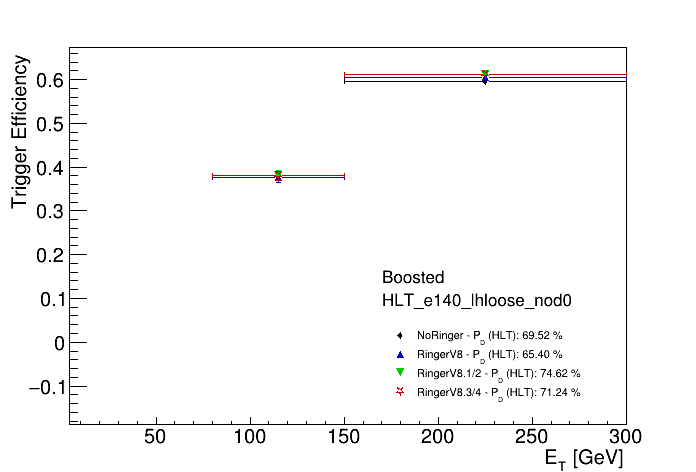

In [14]:
for step in ['L2Calo', 'L2', 'EFCalo', 'HLT']:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/et'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    for chain in chain_list:

        ringer_list = ['noringer', 
                       'ringer_v8_new', 
                       'ringer_v8_half',
                       'ringer_v8_34']

        label_list = ['NoRinger', 
                      'Ringer V8', 
                      'Ringer V8.1/2',
                      'Ringer V8.3/4'
                     ]


        #chain = 'e26_lh{OP}_nod0_{RINGER}_ivarloose'
        #e26_lh{OP}_nod0_{RINGER}_ivarloose


        trigger = step+'_'+chain

        m_info = np.array([
            # ringer 2017
            make_et_plot(boosted_table, 
                         trigger.format(RINGER='noringer'), chain_step=step, l2suffix='noringer', 
                        ),
            # no ringer 2017
            make_et_plot(boosted_table, 
                         trigger.format(RINGER='ringer_v8_new'), chain_step=step, l2suffix='ringer_v8_new', 
                        ),
            # no ringer 2017
            make_et_plot(boosted_table, 
                         trigger.format(RINGER='ringer_v8_half'), chain_step=step, l2suffix='ringer_v8_half', 
                        ),
            # no ringer 2017
            make_et_plot(boosted_table, 
                         trigger.format(RINGER='ringer_v8_34'), chain_step=step, l2suffix='ringer_v8_34', 
                        )
        ])

        # make the plot
        fig = rpl.create_canvas('my_canvas', canw=1400, canh=1000)
        fig = rpl.plot_profiles( m_info[:,0], 'E_{T} [GeV]', colors, markers)
        #rpl.set_atlas_label(0.15,0.85,'Internal, pp data #sqrt{s}= 13TeV')
        rpl.format_canvas_axes(YTitleOffset = 0.95)
        labels = []
        for idx, ilabel in enumerate(['NoRinger', 'RingerV8', 'RingerV8.1/2', 'RingerV8.3/4']):
            labels.append('%s - P_{D} (%s): %1.2f %%' %(ilabel, step, m_info[idx, 1]*100))
        add_legend( 0.55,0.15, labels)
        rpl.add_text(0.55, 0.4, 'Boosted', textsize=0.04)
        rpl.add_text( 0.55, 0.35, '%s_%s_%s_nod0' %(step, chain.split('_')[0], chain.split('_')[1]), textsize=0.04)
        rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , yminf=-0.5, ymaxf=1.1) 
        fig.show()
        print('Saving '+ plot_path+'/effs/eff_et_%s_%s_%s_root' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_boosted_et_%s_%s_%s_root.pdf' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_boosted_et_%s_%s_%s_root.png' %(step, chain.split('_')[0], chain.split('_')[1]))

## Efficiency with respect to $\Delta R$

In [15]:
def make_dr_plot(dataframe, chain, chain_step, l2suffix, fake=False):
    var = 'el_TaP_deltaR'
    from Gaugi.constants import GeV
    # plot in eta need sum 1 in chain threshold 

    m_bins = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.35, 0.40, 0.6] # et_bins
    #m_bins = [15, 20, 30, 40, 50, 1000000]
    #_bins = np.arange(0, 1, step=.05).tolist()
    et_cut  = int(chain.split('_')[1][1:])
    if fake:
        #aux_df = dataframe.loc[(dataframe.target != 1) & (dataframe.el_lhvloose != 1) &\
        aux_df = dataframe.loc[(dataframe.target != 1) &\
                               (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                      *GeV
    else:
        offline = chain.split('_')[2]
        aux_df = dataframe.loc[(dataframe.target == 1) & (dataframe['el_%s' %(offline)] == 1) & (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                                                                                       *GeV
    
    #step_decision = chain_step + '_' + '_'.join(chain.split('_')[1:])
    step_decision = chain
    #'L2Calo_e26_lhtight_nod0_ringer_v8_34_ivarloose'
    # cuts for all
    total   = aux_df
    passed  = aux_df.loc[(aux_df[step_decision] == 1)]
    
    h_num = hist1d('dr_b_num', passed[var], m_bins )
    #                                               /GeV
    h_den = hist1d('dr_b_den', total[var], m_bins )
    #                                              /GeV
    h_eff = rpl.hist1d.divide(h_num,h_den) 
    
    return h_eff, len(passed)/len(total)

Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_deltaR_L2Calo_e24_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_deltaR_L2Calo_e26_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_deltaR_L2Calo_e60_lhmedium_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_deltaR_L2Calo_e140_lhloose_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_deltaR_L2_e24_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_deltaR_L2_e26_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_deltaR_L2_e60_lhmedium_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_deltaR_L2_e140_lhloose_root
Savi

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_deltaR_L2Calo_e24_lhtight_root.pdf has been created
Info in <TCanvas::Print>: png file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_deltaR_L2Calo_e24_lhtight_root.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_deltaR_L2Calo_e26_lhtight_root.pdf has been created
Info in <TCanvas::Print>: png file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_deltaR_L2Calo_e26_lhtight_root.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /home/pedro.lima/workspace/CERN-ATLAS-Quali

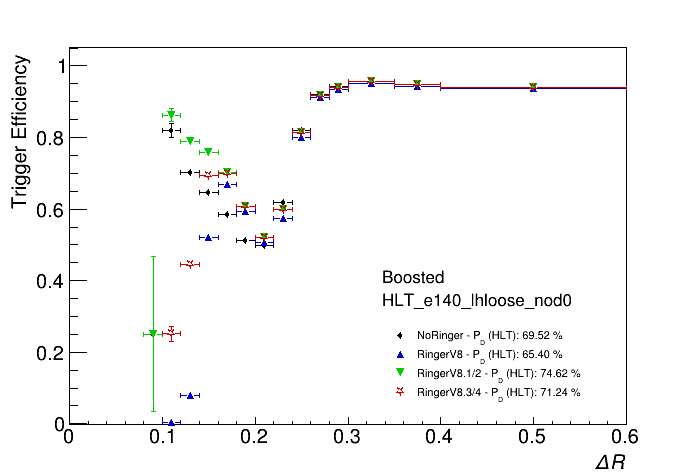

In [16]:
for step in ['L2Calo', 'L2', 'EFCalo', 'HLT']:
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/deltar'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    for chain in chain_list:

        ringer_list = ['noringer', 
                       'ringer_v8_new', 
                       'ringer_v8_half',
                       'ringer_v8_34']

        label_list = ['NoRinger', 
                      'Ringer V8', 
                      'Ringer V8.1/2',
                      'Ringer V8.3/4'
                     ]


        #chain = 'e26_lh{OP}_nod0_{RINGER}_ivarloose'
        #e26_lh{OP}_nod0_{RINGER}_ivarloose


        trigger = step+'_'+chain

        m_info = np.array([
            # ringer 2017
            make_dr_plot(boosted_table, 
                         trigger.format(RINGER='noringer'), chain_step=step, l2suffix='noringer', 
                        ),
            # no ringer 2017
            make_dr_plot(boosted_table, 
                         trigger.format(RINGER='ringer_v8_new'), chain_step=step, l2suffix='ringer_v8_new', 
                        ),
            # no ringer 2017
            make_dr_plot(boosted_table, 
                         trigger.format(RINGER='ringer_v8_half'), chain_step=step, l2suffix='ringer_v8_half', 
                        ),
            # no ringer 2017
            make_dr_plot(boosted_table, 
                         trigger.format(RINGER='ringer_v8_34'), chain_step=step, l2suffix='ringer_v8_34', 
                        )
        ])

        # make the plot
        fig = rpl.create_canvas('my_canvas', canw=1400, canh=1000)
        fig = rpl.plot_profiles( m_info[:,0], '\Delta R', colors, markers)
        #rpl.set_atlas_label(0.15,0.85,'Internal, pp data #sqrt{s}= 13TeV')
        rpl.format_canvas_axes(YTitleOffset = 0.95)
        labels = []
        for idx, ilabel in enumerate(['NoRinger', 'RingerV8', 'RingerV8.1/2', 'RingerV8.3/4']):
            labels.append('%s - P_{D} (%s): %1.2f %%' %(ilabel, step, m_info[idx, 1]*100))
        add_legend( 0.55,0.15, labels)
        rpl.add_text(0.55, 0.4, 'Boosted', textsize=0.04)
        rpl.add_text( 0.55, 0.35, '%s_%s_%s_nod0' %(step, chain.split('_')[0], chain.split('_')[1]), textsize=0.04)
        rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , yminf=-0.5, ymaxf=1.1) 
        fig.show()
        print('Saving '+ plot_path+'/eff_boosted_deltaR_%s_%s_%s_root' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_boosted_deltaR_%s_%s_%s_root.pdf' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_boosted_deltaR_%s_%s_%s_root.png' %(step, chain.split('_')[0], chain.split('_')[1]))

## Efficiency with respect to $pT$

In [17]:
def make_pt_plot(dataframe, chain, chain_step, l2suffix, fake=False):
    var = 'trig_L2_el_pt'
    from Gaugi.constants import GeV, MeV
    # plot in eta need sum 1 in chain threshold 

    #m_bins = [4,7,10,15,20,25,30,35,40,45,50,60,80,150,300] # et_bins
    #m_bins = [15, 20, 30, 40, 50, 1000000]
    m_bins = np.arange(0, 2000*10**3, step=50*10**3).tolist()
    et_cut  = int(chain.split('_')[1][1:])
    if fake:
        #aux_df = dataframe.loc[(dataframe.target != 1) & (dataframe.el_lhvloose != 1) &\
        aux_df = dataframe.loc[(dataframe.target != 1) &\
                               (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                      *GeV
    else:
        offline = chain.split('_')[2]
        aux_df = dataframe.loc[(dataframe.target == 1) & (dataframe['el_%s' %(offline)] == 1) & (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                                                                                       *GeV
    
    #step_decision = chain_step + '_' + '_'.join(chain.split('_')[1:])
    step_decision = chain
    #'L2Calo_e26_lhtight_nod0_ringer_v8_34_ivarloose'
    # cuts for all
    total   = aux_df
    passed  = aux_df.loc[(aux_df[step_decision] == 1)]
    
    h_num = hist1d('pt_b_num', passed[var]/MeV, m_bins )
    #                                               /GeV
    h_den = hist1d('pt_b_den', total[var]/MeV, m_bins )
    #                                              /GeV
    h_eff = rpl.hist1d.divide(h_num,h_den) 
    
    return h_eff, len(passed)/len(total)

Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_boosted_pt_L2Calo_e24_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_boosted_pt_L2Calo_e26_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_boosted_pt_L2Calo_e60_lhmedium_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_boosted_pt_L2Calo_e140_lhloose_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_boosted_pt_L2_e24_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_boosted_pt_L2_e26_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_boosted_pt_L2_e60_lhmedium_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_boosted_pt_L2_e140_lhloose_r

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_pt_L2Calo_e24_lhtight_root.pdf has been created
Info in <TCanvas::Print>: png file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_pt_L2Calo_e24_lhtight_root.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_pt_L2Calo_e26_lhtight_root.pdf has been created
Info in <TCanvas::Print>: png file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_pt_L2Calo_e26_lhtight_root.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/ke

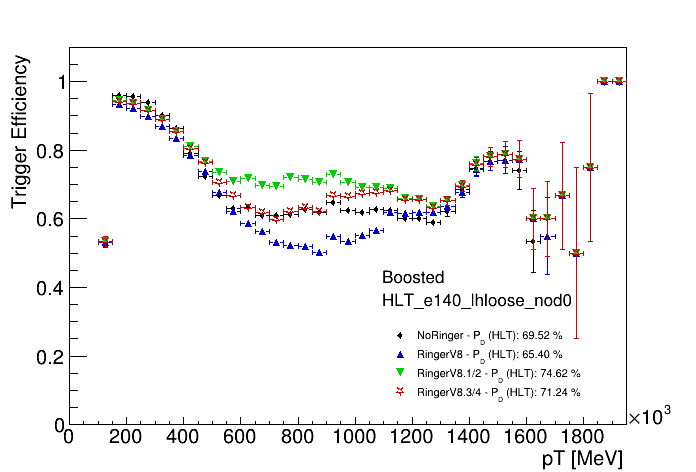

In [18]:
for step in ['L2Calo', 'L2', 'EFCalo', 'HLT']:
#step = 'L2'
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/pt'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    for chain in chain_list:

        ringer_list = ['noringer', 
                       'ringer_v8_new', 
                       'ringer_v8_half',
                       'ringer_v8_34']

        label_list = ['NoRinger', 
                      'Ringer V8', 
                      'Ringer V8.1/2',
                      'Ringer V8.3/4'
                     ]


        #chain = 'e26_lh{OP}_nod0_{RINGER}_ivarloose'
        #e26_lh{OP}_nod0_{RINGER}_ivarloose


        trigger = step+'_'+chain

        m_info = np.array([
            # ringer 2017
            make_pt_plot(boosted_table, 
                         trigger.format(RINGER='noringer'), chain_step=step, l2suffix='noringer', 
                        ),
            # no ringer 2017
            make_pt_plot(boosted_table, 
                         trigger.format(RINGER='ringer_v8_new'), chain_step=step, l2suffix='ringer_v8_new', 
                        ),
            # no ringer 2017
            make_pt_plot(boosted_table, 
                         trigger.format(RINGER='ringer_v8_half'), chain_step=step, l2suffix='ringer_v8_half', 
                        ),
            # no ringer 2017
            make_pt_plot(boosted_table, 
                         trigger.format(RINGER='ringer_v8_34'), chain_step=step, l2suffix='ringer_v8_34', 
                        )
        ])

        # make the plot
        fig = rpl.create_canvas('my_canvas', canw=1400, canh=1000)
        fig = rpl.plot_profiles( m_info[:,0], 'pT [MeV]', colors, markers)
        #rpl.set_atlas_label(0.15,0.85,'Internal, pp data #sqrt{s}= 13TeV')
        rpl.format_canvas_axes(YTitleOffset = 0.95)
        labels = []
        for idx, ilabel in enumerate(['NoRinger', 'RingerV8', 'RingerV8.1/2', 'RingerV8.3/4']):
            labels.append('%s - P_{D} (%s): %1.2f %%' %(ilabel, step, m_info[idx, 1]*100))
        add_legend( 0.55,0.15, labels)
        rpl.add_text(0.55, 0.4, 'Boosted', textsize=0.04)
        rpl.add_text( 0.55, 0.35, '%s_%s_%s_nod0' %(step, chain.split('_')[0], chain.split('_')[1]), textsize=0.04)
        rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , yminf=0, ymaxf=1.1) 
        fig.show()
        print('Saving '+ plot_path+'/effs/eff_boosted_pt_%s_%s_%s_root' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_boosted_pt_%s_%s_%s_root.pdf' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_boosted_pt_%s_%s_%s_root.png' %(step, chain.split('_')[0], chain.split('_')[1]))

## Efficiency with respect to $< \mu >$

In [19]:
def make_mu_plot(dataframe, chain, chain_step, l2suffix, fake=False):
    var = 'avgmu'
    from Gaugi.constants import GeV, MeV
    # plot in eta need sum 1 in chain threshold 

    #m_bins = [4,7,10,15,20,25,30,35,40,45,50,60,80,150,300] # et_bins
    #m_bins = [15, 20, 30, 40, 50, 1000000]
    #m_bins = [10, 20, 30, 40, 50, 60, 70]
    m_bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
    et_cut  = int(chain.split('_')[1][1:])
    if fake:
        #aux_df = dataframe.loc[(dataframe.target != 1) & (dataframe.el_lhvloose != 1) &\
        aux_df = dataframe.loc[(dataframe.target != 1) &\
                               (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                      *GeV
    else:
        offline = chain.split('_')[2]
        aux_df = dataframe.loc[(dataframe.target == 1) & (dataframe['el_%s' %(offline)] == 1) & (dataframe.el_et >= (et_cut - 5)*GeV) & (np.abs(dataframe.el_eta) <=2.47)]
        #                                                                                                                       *GeV
    
    #step_decision = chain_step + '_' + '_'.join(chain.split('_')[1:])
    step_decision = chain
    #'L2Calo_e26_lhtight_nod0_ringer_v8_34_ivarloose'
    # cuts for all
    total   = aux_df
    passed  = aux_df.loc[(aux_df[step_decision] == 1)]
    
    h_num = hist1d('mu_b_num', passed[var]/MeV, m_bins )
    #                                               /GeV
    h_den = hist1d('mu_b_den', total[var]/MeV, m_bins )
    #                                              /GeV
    h_eff = rpl.hist1d.divide(h_num,h_den) 
    
    return h_eff, len(passed)/len(total)

Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_boosted_mu_L2Calo_e24_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_boosted_mu_L2Calo_e26_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_boosted_mu_L2Calo_e60_lhmedium_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_boosted_mu_L2Calo_e140_lhloose_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_boosted_mu_L2_e24_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_boosted_mu_L2_e26_lhtight_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_boosted_mu_L2_e60_lhmedium_root
Saving /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/eff_boosted_mu_L2_e140_lhloose_r

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_mu_L2Calo_e24_lhtight_root.pdf has been created
Info in <TCanvas::Print>: png file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_mu_L2Calo_e24_lhtight_root.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_mu_L2Calo_e26_lhtight_root.pdf has been created
Info in <TCanvas::Print>: png file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/eff_boosted_mu_L2Calo_e26_lhtight_root.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file /home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/ke

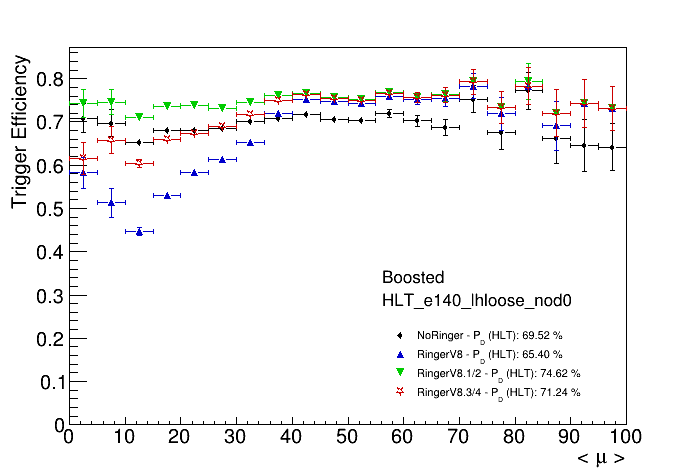

In [20]:
for step in ['L2Calo', 'L2', 'EFCalo', 'HLT']:
#step = 'L2'
    plot_path = '/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/effs/mu'

    chain_list = ['e24_lhtight_nod0_{RINGER}_ivarloose',
                  'e26_lhtight_nod0_{RINGER}_ivarloose',
                  'e60_lhmedium_nod0_{RINGER}_L1EM24VHI',
                  'e140_lhloose_nod0_{RINGER}'
                 ]

    for chain in chain_list:

        ringer_list = ['noringer', 
                       'ringer_v8_new', 
                       'ringer_v8_half',
                       'ringer_v8_34']

        label_list = ['NoRinger', 
                      'Ringer V8', 
                      'Ringer V8.1/2',
                      'Ringer V8.3/4'
                     ]


        #chain = 'e26_lh{OP}_nod0_{RINGER}_ivarloose'
        #e26_lh{OP}_nod0_{RINGER}_ivarloose


        trigger = step+'_'+chain

        m_info = np.array([
            # ringer 2017
            make_mu_plot(boosted_table, 
                         trigger.format(RINGER='noringer'), chain_step=step, l2suffix='noringer', 
                        ),
            # no ringer 2017
            make_mu_plot(boosted_table, 
                         trigger.format(RINGER='ringer_v8_new'), chain_step=step, l2suffix='ringer_v8_new', 
                        ),
            # no ringer 2017
            make_mu_plot(boosted_table, 
                         trigger.format(RINGER='ringer_v8_half'), chain_step=step, l2suffix='ringer_v8_half', 
                        ),
            # no ringer 2017
            make_mu_plot(boosted_table, 
                         trigger.format(RINGER='ringer_v8_34'), chain_step=step, l2suffix='ringer_v8_34', 
                        )
        ])

        # make the plot
        fig = rpl.create_canvas('my_canvas', canw=1400, canh=1000)
        fig = rpl.plot_profiles( m_info[:,0], '< #mu >', colors, markers)
        #rpl.set_atlas_label(0.15,0.85,'Internal, pp data #sqrt{s}= 13TeV')
        rpl.format_canvas_axes(YTitleOffset = 0.95)
        labels = []
        for idx, ilabel in enumerate(['NoRinger', 'RingerV8', 'RingerV8.1/2', 'RingerV8.3/4']):
            labels.append('%s - P_{D} (%s): %1.2f %%' %(ilabel, step, m_info[idx, 1]*100))
        add_legend( 0.55,0.15, labels)
        rpl.add_text(0.55, 0.4, 'Boosted', textsize=0.04)
        rpl.add_text( 0.55, 0.35, '%s_%s_%s_nod0' %(step, chain.split('_')[0], chain.split('_')[1]), textsize=0.04)
        rpl.fix_yaxis_ranges( ignore_zeros=True, ignore_errors=True , yminf=0, ymaxf=1.1) 
        fig.show()
        print('Saving '+ plot_path+'/effs/eff_boosted_mu_%s_%s_%s_root' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_boosted_mu_%s_%s_%s_root.pdf' %(step, chain.split('_')[0], chain.split('_')[1]))
        fig.savefig(plot_path+'/eff_boosted_mu_%s_%s_%s_root.png' %(step, chain.split('_')[0], chain.split('_')[1]))

In [21]:
if False:  
    def norm1( data ):
        norms = np.abs( data.sum(axis=1) )
        norms[norms==0] = 1
        return data/norms[:,None]
    
    normalizar = True
    
    rings=boosted_table.columns.values[11:111]
    n_rings = np.linspace(0, 99, 100)
    ee_value = []
    layers = [8-1, 8+64-1, 8+64+8-1, 8+64+8+8-1, 8+64+8+8+4-1, 8+64+8+8+4+4-1]
    
    ees = boosted_table.loc[(table.target==1)]
    ees = ees[rings]
    #jets = table.loc[(table.target==0)]
    
    if normalizar:
        ees = norm1(ees)
        
    plt.figure(figsize=(25,10))
    for irow in range(20000):
        #               |
        #    numero de linhas a processar
        #    todas = len(ees)
        row = ees.iloc[irow]
        plt.plot(n_rings, row, color = 'black', linewidth=0.2)
    plt.vlines(x=layers, ymin=-1, ymax=1, colors = 'black', ls = '--')
    plt.title('Boosted Electrons')
    plt.xlabel('Rings', loc='center')
    plt.ylabel('Normalized Energy', loc='center')
    #plt.legend(loc = 9)
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.text(2-0.5, 0.7, 'PS', fontsize = 15)
    ax.text(8-0.5, 0.7, 'EM1', fontsize = 15)
    ax.text(8+64-0.5, 0.7, 'EM2', fontsize = 15)
    ax.text(8+64+8-0.5, 0.7, 'EM3', fontsize = 15)
    ax.text(8+64+8+8-0.5, 0.7, 'HAD1', fontsize = 15)
    ax.text(8+64+8+8+4-0.5, 0.7, 'HAD2', fontsize = 15)
    ax.text(8+64+8+8+4+4-0.5, 0.7, 'HAD3', fontsize = 15)
    plt.ylim(-0.07, 0.75)
    plt.xlim(0,99)
    plt.grid()
    plt.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/Electrons_boosted_energy_profile_et%d_eta%d.png'%(range_et[0], range_eta[0]))
    plt.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/Electrons_boosted_energy_profile_et%d_eta%d.pdf'%(range_et[0], range_eta[0]))
    plt.show()

In [22]:
if False:  
    def norm1( data ):
        norms = np.abs( data.sum(axis=1) )
        norms[norms==0] = 1
        return data/norms[:,None]
    
    normalizar = True
    
    for iet in range(5):
        for ieta in range(5):
            print('Processing ET: %d ETA: %d' % (iet, ieta))
            
            boosted_paths = []
            boosted_paths.append( boosted_dpath.format(ET=iet,ETA=ieta))
            boosted_table = []
            boosted_table = load_in_loop( boosted_paths, drop_columns=drop_columns, decorators=decorators, chains=chains )
            
            rings=table.columns.values[11:111]
            n_rings = np.linspace(0, 99, 100)
            ee_value = []
            layers = [8-1, 8+64-1, 8+64+8-1, 8+64+8+8-1, 8+64+8+8+4-1, 8+64+8+8+4+4-1]

            ees = boosted_table.loc[(boosted_table.target==1)]
            ees = ees[rings]
            #jets = table.loc[(table.target==0)]

            if normalizar:
                ees = norm1(ees)

            plt.figure(figsize=(25,10))
            
            if len(ees) < 20000:
                size = len(ees)
            else:
                size = 20000
                
            for irow in range(size):
                #               |
                #    numero de linhas a processar
                #    todas = len(ees)
                row = ees.iloc[irow]
                plt.plot(n_rings, row, color = 'black', linewidth=0.2)
            plt.vlines(x=layers, ymin=-1, ymax=1, colors = 'black', ls = '--')
            plt.title('Electrons')
            plt.xlabel('Rings', loc='center')
            plt.ylabel('Normalized Energy', loc='center')
            #plt.legend(loc = 9)
            ax = plt.gca()
            ax.axes.xaxis.set_ticklabels([])
            ax.text(2-0.5, 0.7, 'PS', fontsize = 15)
            ax.text(8-0.5, 0.7, 'EM1', fontsize = 15)
            ax.text(8+64-0.5, 0.7, 'EM2', fontsize = 15)
            ax.text(8+64+8-0.5, 0.7, 'EM3', fontsize = 15)
            ax.text(8+64+8+8-0.5, 0.7, 'HAD1', fontsize = 15)
            ax.text(8+64+8+8+4-0.5, 0.7, 'HAD2', fontsize = 15)
            ax.text(8+64+8+8+4+4-0.5, 0.7, 'HAD3', fontsize = 15)
            plt.ylim(-0.07, 0.75)
            plt.xlim(0,99)
            plt.grid()
            plt.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/Electrons_boosted_energy_profile_et%d_eta%d.png'%(iet, ieta))
            plt.savefig('/home/pedro.lima/workspace/CERN-ATLAS-Qualify-1/analysis/kepler/kepler_imgs/Electrons_boosted_energy_profile_et%d_eta%d.pdf'%(iet, ieta))
            #plt.show()

In [ ]:
print('End of script')